# <span style="color:orange">Quality Data Analysis - Project Work [FULL PROJECT] </span>

<br>

## Team 12

### Course Details:
- Academic Year: 2023-2024

### Project Details:
- Title: **Quality Analysis Methods for Automated Defect Detection**

### Team Members:
- Chiara Paratore 10715970
- Eiric Sbuelz 10766842
- Stefano Sima 10764598
- Edoardo Zerbinati 10990186

### Instructor:
- Panagiotis Tsiamyrtzis
- Marco Luigi Giuseppe Grasso

<br>

# <span style="color:red"> Project analysis phases: **PHASE 1**

<br>

## <span style="color:orange"> Introduction

The project focuses on creating and implementing statistical monitoring methods to distinguish defect-free pieces from defective ones. The analysis is conducted on 3D-printed Voronoi filters (created via HP Multijet-Fusion process with PA12 material) using advanced statistical techniques to ensure high-quality production standards. Photos of these pieces were obtained at MADE: Competence Center Industry 4.0 (Polimi), a center specializing in production and quality analysis. 

The students of the “Quality Data Analysis” course were divided into groups of four. Later, a representative from each group visited the department to organize the pieces into groups of four within trays. All pieces had to have a specific symbol in the bottom right corner for consistent orientation. The trays were then transported on a conveyor belt under a camera that captured their position, obtaining grayscale photos, later converted into black and white. The method used is In-line inspection, allowing real-time image availability. Each photo presents four pieces ordered as follows: top_left (1), bottom_left (2), top_right (3), bottom_right (4). A total of 10 images were obtained, comprising 40 pieces. 

The study focuses on developing statistical monitoring methods using these photos as examples of defect-free models (first phase), to identify potential defects in pieces during the project's second phase. 

To turn images into data compatible with the methods addresses in the course, an image data processing method has been used. Image data processing involves using a machine vision tool, a Python code that calculates multiple "quality variables" from the image dataset. This tool processes raw images and provides segmented regions of interest, generating a CSV table with data on parts and voids. Data extraction steps include Splitting, Part segmentation, Part data extraction, Voids segmentation, and Voids data extraction. Segmentation techniques isolate regions of interest by identifying sharp discontinuities or grouping similar pixels, resulting in a binary image (white for regions of interest, black for the background). Region analysis extrapolates statistical data from these regions, assigning labels and extracting metrics such as area, perimeter, and eccentricity of the ellipse with the same second moments as the region. 

An ad hoc Python environment and kernel called "qda-project" was created using Anaconda Navigator and implemented in Visual Studio Code (VSC), the recommended Python editor. Libraries such as pandas, numpy, and matplotlib.pyplot were used, along with additional libraries for statistical tests and data analysis.

The entire project revolves around proposing multivariate control charts as a tool to detect whether the process under examination is in control or not. Among all the methodologies analyzed during the course, multivariate control charts were deemed the best approach for addressing the problem presented due to their specific characteristics. The analysis is structured into two phases: Phase 1 focuses on the creation and calibration of the control charts, while Phase 2 involves their application to verify the control status of the provided process. To support this objective, multiple additional statistical methods were implemented and verified.

<br><br>

## <span style="color:orange"> Assumptions and preliminary data analysis

The dataset images captured for in-line inspection were processed using image data processing tools, which computed multiple variables stored in a DataFrame. Specifically, the variables available include the following: Image Name, Position, Region Type, ID, Area, Perimeter, Eccentricity, Orientation, Solidity, Extent, Major Axis Length, Minor Axis Length and Equivalent Diameter. 



The DataFrame contains information pertaining to 40 production pieces, sorted by Image Name, comprising a total of 1829 rows. The first observation for each piece is assigned ID 0 and corresponds to the region type designated as "part", followed by a variable number of "voids". Each piece features between 41 and 48 IDs, assigned in the order in which the first pixel of each void is encountered from the top. Additionally, the pieces are arranged according to their positions within the container they were placed in, namely top_left, bottom_left, top_right, and bottom_right. An observation worth noting is that the smallest voids, which have an area of just 1 pixel, a perimeter of 0 pixels and exhibit uniformity across all other parameters. 



The pieces under analysis may present various types of quality defects, including: 

- Potential chipping or entire truncation of the base 

- Localized indentations or prominences on the piece 

- Fusion of voids 

- Absence of voids where they were expected 



To design a statistical process monitoring method for the in-line detection of defects, several assumptions were considered in support of the analysis and definition of a highly accurate method:

1) Each observation is considered *individual*. 

2) The observations follow a *temporal order*, reflecting their "Position" (as mentioned above, top_left – bottom_left – top_right – bottom_right). This assumption is crucial for conducting tests on the independence of the data, essential for applying robust testing and analysis tools. 

3) Hypothesis tests on independence follow a well-defined procedure. Firstly, the time series is plotted to provide an initial visualization, purely qualitative in nature. This is followed by the Runs test; however, it cannot be fully relied upon as it is a non-parametric method without preliminary assumptions. This initial heuristic test is followed by the visualization of the Autocorrelation function and the Partial Autocorrelation function, potentially supplemented by further analyses such as the Ljung-Box Q-test (LBQ test) or Bartlett’s test to explore specific lags with anomalous behavior.

4) If independence is violated, one commonly applied solution is the **autoregressive model**. In the following analysis, this model will be used once because the number of observations, which is 40, is considered sufficiently large, thus meeting the applicability condition.

5) In the report, a new discrete variable is introduced, namely "Number of voids", which follows a Poisson distribution with a mean **λ=44.725**. The parameter λ represents the average number of events (in this case, voids) occurring within a given time interval. According to the literature, for large values of λ (specifically, λ>=10), the *Poisson distribution* can be approximated by a *Normal distribution* with the same mean. The normality of data is essential to perfrom and apply the tools exploited in the following report.

6) To exploit the potential of Principal Component Analysis (PCA), supportive material regarding the criterion for selecting the subset of principal components was consulted, specifically chapter 6, "Choosing a Subset of Principal Components or Variables", of the book "Principal Component Analysis", part of the Springer Series in Statistics. Selecting an appropriate number of principal components requires considering the level of variability that these components cumulatively explain. The conclusion reached is to set the threshold for cumulative explained variability at **85%**.

7) The significance level for performing hypothesis testing, denoted by the Greek letter *alpha*, is set at **5%**. On the other hand, the significance level used in the Multivariate control charts, still denoted by the Greek letter *alpha*, is set at **0.27%**.

8) To define and calibrate the multivariate control charts, the **marginal normality** of each individual variable should be verified. If each variable is found to be marginally normal, it is assumed that this is sufficient to consider the data as multinormal.

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import qda

# libraries for RUNS testing
from statsmodels.sandbox.stats.runs import runstest_1samp

# libraries for LBQ testing
from statsmodels.stats.diagnostic import acorr_ljungbox

# libraries for ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

# libraries for ACF and PACF plotting
import statsmodels.graphics.tsaplots as sgt

# libraries for PCA
from sklearn.decomposition import PCA

# libraries for LINEAR REGRESSION MODEL
import statsmodels.api as sm

# libraries for SCATTERPLOT
import seaborn as sns

In [2]:
# Loading the CSV file into a DataFrame called 'pieces'
pieces = pd.read_csv('image_statistics_new.csv')
pieces.head()

Image name  Position Region type  \
0  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        part   
1  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
2  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
3  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
4  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
0   0        38468.0            4059.762         0.116                 -0.943   
1   1           80.0              42.142         0.950                 -1.303   
2   2           54.0              28.314         0.865                 -1.335   
3   3          183.0              61.799         0.902                 -1.413   
4   4          166.0              69.770         0.967                 -1.210   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
0     0.765   0.697                     275.986                     274.132   
1     0.860   0.526                      18.844                       5.889   
2     0.900   0.643                      12.049                       6.051   
3     0.906   0.587                      24.715                      10.688   
4     0.869   0.357                      30.780                       7.810   

   Equivalent Diameter [pixels]  
0                       221.312  
1                        10.093  
2                         8.292  
3                        15.264  
4                        14.538

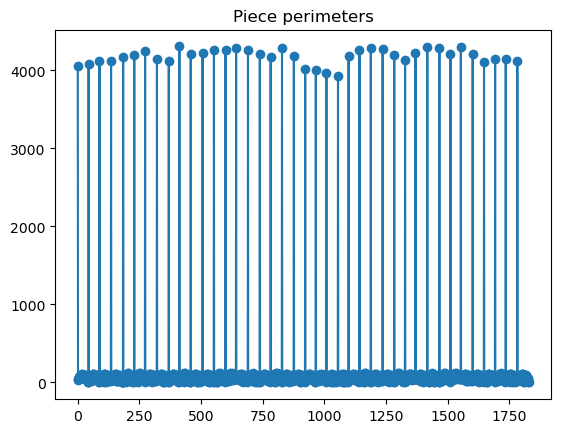

In [3]:
# First qualitative visualization of the variable 'Perimeter'
plt.plot(pieces['Perimeter [pixels]'], "o-")
plt.title('Piece perimeters')
plt.show()

Considerably different order of magnitude between "Voids" and "Parts" has been noticed.

<br><br>

## <span style="color:orange">Proposed methodology

### <span style="color:grey"> DATAFRAME CREATION

Following the conducted analyses, which revealed a significant difference in the order of magnitude among the data, the original dataset was divided into two separate datasets: "parts" and "voids", based on the *Region type* of each row.

- The first dataset, **"parts"**, will play a central role in statistical control, as it contains all the information related to the objects as a whole.
- The second dataset, **"voids"**, will not be used in its entirety but will serve a functional role in creating variables and datasets useful for statistical control.

<br>

In [4]:
# Creation of a DataFrame containing only parts
parts = pieces[pieces['Region type'] == 'part']
parts.head()

Image name      Position  \
0    2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...      top_left   
44   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...   bottom_left   
88   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...     top_right   
135  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  bottom_right   
184  2024-03-26_14-12-22-903_MV540-H@xWyHvMbxwzDCYC...      top_left   

    Region type  ID  Area [pixels]  Perimeter [pixels]  Eccentricity  \
0          part   0        38468.0            4059.762         0.116   
44         part   0        39106.0            4086.620         0.135   
88         part   0        38293.0            4122.076         0.140   
135        part   0        38200.0            4119.247         0.140   
184        part   0        38411.0            4170.963         0.098   

     Orientation [radians]  Solidity  Extent  Major Axis Length [pixels]  \
0                   -0.943     0.765   0.697                     275.986   
44                  -1.028     0.768   0.727                     277.633   
88                   1.379     0.767   0.740                     275.509   
135                 -0.982     0.762   0.741                     277.225   
184                 -0.823     0.754   0.729                     279.109   

     Minor Axis Length [pixels]  Equivalent Diameter [pixels]  
0                       274.132                       221.312  
44                      275.098                       223.140  
88                      272.787                       220.808  
135                     274.494                       220.540  
184                     277.777                       221.148

In [5]:
# Creation of a DataFrame containing only voids
voids = pieces[pieces['Region type'] == 'void']
voids.head()

Image name  Position Region type  \
1  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
2  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
3  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
4  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
5  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
1   1           80.0              42.142         0.950                 -1.303   
2   2           54.0              28.314         0.865                 -1.335   
3   3          183.0              61.799         0.902                 -1.413   
4   4          166.0              69.770         0.967                 -1.210   
5   5          150.0              53.456         0.890                  1.062   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
1     0.860   0.526                      18.844                       5.889   
2     0.900   0.643                      12.049                       6.051   
3     0.906   0.587                      24.715                      10.688   
4     0.869   0.357                      30.780                       7.810   
5     0.932   0.536                      21.481                       9.781   

   Equivalent Diameter [pixels]  
1                        10.093  
2                         8.292  
3                        15.264  
4                        14.538  
5                        13.820

<br>

In the code below, additional metrics have been integrated into the "parts" dataframe. Specifically, the "voids" dataframe was used to create **two** variables:
- one representing the *number of voids in each part*;
- and the other representing the *total sum of the voids' area*.

This was done to summarize some of the most relevant information about the voids. The goal is to detect the maximum number of the potential defects described earlier.

<br>

In [6]:
def are_equal(pieces, i):
  if i == 0:
    return False
  else:
    return (pieces.loc[i, 'Image name'] == pieces.loc[i - 1, 'Image name']) and \
           (pieces.loc[i, 'Position'] == pieces.loc[i - 1, 'Position'])

total_area_voids = []
voids_count = []
piece_number = [] # this vector will be useful in the subsequent creation of the dataframe 'biggest_voids'

sum_total_area_voids = voids.loc[1, 'Area [pixels]']
voids_counter = 1
piece_number.append(1)
k = 1

for i in range(2, pieces.shape[0]):
  if are_equal(pieces, i):
    sum_total_area_voids += pieces.loc[i, 'Area [pixels]']
    voids_counter += 1
    piece_number.append(k)
  else:
    total_area_voids.append(sum_total_area_voids)
    voids_count.append(voids_counter)
    sum_total_area_voids = 0
    voids_counter = 0
    k += 1

total_area_voids.append(sum_total_area_voids)
voids_count.append(voids_counter)

print(f"total_area_voids: {total_area_voids}")
print(f"voids_count: {voids_count}")
print(f"piece_number: {piece_number}")

# check if the right number of values was computed; such number should be equal to the total number of pieces (40)
print(f"total_area_voids length: {len(total_area_voids)}")
print(f"voids_count length: {len(voids_count)}")
print(f"piece_number length: {len(piece_number)}")

total_area_voids: [11386.0, 11364.0, 11230.0, 11666.0, 12191.0, 12348.0, 11926.0, 11807.0, 11896.0, 12969.0, 11702.0, 12157.0, 12513.0, 12534.0, 12069.0, 12355.0, 12252.0, 12175.0, 12048.0, 12038.0, 11230.0, 10948.0, 10394.0, 11015.0, 12013.0, 12536.0, 12071.0, 12196.0, 12251.0, 11938.0, 11617.0, 12692.0, 12788.0, 12492.0, 12132.0, 12087.0, 11852.0, 11972.0, 11547.0, 11568.0]
voids_count: [43, 43, 46, 48, 44, 43, 47, 47, 42, 45, 47, 45, 46, 42, 47, 47, 43, 45, 47, 45, 42, 42, 46, 42, 43, 45, 47, 46, 43, 41, 47, 48, 44, 41, 47, 45, 44, 42, 46, 46]
piece_number: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

<br>

The created variables have then been added into a new dataset called "parts_mod".

<br>

In [7]:
parts_mod = parts

parts_mod['Number of voids'] = voids_count
parts_mod['Total area of voids'] = total_area_voids

parts_mod.head()

c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Image name      Position  \
0    2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...      top_left   
44   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...   bottom_left   
88   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...     top_right   
135  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  bottom_right   
184  2024-03-26_14-12-22-903_MV540-H@xWyHvMbxwzDCYC...      top_left   

    Region type  ID  Area [pixels]  Perimeter [pixels]  Eccentricity  \
0          part   0        38468.0            4059.762         0.116   
44         part   0        39106.0            4086.620         0.135   
88         part   0        38293.0            4122.076         0.140   
135        part   0        38200.0            4119.247         0.140   
184        part   0        38411.0            4170.963         0.098   

     Orientation [radians]  Solidity  Extent  Major Axis Length [pixels]  \
0                   -0.943     0.765   0.697                     275.986   
44                  -1.028     0.768   0.727                     277.633   
88                   1.379     0.767   0.740                     275.509   
135                 -0.982     0.762   0.741                     277.225   
184                 -0.823     0.754   0.729                     279.109   

     Minor Axis Length [pixels]  Equivalent Diameter [pixels]  \
0                       274.132                       221.312   
44                      275.098                       223.140   
88                      272.787                       220.808   
135                     274.494                       220.540   
184                     277.777                       221.148   

     Number of voids  Total area of voids  
0                 43              11386.0  
44                43              11364.0  
88                46              11230.0  
135               48              11666.0  
184               44              12191.0

<br>

Furthermore, a **third** dataset was created to record data related to the *largest void in each object*. The purpose was to detect issues that the two previous extra columns might not identify.

However, the results should be considered with the limitation that they pertain only to the largest voids.

*For instance*, the merging of two or more adjacent voids could occur. If these are positioned in the central part of the piece and consequently have the largest area and perimeter values, the largest void in the piece will be significantly larger than those occurring in the non-defective pieces. Such a production defect would not be easily detectable using only the "parts" dataframe with the added variables for the number of voids or the total void area, as the total area might increase only slightly. Similarly, the change in the number of voids might not be significant.

<br>

In [8]:
voids_copy = voids
voids_copy.head()

Image name  Position Region type  \
1  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
2  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
3  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
4  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
5  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
1   1           80.0              42.142         0.950                 -1.303   
2   2           54.0              28.314         0.865                 -1.335   
3   3          183.0              61.799         0.902                 -1.413   
4   4          166.0              69.770         0.967                 -1.210   
5   5          150.0              53.456         0.890                  1.062   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
1     0.860   0.526                      18.844                       5.889   
2     0.900   0.643                      12.049                       6.051   
3     0.906   0.587                      24.715                      10.688   
4     0.869   0.357                      30.780                       7.810   
5     0.932   0.536                      21.481                       9.781   

   Equivalent Diameter [pixels]  
1                        10.093  
2                         8.292  
3                        15.264  
4                        14.538  
5                        13.820

In [9]:
voids_copy['Piece number'] = piece_number
voids_copy.head()

c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Image name  Position Region type  \
1  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
2  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
3  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
4  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
5  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
1   1           80.0              42.142         0.950                 -1.303   
2   2           54.0              28.314         0.865                 -1.335   
3   3          183.0              61.799         0.902                 -1.413   
4   4          166.0              69.770         0.967                 -1.210   
5   5          150.0              53.456         0.890                  1.062   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
1     0.860   0.526                      18.844                       5.889   
2     0.900   0.643                      12.049                       6.051   
3     0.906   0.587                      24.715                      10.688   
4     0.869   0.357                      30.780                       7.810   
5     0.932   0.536                      21.481                       9.781   

   Equivalent Diameter [pixels]  Piece number  
1                        10.093             1  
2                         8.292             1  
3                        15.264             1  
4                        14.538             1  
5                        13.820             1

In [10]:
specific_rows = []

for i in range(1, 41):
    support_matrix = voids_copy[voids_copy['Piece number'] == i]
    max_area = support_matrix["Area [pixels]"].max()
    void_row = support_matrix["Area [pixels]"].idxmax()

    specific_rows.append(void_row)

    print(f"Piece number {i}: ")
    print(f"Max area: {max_area}")
    print(f"The void is in the row: {void_row}")
    print("\n")

print(f"The rows are: {specific_rows}")

Piece number 1: 
Max area: 591.0
The void is in the row: 19


Piece number 2: 
Max area: 596.0
The void is in the row: 62


Piece number 3: 
Max area: 611.0
The void is in the row: 105


Piece number 4: 
Max area: 649.0
The void is in the row: 152


Piece number 5: 
Max area: 625.0
The void is in the row: 202


Piece number 6: 
Max area: 645.0
The void is in the row: 248


Piece number 7: 
Max area: 635.0
The void is in the row: 290


Piece number 8: 
Max area: 657.0
The void is in the row: 338


Piece number 9: 
Max area: 616.0
The void is in the row: 385


Piece number 10: 
Max area: 667.0
The void is in the row: 436


Piece number 11: 
Max area: 637.0
The void is in the row: 475


Piece number 12: 
Max area: 667.0
The void is in the row: 523


Piece number 13: 
Max area: 633.0
The void is in the row: 576


Piece number 14: 
Max area: 648.0
The void is in the row: 618


Piece number 15: 
Max area: 639.0
The void is in the row: 659


Piece number 16: 
Max area: 675.0
The void is in th

In [11]:
# Creation of the DataFrame 'biggest_voids'
biggest_voids = pieces.iloc[specific_rows]

biggest_voids.head()

Image name      Position  \
19   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...      top_left   
62   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...   bottom_left   
105  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...     top_right   
152  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  bottom_right   
202  2024-03-26_14-12-22-903_MV540-H@xWyHvMbxwzDCYC...      top_left   

    Region type  ID  Area [pixels]  Perimeter [pixels]  Eccentricity  \
19         void  19          591.0             111.497         0.893   
62         void  18          596.0             102.912         0.743   
105        void  17          611.0             106.912         0.771   
152        void  17          649.0             109.154         0.746   
202        void  18          625.0             115.154         0.887   

     Orientation [radians]  Solidity  Extent  Major Axis Length [pixels]  \
19                  -1.110     0.943   0.534                      43.343   
62                  -1.357     0.951   0.597                      35.640   
105                 -1.333     0.946   0.580                      37.167   
152                 -1.358     0.943   0.579                      37.313   
202                 -1.174     0.937   0.519                      44.087   

     Minor Axis Length [pixels]  Equivalent Diameter [pixels]  
19                       19.529                        27.431  
62                       23.852                        27.547  
105                      23.648                        27.892  
152                      24.869                        28.746  
202                      20.371                        28.209

<br>

### <span style="color:grey"> Dataframe Analysis: <span style="color:green"> **PARTS**

### **INDEPENDENCE TESTING** for each variable - *parts_mod*

Given the high number of numerical variables (11) describing the whole parts, it was decided to apply **PCA** to reduce complexity while minimizing the loss of explained variance. 

Although there are no assumptions for this analysis, the idea is to examine the hypotheses of *randomness* and *normality* for each numerical variable, and then fit a model and apply Box-Cox transformation, if necessary, to ensure that the resulting principal components are normal and *IID* (independent and identically distributed).

The variables are presented below based on the hypothesis testing results and categorized according to the following structure:

- (A) *Randomness **NOT** rejected*
- (B) *Randomness rejected*

The latter is further subdivided into two subgroups:

   - (i) *High correlation at lag_1*
   - (ii) *Seasonality*

<br>

#### **(A)** Randomness NOT rejected

<br>

##### FIRST variable: **Extent**

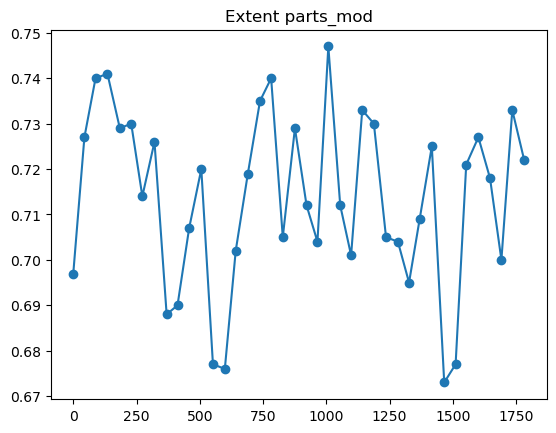

In [12]:
plt.plot(parts_mod['Extent'], "o-")
plt.title('Extent parts_mod')
plt.show()

In [13]:
_, pval_runs = runstest_1samp(parts_mod['Extent'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.343


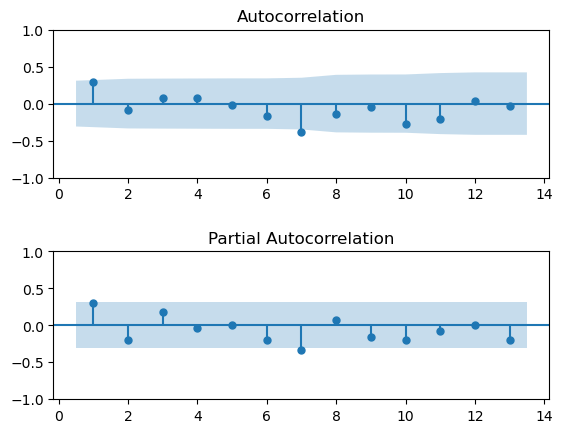

In [14]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Extent'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Extent'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

This is a borderline situation. There isn't enough evidence to reject the independence.

<br>

#### **(B)** Randomness rejected

<br>

##### **(i)** *High correlation at lag_1*

##### SECOND variable: **Area**

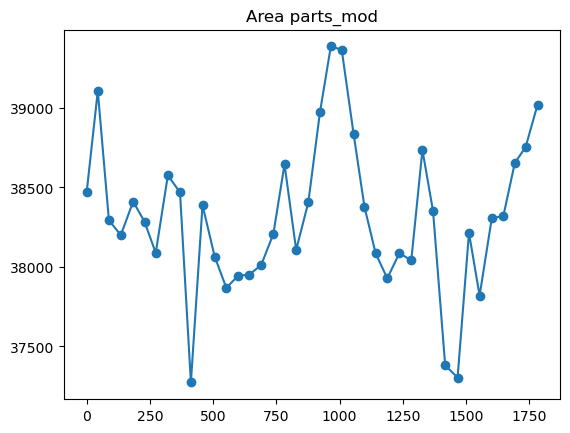

In [15]:
plt.plot(parts_mod['Area [pixels]'], "o-")
plt.title('Area parts_mod')
plt.show()

In [16]:
_, pval_runs = runstest_1samp(parts_mod['Area [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.056


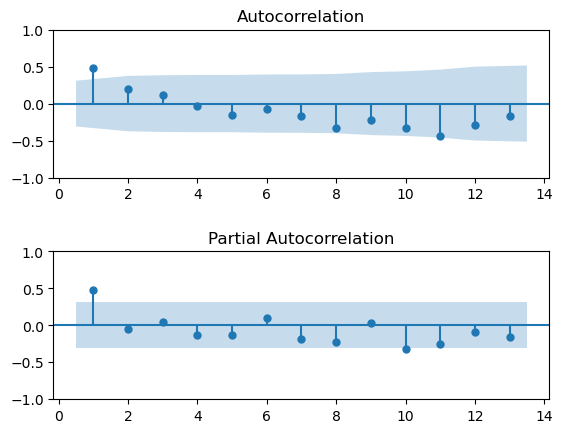

In [17]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Area [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Area [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### THIRD variable: **Perimeter**

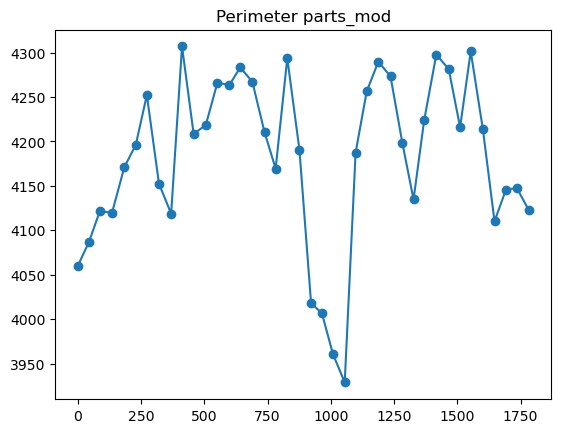

In [18]:
plt.plot(parts_mod['Perimeter [pixels]'], "o-")
plt.title('Perimeter parts_mod')
plt.show()

In [19]:
_, pval_runs = runstest_1samp(parts_mod['Perimeter [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.002


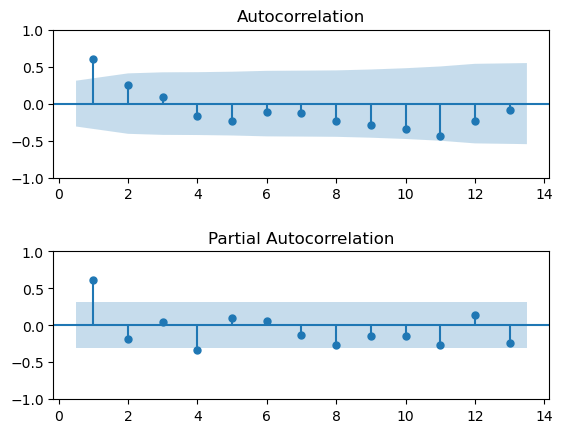

In [20]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Perimeter [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Perimeter [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### FOURTH variable: **Solidity**

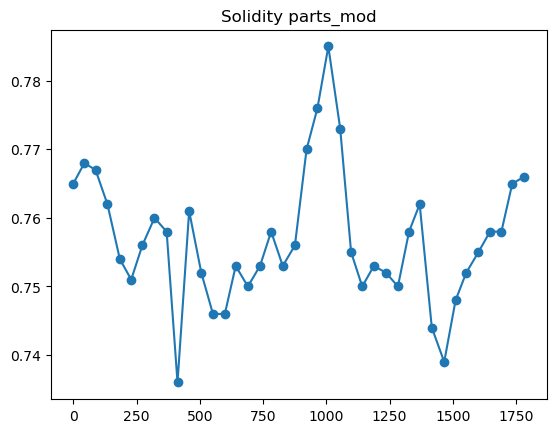

In [21]:
plt.plot(parts_mod['Solidity'], "o-")
plt.title('Solidity parts_mod')
plt.show()

In [22]:
_, pval_runs = runstest_1samp(parts_mod['Solidity'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.012


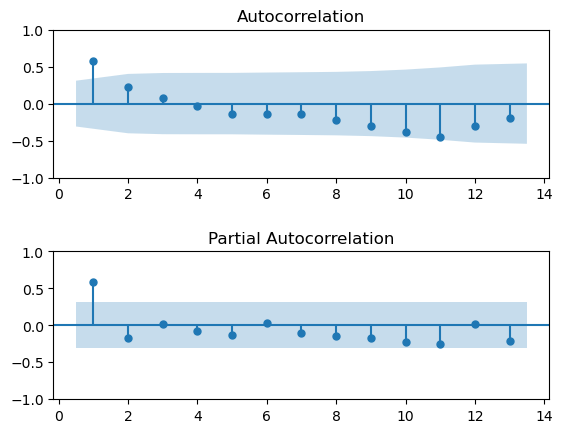

In [23]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Solidity'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Solidity'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### FIFTH variable: **Minor Axis Length**

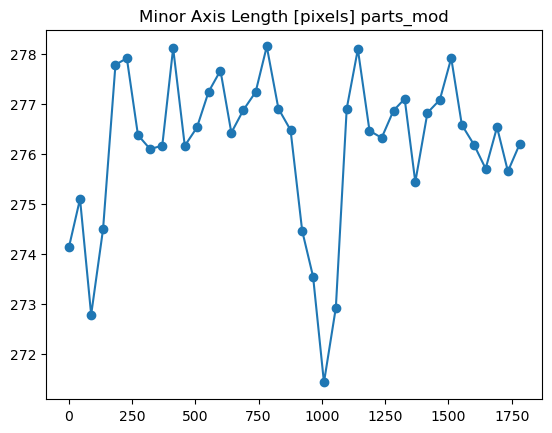

In [24]:
plt.plot(parts_mod['Minor Axis Length [pixels]'], "o-")
plt.title('Minor Axis Length [pixels] parts_mod')
plt.show()

In [25]:
_, pval_runs = runstest_1samp(parts_mod['Minor Axis Length [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.066


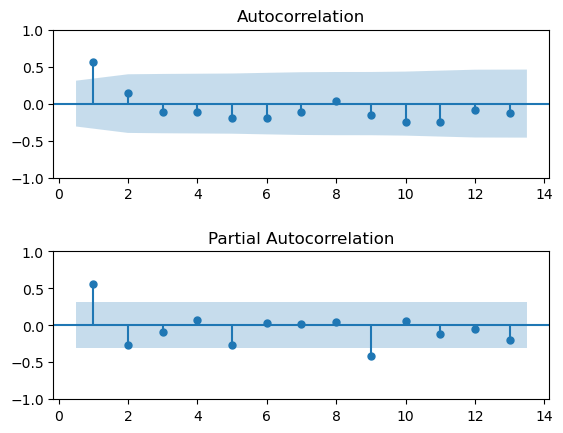

In [26]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Minor Axis Length [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Minor Axis Length [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### SIXTH variable: **Equivalent Diameter**

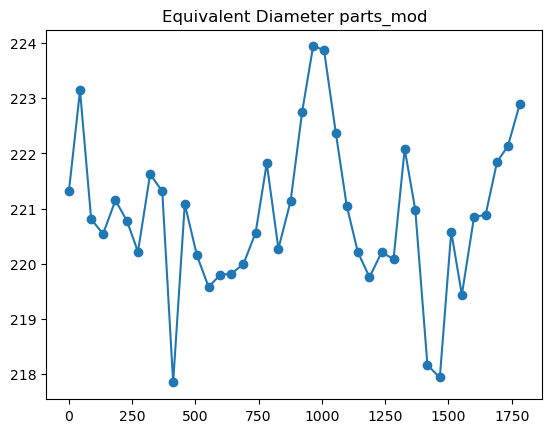

In [27]:
plt.plot(parts_mod['Equivalent Diameter [pixels]'], "o-")
plt.title('Equivalent Diameter parts_mod')
plt.show()

In [28]:
_, pval_runs = runstest_1samp(parts_mod['Equivalent Diameter [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.056


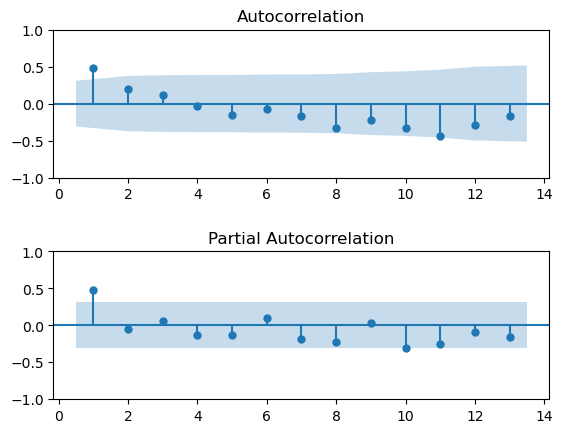

In [29]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Equivalent Diameter [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Equivalent Diameter [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### SEVENTH variable: **Total area of voids**

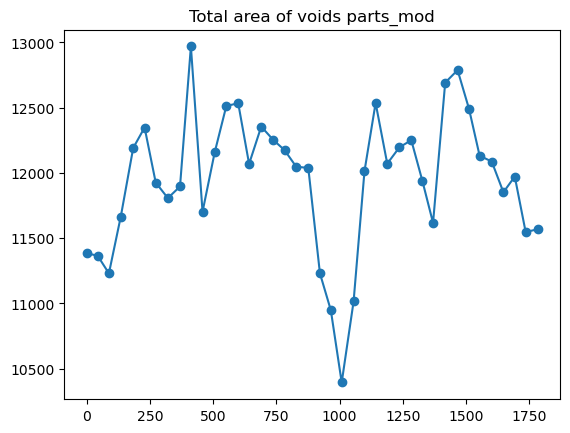

In [30]:
plt.plot(parts_mod['Total area of voids'], "o-")
plt.title('Total area of voids parts_mod')
plt.show()

In [31]:
_, pval_runs = runstest_1samp(parts_mod['Total area of voids'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.013


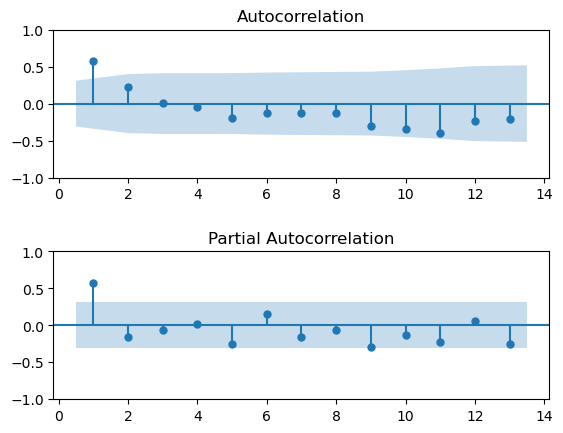

In [32]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Total area of voids'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Total area of voids'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### **(ii)** *Seasonality*

##### EIGHTH variable: **Eccentricity**

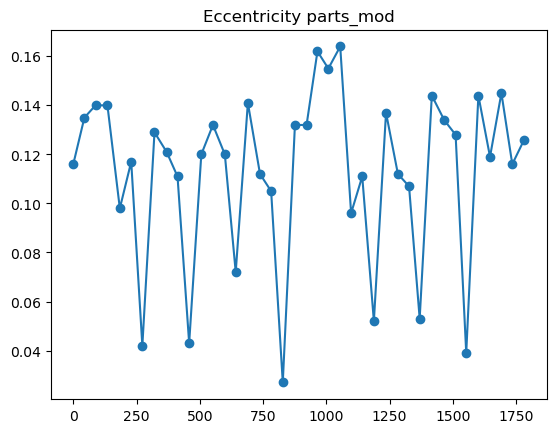

In [33]:
plt.plot(parts_mod['Eccentricity'], "o-")
plt.title('Eccentricity parts_mod')
plt.show()

In [34]:
_, pval_runs = runstest_1samp(parts_mod['Eccentricity'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.347


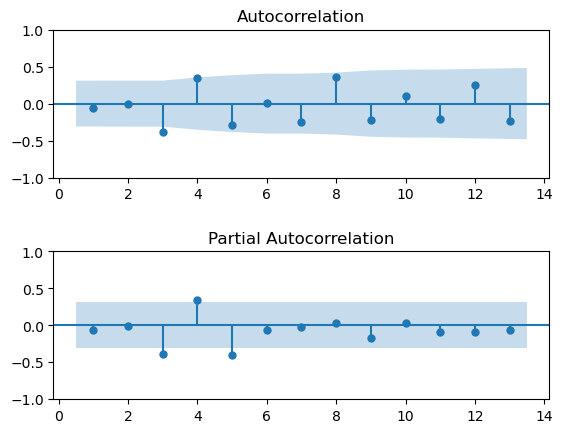

In [35]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Eccentricity'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Eccentricity'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### NINTH variable: **Orientation**

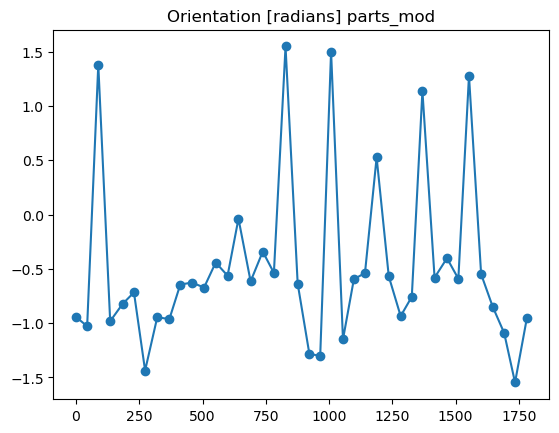

In [36]:
plt.plot(parts_mod['Orientation [radians]'], "o-")
plt.title('Orientation [radians] parts_mod')
plt.show()

Starting from the second half of the chart, a *sesonal pattern* can be observed.

<br>

In [37]:
_, pval_runs = runstest_1samp(parts_mod['Orientation [radians]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.031


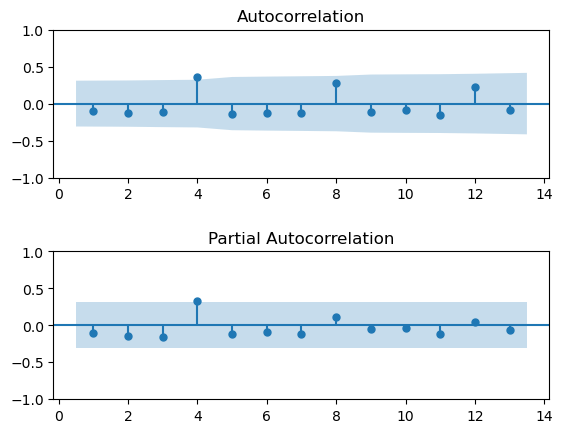

In [38]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Orientation [radians]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Orientation [radians]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### TENTH variable: **Major Axis**

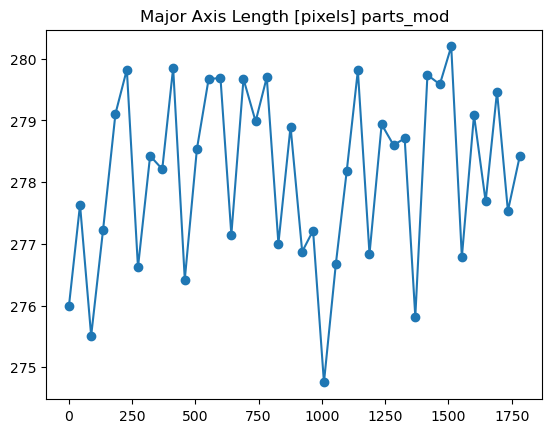

In [39]:
plt.plot(parts_mod['Major Axis Length [pixels]'], "o-")
plt.title('Major Axis Length [pixels] parts_mod')
plt.show()

In [40]:
_, pval_runs = runstest_1samp(parts_mod['Major Axis Length [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.634


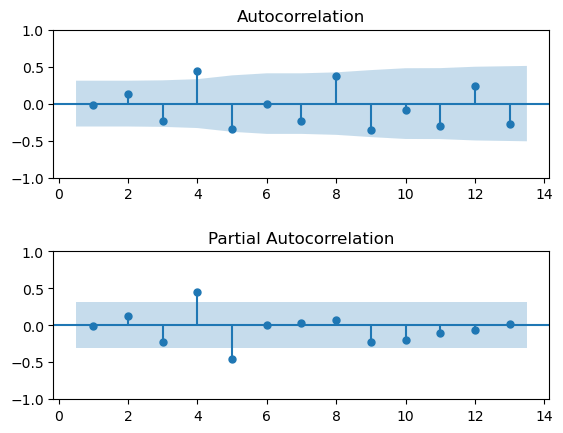

In [41]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Major Axis Length [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Major Axis Length [pixels]'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### ELEVENTH variable: **Number of voids**

In [42]:
# Check if the Poisson distribution followed by the variable 'Number of voids' can be apporoximated by a Normal distribution
# Computation of lambda
poisson_lambda = parts_mod['Number of voids'].mean()
print('lambda = %.3f' % poisson_lambda)

threshold = 10

if poisson_lambda >= threshold:
    print('The Poisson distribution can be approximated by a Normal distribution with mean = %.3f' % poisson_lambda)
else:
    print('The Poisson distribution can NOT be approximated by a Normal distribution')


lambda = 44.725
The Poisson distribution can be approximated by a Normal distribution with mean = 44.725


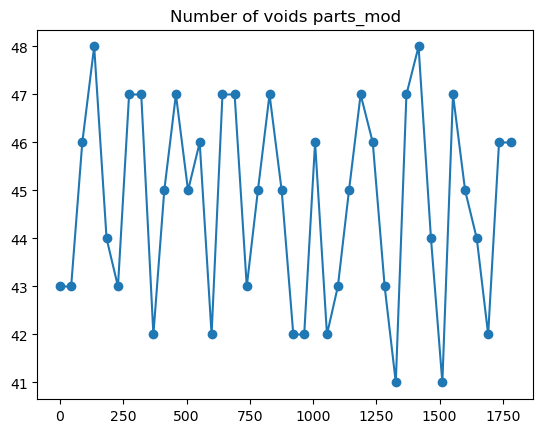

In [43]:
plt.plot(parts_mod['Number of voids'], "o-")
plt.title('Number of voids parts_mod')
plt.show()

In [44]:
_, pval_runs = runstest_1samp(parts_mod['Number of voids'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.857


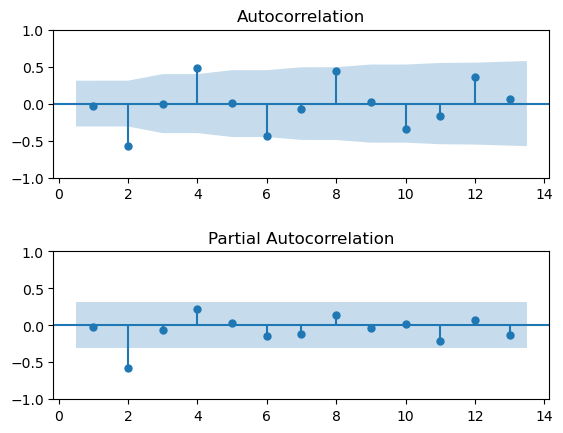

In [45]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(parts_mod['Number of voids'], lags = int(len(parts_mod)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(parts_mod['Number of voids'], lags = int(len(parts_mod)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

During independence testing, it was observed that a significant number of variables were NOT random, thus making the normality check unnecessary. Therefore, PCA was applied to the variables as they were, with the understanding that non-randomness could potentially be transferred to the principal components. However, it was *considered more efficient to address the non-randomness in the selected PC*, thus dealing with a smaller number of variables.

<br>

### **PCA** - *parts_mod*

The dataset was prepared for PCA by *removing all non-numerical columns* and the ID variable, as it is merely a label.

<br>

In [46]:
# elimination of non-numerical columns
parts_mod_num = parts_mod.select_dtypes(include=[np.number])

# elimination of the column ID
parts_mod_num.drop('ID', axis=1, inplace=True)

c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


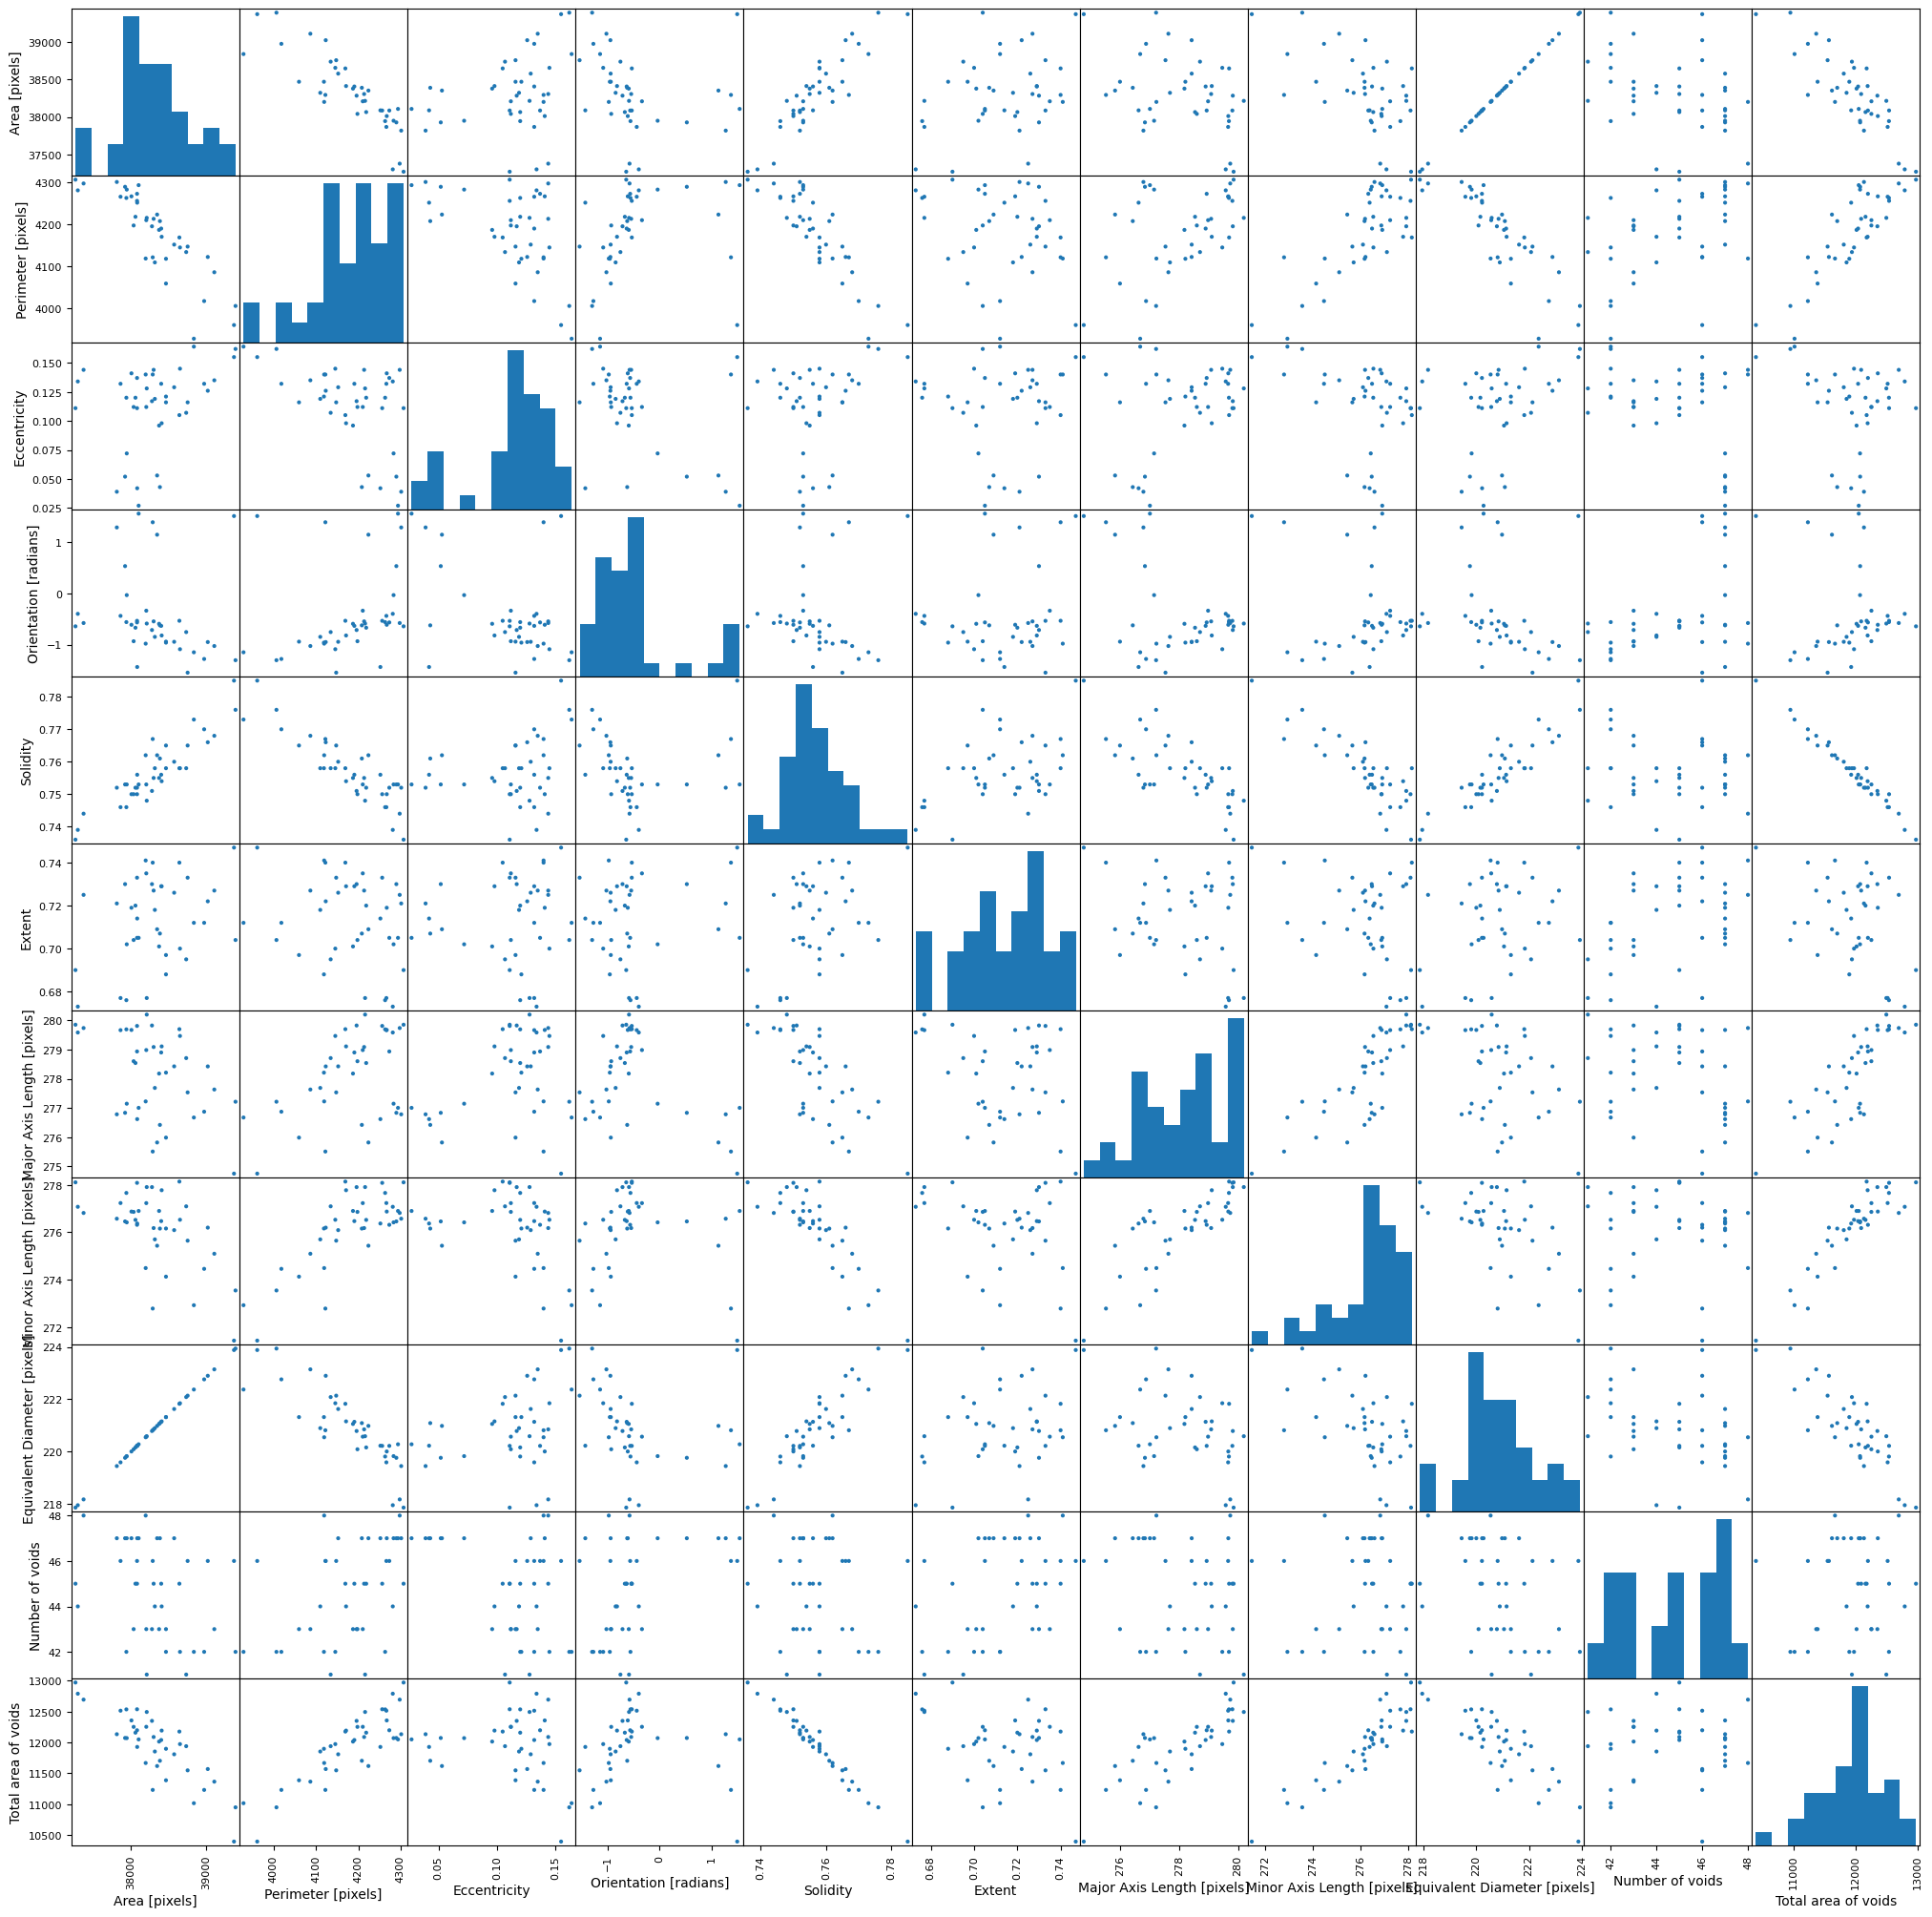

In [47]:
# Creation of the correlation plot of the dataset parts_mod_num
pd.plotting.scatter_matrix(parts_mod_num, alpha = 1, figsize=(25, 25))
plt.show()

In [48]:
# Computation of the correlation matrix of parts_mod_num
corr_matrix_parts = parts_mod_num.corr()
print(corr_matrix_parts)

                              Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                      1.000000           -0.844685      0.297432   
Perimeter [pixels]                -0.844685            1.000000     -0.515561   
Eccentricity                       0.297432           -0.515561      1.000000   
Orientation [radians]             -0.178225            0.244032     -0.398906   
Solidity                           0.900796           -0.873313      0.238539   
Extent                             0.320128           -0.238225      0.048271   
Major Axis Length [pixels]        -0.410464            0.463201      0.287735   
Minor Axis Length [pixels]        -0.579368            0.761546     -0.336416   
Equivalent Diameter [pixels]       0.999989           -0.844060      0.295912   
Number of voids                   -0.343345            0.437993     -0.385514   
Total area of voids               -0.838026            0.851646     -0.195592   

                           

<br>

By examining the plots and the correlation matrix, the following correlations are highlighted:
-	*Total area voids* and *solidity* are **negatively** correlated.
-	*Perimeter* and *solidity* are **negatively** correlated.
-	*Area* and *solidity* are **positively** correlated.
-	*Area* and *equivalent diameter* are **almost perfectly** correlated.

<br>

In [49]:
# Computation of the variance covariance matrix of parts_mod_num
cov_matrix_parts = parts_mod_num.cov()
print(cov_matrix_parts)

                              Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                 233990.225000       -38988.490696      5.039951   
Perimeter [pixels]            -38988.490696         9105.123701     -1.723309   
Eccentricity                       5.039951           -1.723309      0.001227   
Orientation [radians]            -68.799922           18.582685     -0.011151   
Solidity                           4.231024           -0.809158      0.000081   
Extent                             3.016218           -0.442762      0.000033   
Major Axis Length [pixels]      -282.810241           62.955426      0.014357   
Minor Axis Length [pixels]      -431.952626          112.000936     -0.018164   
Equivalent Diameter [pixels]     674.275323         -112.268852      0.014449   
Number of voids                 -346.728846           87.250976     -0.028193   
Total area of voids          -215267.169872        43154.279647     -3.638413   

                           

<br>

The covariance matrix reveals that the variables have *variances with different orders of magnitude*. Therefore, **data standardization** is applied to enable meaningful comparisons.

<br>

In [50]:
# Standardization of parts_mod_num by subtracting the mean and dividing by the standard deviation
parts_mod_num_std = (parts_mod_num - parts_mod_num.mean()) / parts_mod_num.std()

parts_mod_num_std.describe()

Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
count   4.000000e+01        4.000000e+01  4.000000e+01           4.000000e+01   
mean    6.022960e-15        2.967071e-15 -5.329071e-16          -6.383782e-17   
std     1.000000e+00        1.000000e+00  1.000000e+00           1.000000e+00   
min    -2.158921e+00       -2.651504e+00 -2.461461e+00          -1.333471e+00   
25%    -5.340324e-01       -6.179870e-01 -1.919782e-01          -5.831859e-01   
50%    -3.788307e-02        1.587228e-01  1.934056e-01          -1.868977e-01   
75%     5.704166e-01        8.625606e-01  6.358833e-01          -3.934688e-02   
max     2.209260e+00        1.311019e+00  1.449471e+00           2.542322e+00   

           Solidity        Extent  Major Axis Length [pixels]  \
count  4.000000e+01  4.000000e+01                4.000000e+01   
mean   2.112199e-14 -2.263467e-15                5.886194e-14   
std    1.000000e+00  1.000000e+00                1.000000e+00   
min   -2.147265e+00 -2.079290e+00               -2.367934e+00   
25%   -5.252303e-01 -6.032509e-01               -8.100458e-01   
50%   -1.390315e-01  1.283513e-01                2.100587e-01   
75%    5.303796e-01  7.957778e-01                9.623243e-01   
max    2.899065e+00  1.719907e+00                1.455527e+00   

       Minor Axis Length [pixels]  Equivalent Diameter [pixels]  \
count                4.000000e+01                  4.000000e+01   
mean                -3.501375e-14                 -1.119660e-14   
std                  1.000000e+00                  1.000000e+00   
min                 -3.071285e+00                 -2.171404e+00   
25%                 -3.109257e-01                 -5.318031e-01   
50%                  1.938480e-01                 -3.465006e-02   
75%                  5.930280e-01                  5.724434e-01   
max                  1.280279e+00                  2.197517e+00   

       Number of voids  Total area of voids  
count     4.000000e+01         4.000000e+01  
mean     -6.605827e-16         1.942890e-17  
std       1.000000e+00         1.000000e+00  
min      -1.784293e+00        -2.928489e+00  
25%      -8.262831e-01        -5.562270e-01  
50%       1.317263e-01         1.767780e-01  
75%       1.089736e+00         5.689381e-01  
max       1.568740e+00         1.920549e+00

<br>

To confirm the success of the standardization, the correlation matrix of the original data is now compared with the variance-covariance matrix of the standardized data.

<br>

In [51]:
# checking that the correlaion matrix on the original data parts_mod_num and the variance-covariance matrix of the standardized data parts_mod_num_std are equal
cov_matrix_parts_std = parts_mod_num_std.cov()
print(cov_matrix_parts_std)

                              Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                      1.000000           -0.844685      0.297432   
Perimeter [pixels]                -0.844685            1.000000     -0.515561   
Eccentricity                       0.297432           -0.515561      1.000000   
Orientation [radians]             -0.178225            0.244032     -0.398906   
Solidity                           0.900796           -0.873313      0.238539   
Extent                             0.320128           -0.238225      0.048271   
Major Axis Length [pixels]        -0.410464            0.463201      0.287735   
Minor Axis Length [pixels]        -0.579368            0.761546     -0.336416   
Equivalent Diameter [pixels]       0.999989           -0.844060      0.295912   
Number of voids                   -0.343345            0.437993     -0.385514   
Total area of voids               -0.838026            0.851646     -0.195592   

                           

<br>

VERIFICATION: the two matrices are **identical**, demonstrating that the procedure was performed correctly.

<br>

In [52]:
# Applying the PCA on the variance-covariance matrix of parts_mod_num_std

pca_parts = PCA()
pca_parts.fit(parts_mod_num_std)

print("Eigenvalues \n", pca_parts.explained_variance_)
print("\nEigenvectors \n", pca_parts.components_)
print("\nExplained variance ratio \n", pca_parts.explained_variance_ratio_)
print("\nCumulative explained variance ratio \n", np.cumsum(pca_parts.explained_variance_ratio_))

Eigenvalues 
 [5.92964253e+00 2.44636740e+00 1.01773576e+00 7.81782920e-01
 5.17647068e-01 2.50330497e-01 4.77751449e-02 4.91962705e-03
 3.12001953e-03 6.71051343e-04 7.99218175e-06]

Eigenvectors 
 [[ 3.72361280e-01 -3.79271023e-01  1.36960125e-01 -1.29421588e-02
   4.06709639e-01  1.63635051e-01 -2.75395267e-01 -3.52714100e-01
   3.72185246e-01 -7.96296586e-02 -4.01588475e-01]
 [-1.35240834e-01  1.87881988e-01 -4.04583775e-01  4.90993854e-01
   6.26811772e-02  2.56776092e-01 -3.99626946e-01 -1.49962362e-01
  -1.34994360e-01  5.09423402e-01 -1.08895835e-01]
 [ 1.60757836e-02  2.67021775e-02  3.72492302e-01 -2.05049530e-01
   1.22970791e-03  7.42784969e-01  3.06817246e-01  7.20202327e-02
   1.61465560e-02  3.98631027e-01  8.95018022e-02]
 [-3.51002708e-01 -1.05279481e-01  6.38301221e-01  1.92093573e-01
  -6.57278288e-02 -2.09194342e-01 -7.37569537e-02 -4.85504805e-01
  -3.53197532e-01  7.96539837e-02 -3.24694173e-02]
 [-1.42040798e-01 -1.90428460e-02 -1.77431103e-01 -8.01115574e-01
   

<br>

Based on the *predetermined threshold* (assumption 6), the **first 3 PC** are considered.

<br>

In [53]:
scores_parts = pca_parts.transform(parts_mod_num_std)
scores_df_parts = pd.DataFrame(scores_parts, columns = ['z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11'])

scores_df_parts.head()

z1        z2        z3        z4        z5        z6        z7  \
0  2.310154 -0.312248 -1.484623  0.696751  0.956282 -0.586859  0.071491   
1  3.113087 -1.023221  0.329781 -0.664004 -0.126385  0.020452 -0.358302   
2  2.697954  2.668132  0.200745  1.975946 -1.028845 -0.534656 -0.253405   
3  1.274890  0.993890  1.742684  0.992333  1.169563 -0.229910  0.255639   
4 -0.568607 -0.580817  0.709049 -1.232309 -0.311318 -0.449375  0.297333   

         z8        z9       z10       z11  
0 -0.081814 -0.077634  0.024199 -0.002041  
1 -0.084025  0.075985  0.035627  0.003419  
2 -0.054030 -0.035006 -0.032708 -0.003378  
3 -0.000273 -0.011328  0.028229 -0.003702  
4 -0.055385  0.024558 -0.017678  0.000380

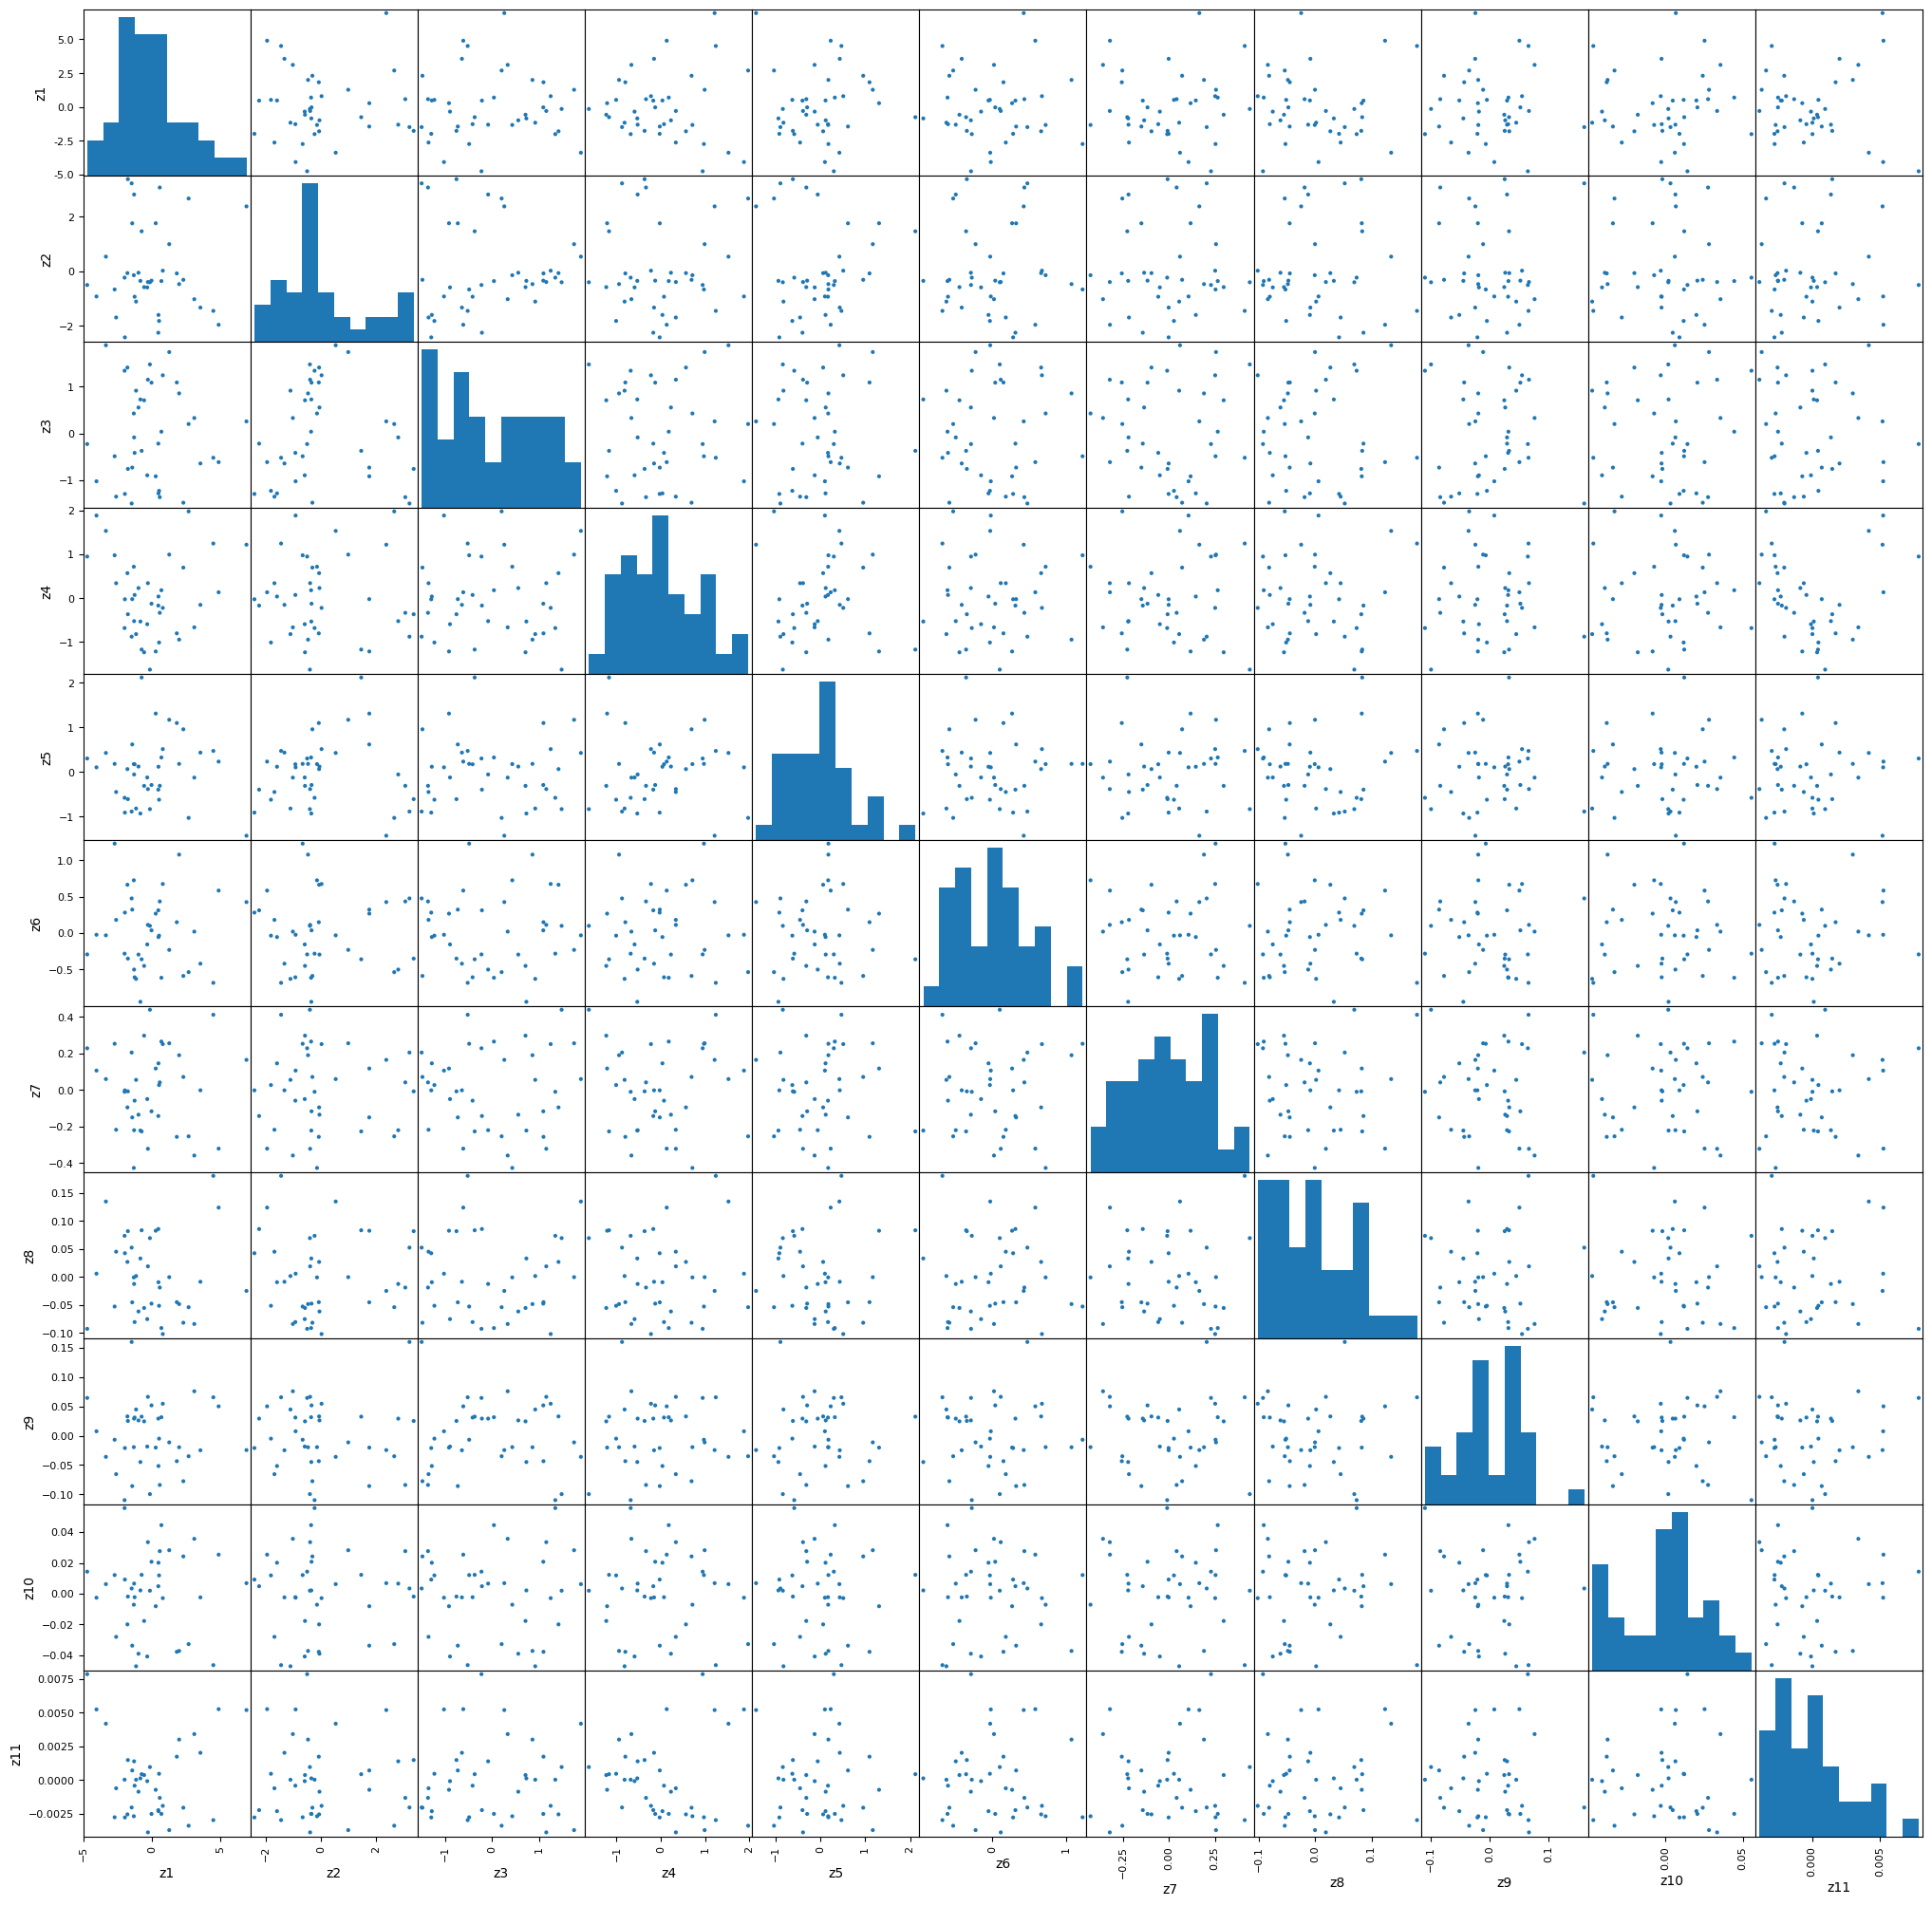

In [54]:
# Plotting the scores in a scatter plot
pd.plotting.scatter_matrix(scores_df_parts, alpha = 1, figsize=(25, 25))
plt.show()

In [55]:
# Computation of the correlation matrix of scores_df_parts
corr_matrix_scores_df_parts = scores_df_parts.corr()
print(corr_matrix_scores_df_parts)

               z1            z2            z3            z4            z5  \
z1   1.000000e+00  4.185608e-17 -2.317629e-16 -1.137069e-16  2.144808e-16   
z2   4.185608e-17  1.000000e+00 -4.239700e-16 -1.276243e-16 -2.292535e-16   
z3  -2.317629e-16 -4.239700e-16  1.000000e+00 -2.932922e-15 -6.275253e-17   
z4  -1.137069e-16 -1.276243e-16 -2.932922e-15  1.000000e+00 -1.991341e-16   
z5   2.144808e-16 -2.292535e-16 -6.275253e-17 -1.991341e-16  1.000000e+00   
z6  -2.243085e-16 -1.673346e-16 -4.963110e-16 -1.158292e-16 -5.614747e-16   
z7  -7.889008e-16  5.620663e-17  1.116717e-15  5.413260e-16 -4.808357e-16   
z8   1.739650e-15  6.235841e-16 -1.501123e-15 -2.656608e-15 -1.204901e-15   
z9  -2.316601e-15  1.381262e-15  2.974270e-15  3.661940e-15 -2.650792e-16   
z10  6.391362e-15  6.608812e-16 -6.406486e-15  2.206089e-15  1.873443e-16   
z11 -8.116986e-14  5.637666e-14  2.564385e-14 -3.338280e-14 -4.935004e-14   

               z6            z7            z8            z9           z10  

<br>

VERIFICATION: the principal components show ***no** correlation* with each other, confirming the success of the PCA.

<br>

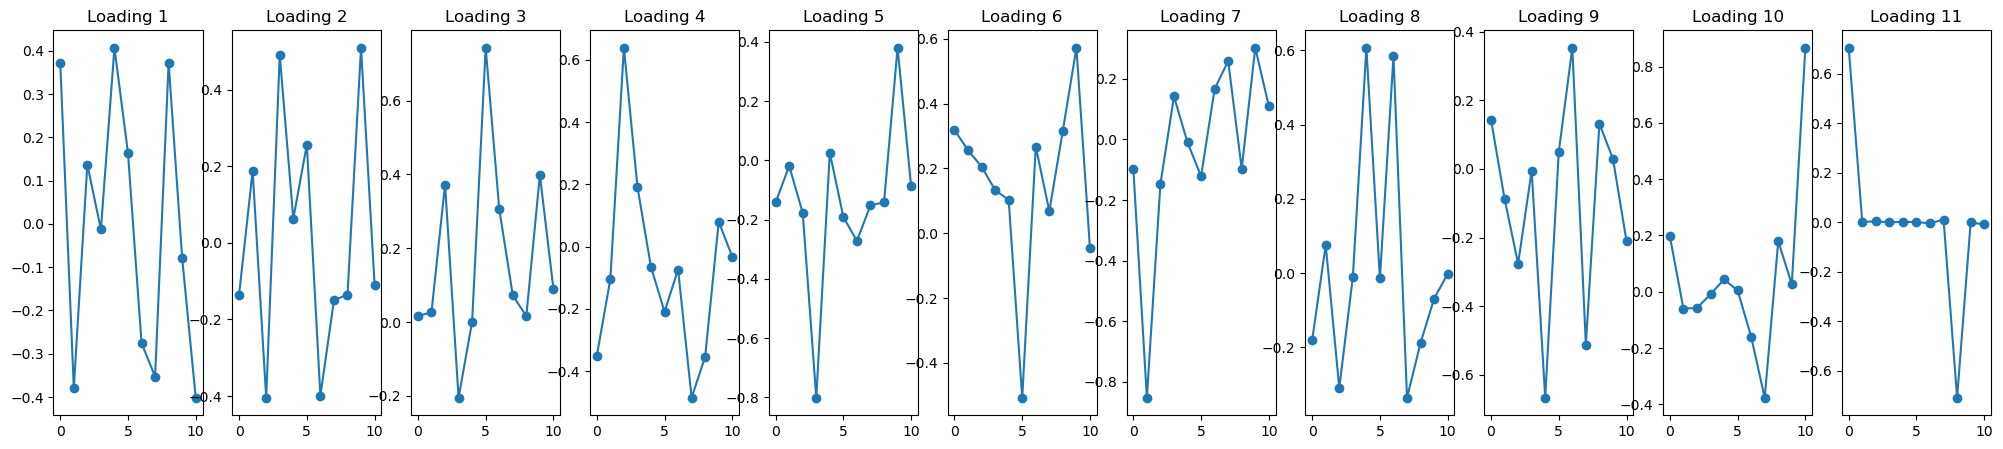

In [56]:
# Plotting of the loadings
fig, ax = plt.subplots(1, 11, figsize = (25, 5))
ax[0].plot(pca_parts.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca_parts.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca_parts.components_[2], 'o-')
ax[2].set_title('Loading 3')
ax[3].plot(pca_parts.components_[3], 'o-')
ax[3].set_title('Loading 4')
ax[4].plot(pca_parts.components_[4], 'o-')
ax[4].set_title('Loading 5')
ax[5].plot(pca_parts.components_[5], 'o-')
ax[5].set_title('Loading 6')
ax[6].plot(pca_parts.components_[6], 'o-')
ax[6].set_title('Loading 7')
ax[7].plot(pca_parts.components_[7], 'o-')
ax[7].set_title('Loading 8')
ax[8].plot(pca_parts.components_[8], 'o-')
ax[8].set_title('Loading 9')
ax[9].plot(pca_parts.components_[9], 'o-')
ax[9].set_title('Loading 10')
ax[10].plot(pca_parts.components_[10], 'o-')
ax[10].set_title('Loading 11')
plt.show()

<br>

From the plots of the first two loadings, it is observed that variables 9 and 10, which were added from the voids dataset, are significant. Specifically:
- the "number of voids" has a value of 0.5094 for 𝑧2,
- while the "total area of voids" has a value of -0.4016 for 𝑧1.

Additionally, it is evident that all variables generally have a significant weight in at least one of the three considered loadings.

<br>

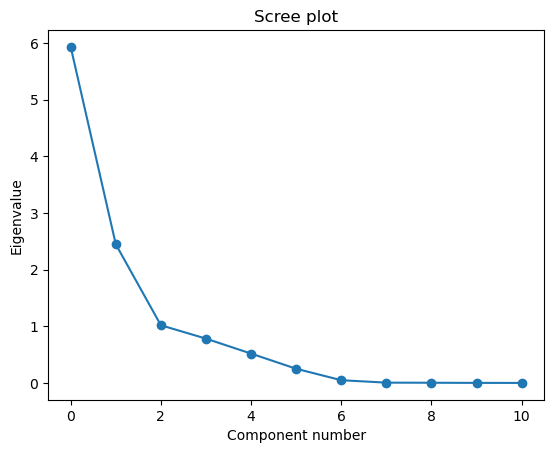

In [57]:
# Plotting of the scree plot
plt.plot(pca_parts.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

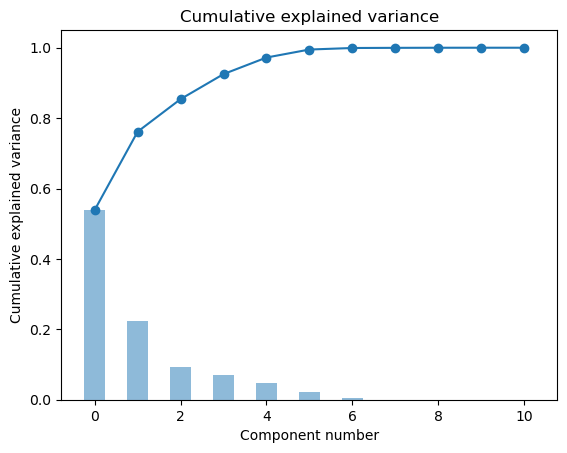

In [58]:
# Plotting the cumulative explained variance
plt.plot(np.cumsum(pca_parts.explained_variance_ratio_), 'o-')
plt.bar(range(0, len(pca_parts.explained_variance_ratio_)), pca_parts.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.show()

<br>

### **PCs Analysis** - *parts_mod*

This section is about verification of the assumptions of *independence* and *normality* for the *selected PCs*.

- ### z1

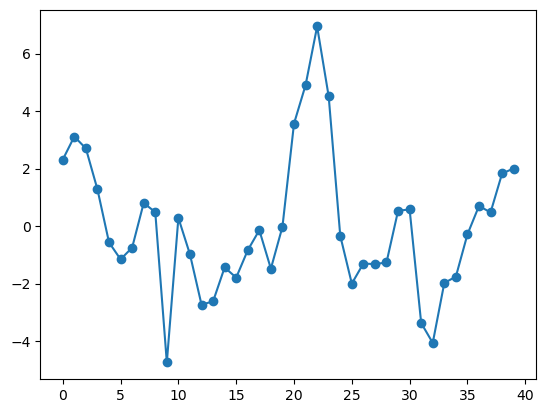

In [59]:
plt.plot(scores_df_parts['z1'], 'o-')
plt.show()

In [60]:
_, pval_runs = runstest_1samp(scores_df_parts['z1'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.002


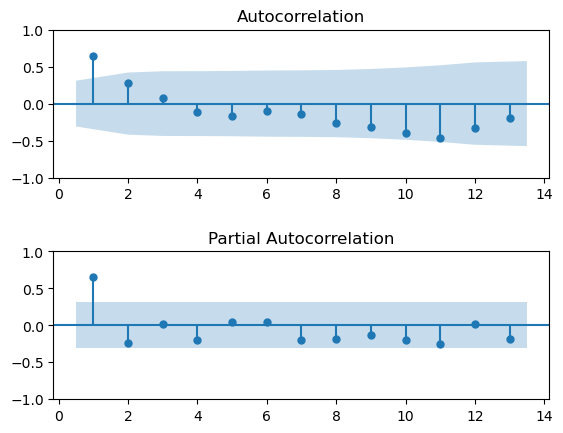

In [61]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(scores_df_parts['z1'], lags = int(len(scores_df_parts)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(scores_df_parts['z1'], lags = int(len(scores_df_parts)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

From the plot, z1 appears to exhibit a **meandering pattern**.
This suggests an issue with randomness, which is addressed by employing a **linear regression model** with **lag_1**, specifically **AR(1)**. Indeed, an AR(1) model might be appropriate as the ACF seems to decay exponentially fast, and the only significant lag in the PACF is lag_1. The exponential decay supports what can be inferred from the scatter plot, namely that z1 appears to be stationary.

<br>

In [62]:
# Add a column with the lagged z1 to use as regressor
scores_df_parts['z1_lag1'] = scores_df_parts['z1'].shift(1)

x = scores_df_parts['z1_lag1'][1:]
x = sm.add_constant(x)
y = scores_df_parts['z1'][1:]
model_parts_z1 = sm.OLS(y, x).fit()
qda.summary(model_parts_z1)

REGRESSION EQUATION
-------------------
z1 =  -0.025 const + 0.659 z1_lag1

COEFFICIENTS
------------
   Term    Coef  SE Coef  T-Value    P-Value
  const -0.0254    0.297  -0.0857 9.3220e-01
z1_lag1  0.6586    0.123   5.3529 4.7211e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.8545 0.4364     0.4212

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS  Adj MS  F-Value    P-Value
Regression  1.0  98.5389 98.5389  28.6532 4.7211e-06
     const  1.0   0.0252  0.0252   0.0073 9.3220e-01
   z1_lag1  1.0  98.5389 98.5389  28.6532 4.7211e-06
     Error 37.0 127.2435  3.4390      NaN        NaN
     Total 38.0 225.7824     NaN      NaN        NaN


<br>

Since the p-value of the **constant** is greater than alpha (5%), it is *NOT statistically significant*. Therefore, it is **removed** from the model.

<br>

In [63]:
# Overwrite of the model_parts_z1 taking out the constant
scores_df_parts['z1_lag1'] = scores_df_parts['z1'].shift(1)

x = scores_df_parts['z1_lag1'][1:]
y = scores_df_parts['z1'][1:]
model_parts_z1 = sm.OLS(y, x).fit()
qda.summary(model_parts_z1)

REGRESSION EQUATION
-------------------
z1 =  + 0.659 z1_lag1

COEFFICIENTS
------------
   Term   Coef  SE Coef  T-Value    P-Value
z1_lag1 0.6589   0.1214   5.4273 3.4726e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.8299 0.4367     0.4218

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS  Adj MS  F-Value    P-Value
Regression  1.0  98.6505 98.6505  29.4551 3.4726e-06
   z1_lag1  1.0  98.6505 98.6505  29.4551 3.4726e-06
     Error 38.0 127.2688  3.3492      NaN        NaN
     Total 39.0 225.9192     NaN      NaN        NaN


<br>

The p-value of **z1_lag_1** being less than the alpha level (5%) indicates its *significance* as a variable; it is hence **retained** in the model.

The assessment of the model's goodness of fit proceeds by checking for *independence and normality on the residuals*.

<br>

In [64]:
_, pval_runs_resid = runstest_1samp(model_parts_z1.resid, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs_resid))

Runs test p-value = 0.651


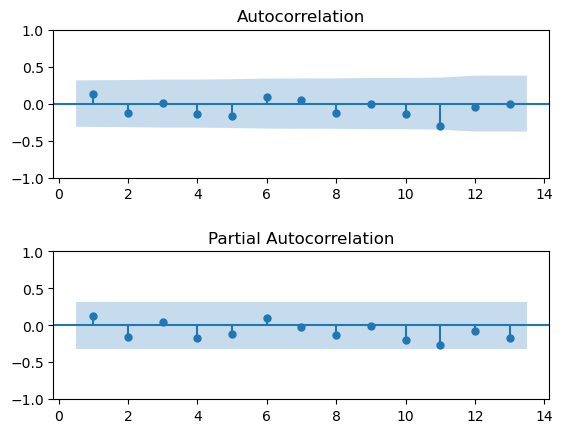

In [65]:
# Checking the autocorrelation of the residuals
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model_parts_z1.resid, lags = int(len(scores_df_parts)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model_parts_z1.resid, lags = int(len(scores_df_parts)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Independence is NOT rejected by both runs test and confirmed by ACF & PACF plots.

<br>

Shapiro-Wilk test p-value on the residuals = 0.264


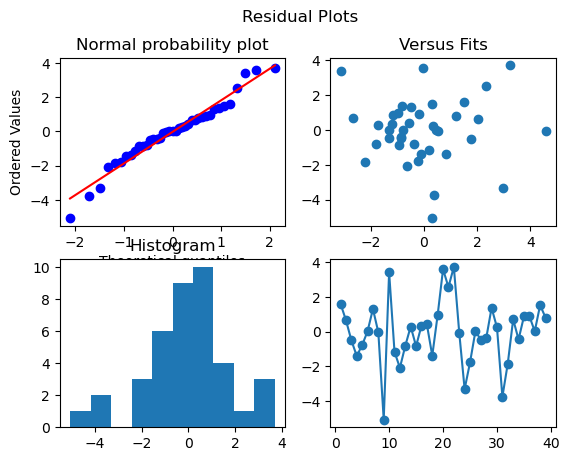

In [66]:
# Plotting the residuals and testing for normality
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model_parts_z1.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model_parts_z1.fittedvalues, model_parts_z1.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model_parts_z1.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model_parts_z1.resid)+1), model_parts_z1.resid, 'o-')
_, pval_SW_res = stats.shapiro(model_parts_z1.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Normality is NOT rejected.

The selected **model** is therefore **appropriate**.

<br>

- ### z2

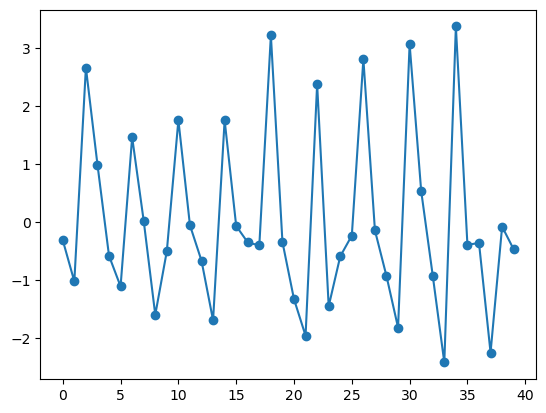

In [67]:
plt.plot(scores_df_parts['z2'], 'o-')
plt.show()

Observing the data, there appears to be **seasonality**.

Let's verify this with tests.

<br>

In [68]:
_, pval_runs = runstest_1samp(scores_df_parts['z2'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.646


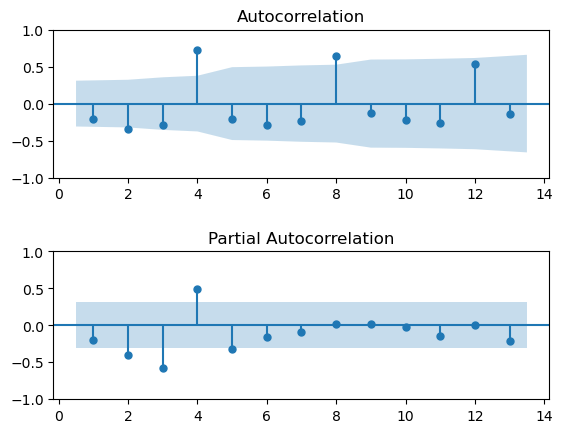

In [69]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(scores_df_parts['z2'], lags = int(len(scores_df_parts)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(scores_df_parts['z2'], lags = int(len(scores_df_parts)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

As previously hypothesized, the ACF shows that **z2** is affected by *seasonality*. Being at lag_4, this is likely due to the positioning of the pieces in the image.

An analysis on the images' positions is conducted. To potentially solve the seasonality issue, **dummy variables** are considered and introduced in the model.

<br>

In [70]:
# Creation of 2 variables: 'Position' and 'Image'
scores_df_parts['Position'] = np.tile(np.arange(1, 5), int(len(scores_df_parts)/4))
scores_df_parts['Image'] = np.repeat(np.arange(1, len(scores_df_parts)/4+1), 4)

<br>

*"Image"* corresponds to each individual photo, which contains 4 pieces identified by a *"Position"* (their combination leads to the unique identification of each piece).

<br>

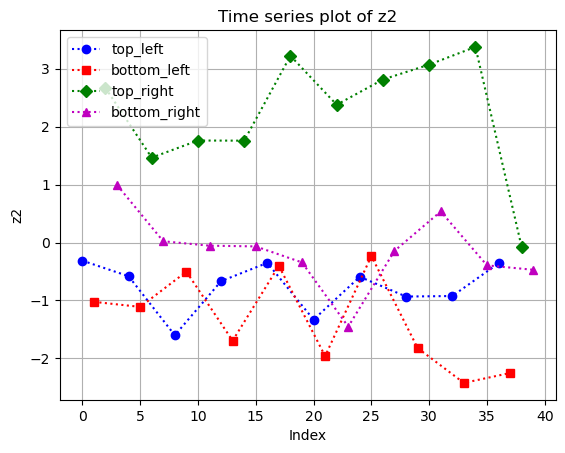

In [71]:
# Plotting the data as 4 separate batches
plt.plot(scores_df_parts['z2'][scores_df_parts['Position'] == 1], 'o:b', label = 'top_left') 
plt.plot(scores_df_parts['z2'][scores_df_parts['Position'] == 2], 's:r', label = 'bottom_left')
plt.plot(scores_df_parts['z2'][scores_df_parts['Position'] == 3], 'D:g', label = 'top_right')
plt.plot(scores_df_parts['z2'][scores_df_parts['Position'] == 4], '^:m', label = 'bottom_right')

plt.xlabel('Index')
plt.ylabel('z2')
plt.legend()
plt.title('Time series plot of z2')
plt.grid()
plt.show()

The chart above shows that the **"Top-Right"** position yields systematically a larger value of the component than the other positions.

<br>

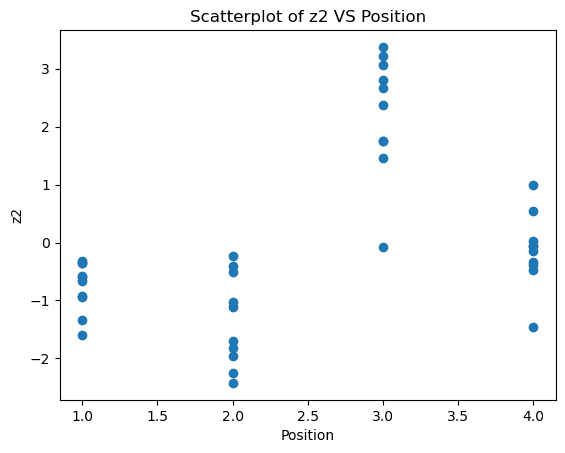

In [72]:
# Additional graph: Scatterplot of z2 VS 'Position'
plt.scatter(scores_df_parts['Position'], scores_df_parts['z2'])
plt.xlabel('Position')
plt.ylabel('z2')
plt.title('Scatterplot of z2 VS Position')
plt.show()

The scatter plot indicates that the average of the "Top-Right" pieces is indeed higher compared to the other positions.

<br>

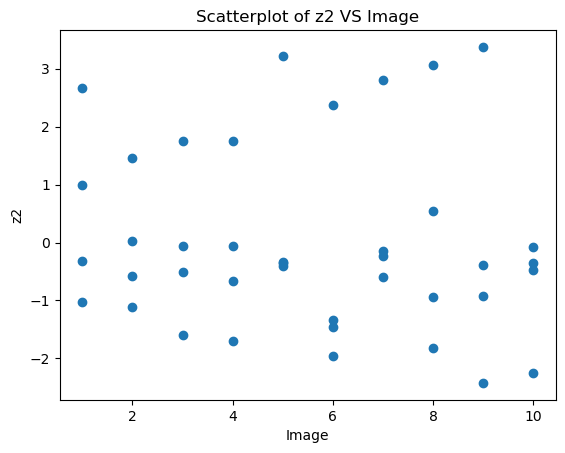

In [73]:
# Additional graph: Scatterplot of z2 VS 'Image'
plt.scatter(scores_df_parts['Image'], scores_df_parts['z2'])
plt.xlabel('Image')
plt.ylabel('z2')
plt.title('Scatterplot of z2 VS Image')
plt.show()

The issue has been identified, so let's model the data by introducing a *dummy variable* for the "Top-Right" pieces.

<br>

In [74]:
# Creation of a dummy variable
scores_df_parts['Dummy'] = np.tile(np.array([0, 0, 1, 0]), int(len(scores_df_parts)/4))

In [75]:
x = scores_df_parts['Dummy']
x = sm.add_constant(scores_df_parts['Dummy']) 
y = scores_df_parts['z2']
model_parts_z2 = sm.OLS(y, x).fit()

qda.summary(model_parts_z2)

REGRESSION EQUATION
-------------------
z2 =  -0.748 const + 2.992 Dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const -0.7479   0.1575  -4.7481 2.9068e-05
Dummy  2.9916   0.3150   9.4962 1.4077e-11

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.8628 0.7035     0.6957

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  1.0 67.1233 67.1233  90.1780 1.4077e-11
     const  1.0 16.7808 16.7808  22.5445 2.9068e-05
     Dummy  1.0 67.1233 67.1233  90.1780 1.4077e-11
     Error 38.0 28.2850  0.7443      NaN        NaN
     Total 39.0 95.4083     NaN      NaN        NaN


<br>

Both **"const"** and **"dummy"** have p-values much lower than the significance level alpha, indicating that they are *statistically significant* and should be **retained** in the model. As done previously, assumptions about the residuals are now going to be verified.

<br>

Runs test p-value on the residuals = 0.789


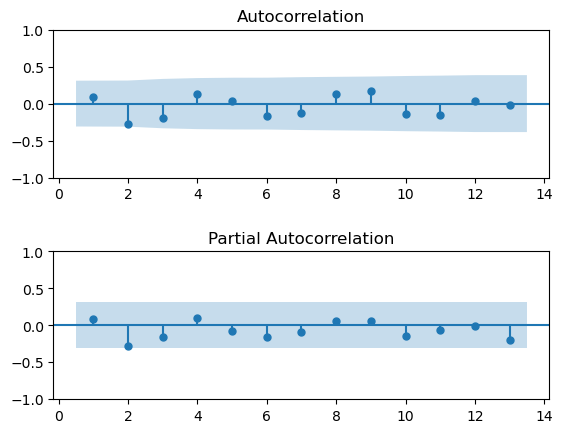

In [76]:
_, pval_runs_res = runstest_1samp(model_parts_z2.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model_parts_z2.resid, lags = int(len(scores_df_parts)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model_parts_z2.resid, lags = int(len(scores_df_parts)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Shapiro-Wilk test p-value on the residuals = 0.321


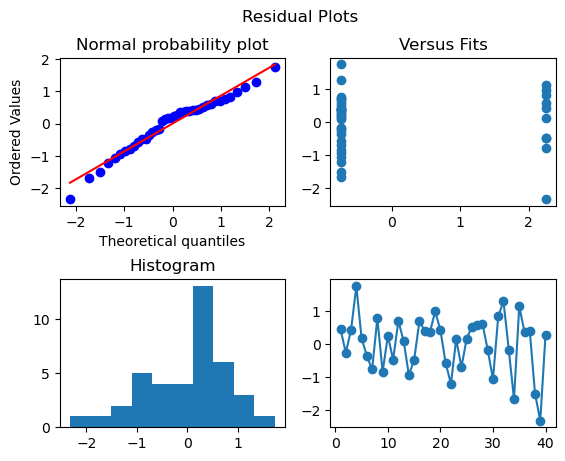

In [77]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model_parts_z2.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model_parts_z2.fittedvalues, model_parts_z2.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model_parts_z2.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model_parts_z2.resid)+1), model_parts_z2.resid, 'o-')
_, pval_SW_res = stats.shapiro(model_parts_z2.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Since residuals appear to be *normal* and *independent*, the chosen model is **adequate**.

<br>

- ### z3

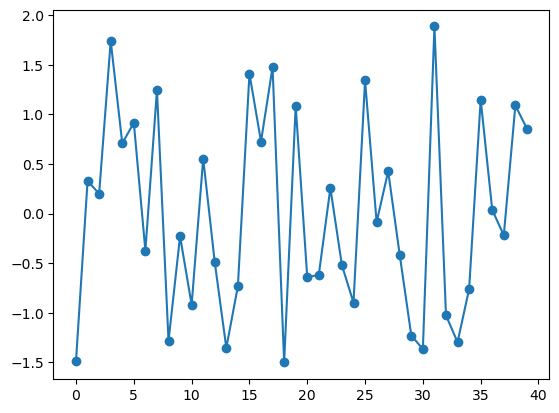

In [78]:
plt.plot(scores_df_parts['z3'], 'o-')
plt.show()

*z3* data *seem to be random*. Let's check with the tests.

<br>

In [79]:
_, pval_runs = runstest_1samp(scores_df_parts['z3'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.736


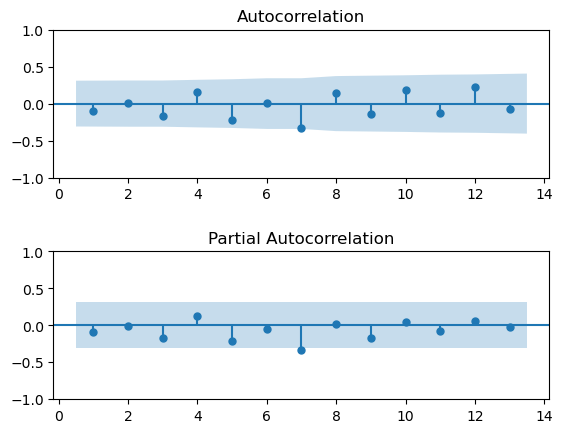

In [80]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(scores_df_parts['z3'], lags = int(len(scores_df_parts)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(scores_df_parts['z3'], lags = int(len(scores_df_parts)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

According to the statistical test and the ACF/PACF plot, there is no evidence to reject the randomness of *z3*.

<br>

Shapiro-Wilk test p-value = 0.067


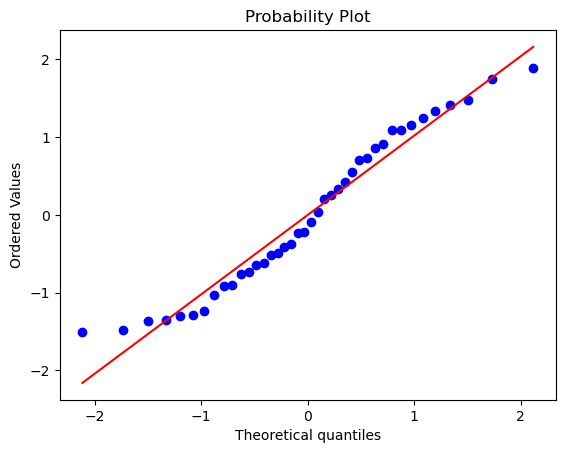

In [81]:
# Shapiro-Wilk test for normality checking
_, pval_SW = stats.shapiro(scores_df_parts['z3'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plotting the QQplot
stats.probplot(scores_df_parts['z3'], dist="norm", plot=plt)
plt.show()

Normality is NOT rejected.

<br>

### <span style="color:grey"> Dataframe Analysis: <span style="color:green"> **BIGGEST VOIDS**

### **INDEPENDENCE TESTING** for each variable - *biggest_voids*

The *same approach used for the parts* is extended. An assessment of the randomness of these variables will be conducted before applying PCA.

Subdivision criterion:

- (A) *Randomness **NOT** rejected*
- (B) *Randomness rejected*

Randomness may be rejected owing to the presence of, along with the autocorrelation, *seasonality*.

<br>

#### **(A)** Randomness NOT rejected

<br>

##### FIRST variable: **Area**

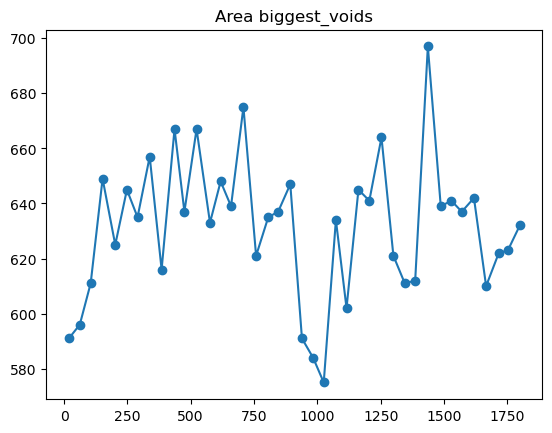

In [82]:
plt.plot(biggest_voids['Area [pixels]'], "o-")
plt.title('Area biggest_voids')
plt.show()

In [83]:
_, pval_runs = runstest_1samp(biggest_voids['Area [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.161


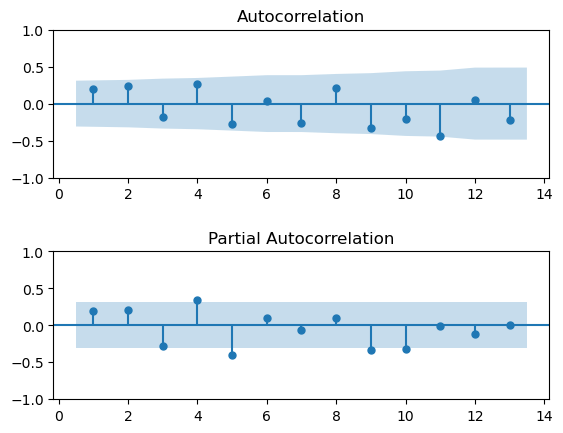

In [84]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Area [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Area [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Because of the significance of *lag_4* and *lag_5* PACF, this is a **borderline** situation. Futher tests need to be conducted.

<br>

In [85]:
lag_test = round(np.sqrt(len(biggest_voids)))

lbq_test = acorr_ljungbox(biggest_voids['Area [pixels]'], lags=[lag_test], return_df=True)
print('LBQ test statistic at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_stat']))
print('LBQ test p-value at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_pvalue']))

LBQ test statistic at lag 6 = 12.392373
LBQ test p-value at lag 6 = 0.053766


Randomness is *NOT* rejected, but *lag_4* is checked with **Bartlett** because it showed possible criticality, potentially linked to the position of the pieces.

<br>

In [86]:
[acf_values, lbq, _] = acf(biggest_voids['Area [pixels]'], nlags = int(np.sqrt(len(biggest_voids))), qstat=True, fft = False)

#Bartlett's test at lag 4
alpha = 0.05
lag_test = 4
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(biggest_voids))))

if rk>z_alpha2/np.sqrt(len(biggest_voids)):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is not rejected')

Test statistic rk = 0.262987
Rejection region starts at 0.309898
The null hypothesis is not rejected


<br>

##### SECOND variable: **Perimeter**

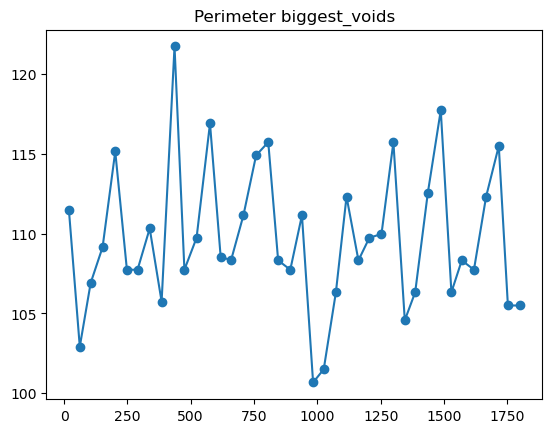

In [87]:
plt.plot(biggest_voids['Perimeter [pixels]'], "o-")
plt.title('Perimeter biggest_voids')
plt.show()

In [88]:
_, pval_runs = runstest_1samp(biggest_voids['Perimeter [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.698


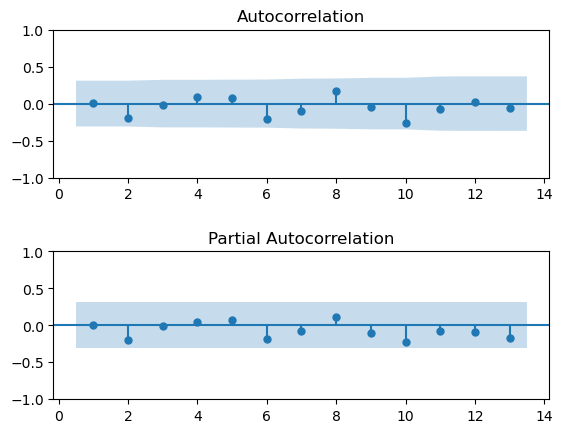

In [89]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Perimeter [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Perimeter [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### THIRD variable: **Equivalent Diameter**

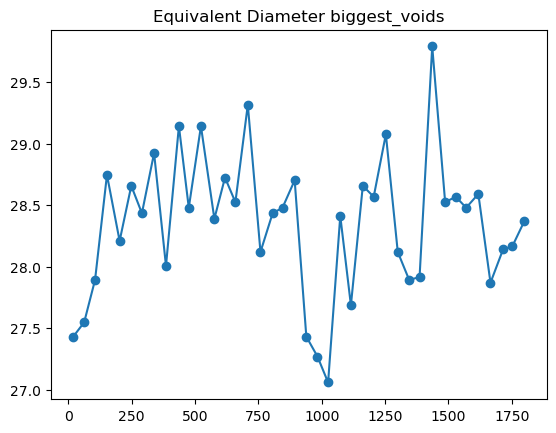

In [90]:
plt.plot(biggest_voids['Equivalent Diameter [pixels]'], "o-")
plt.title('Equivalent Diameter biggest_voids')
plt.show()

In [91]:
_, pval_runs = runstest_1samp(biggest_voids['Equivalent Diameter [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.161


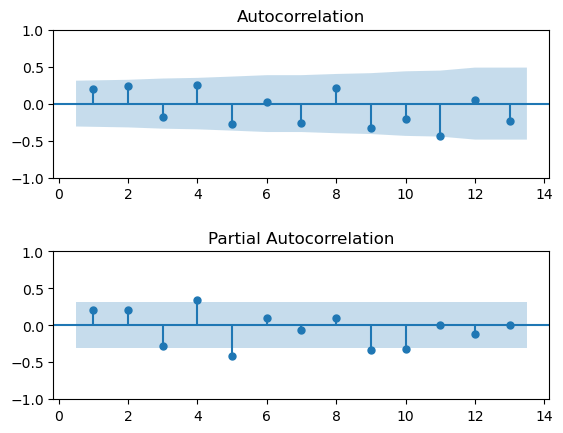

In [92]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Equivalent Diameter [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Equivalent Diameter [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

The *same* applies to the area (as will be shown later, the correlation between area and equivalent diameter is close to 1).

<br>

#### **(B)** Randomness rejected

##### FOURTH variable: **Eccentricity**

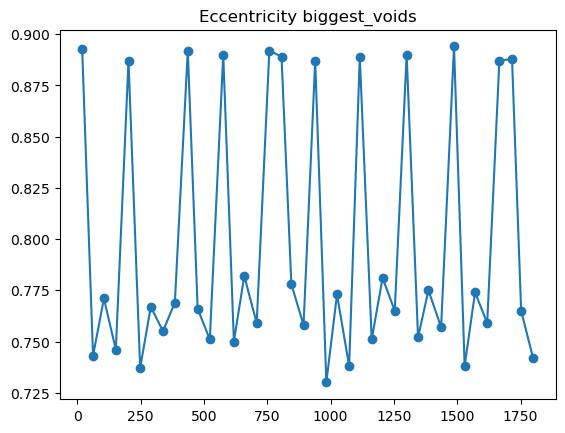

In [93]:
plt.plot(biggest_voids['Eccentricity'], "o-")
plt.title('Eccentricity biggest_voids')
plt.show()

In [94]:
_, pval_runs = runstest_1samp(biggest_voids['Eccentricity'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.399


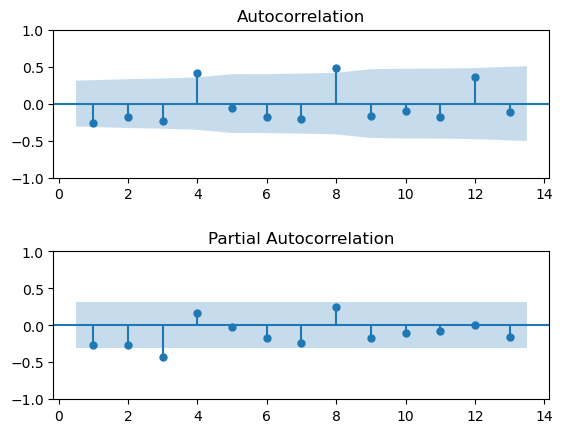

In [95]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Eccentricity'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Eccentricity'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### FIFTH variable: **Orientation**

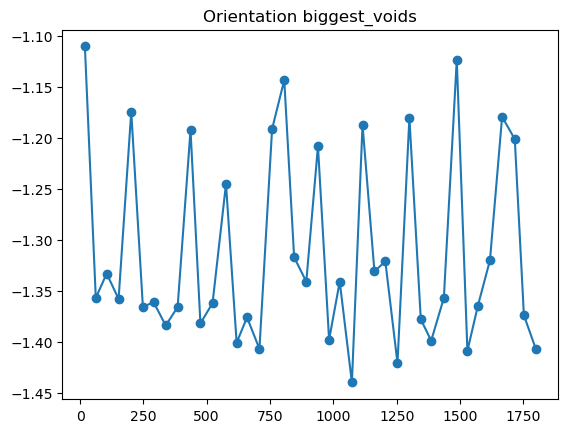

In [96]:
plt.plot(biggest_voids['Orientation [radians]'], "o-")
plt.title('Orientation biggest_voids')
plt.show()

In [97]:
_, pval_runs = runstest_1samp(biggest_voids['Orientation [radians]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.399


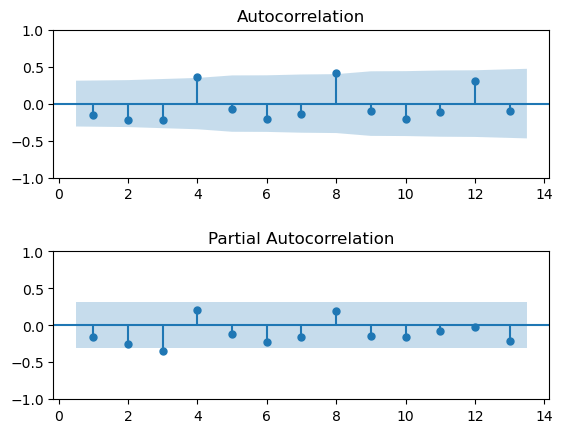

In [98]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Orientation [radians]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Orientation [radians]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### SIXTH variable: **Solidity**

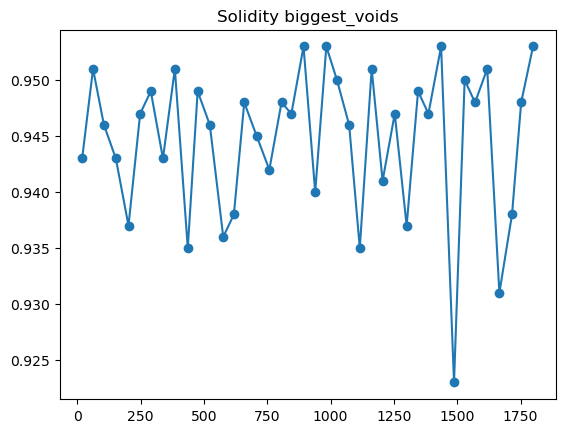

In [99]:
plt.plot(biggest_voids['Solidity'], "o-")
plt.title('Solidity biggest_voids')
plt.show()

In [100]:
_, pval_runs = runstest_1samp(biggest_voids['Solidity'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.146


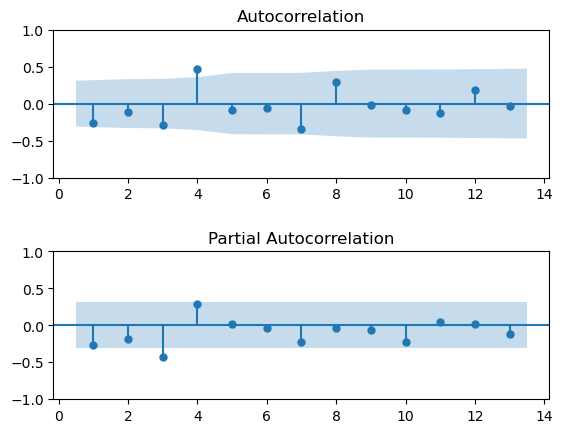

In [101]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Solidity'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Solidity'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### SEVENTH variable: **Extent**

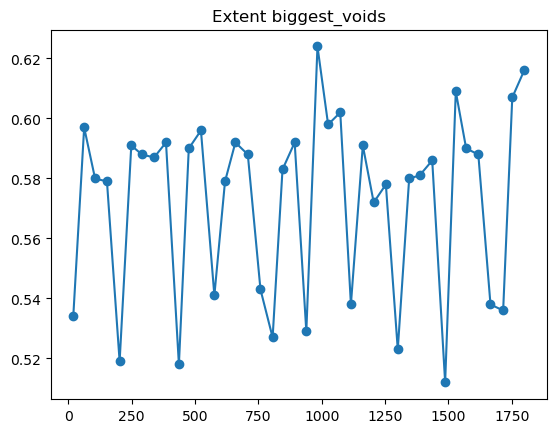

In [102]:
plt.plot(biggest_voids['Extent'], "o-")
plt.title('Extent biggest_voids')
plt.show()

In [103]:
_, pval_runs = runstest_1samp(biggest_voids['Extent'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.206


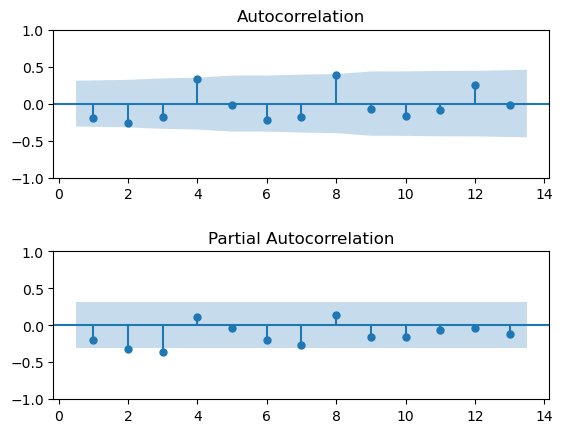

In [104]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Extent'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Extent'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### EIGHTH variable: **Major Axis Length**

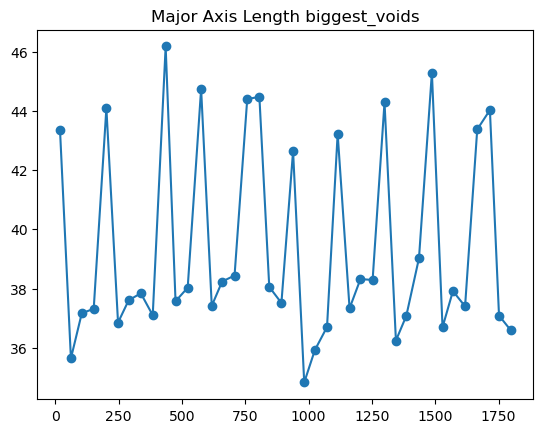

In [105]:
plt.plot(biggest_voids['Major Axis Length [pixels]'], "o-")
plt.title('Major Axis Length biggest_voids')
plt.show()

In [106]:
_, pval_runs = runstest_1samp(biggest_voids['Major Axis Length [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.399


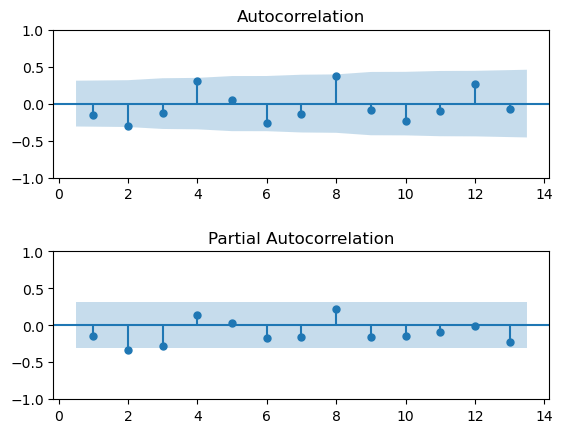

In [107]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Major Axis Length [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Major Axis Length [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

<br>

##### NINTH variable: **Minor Axis Length**

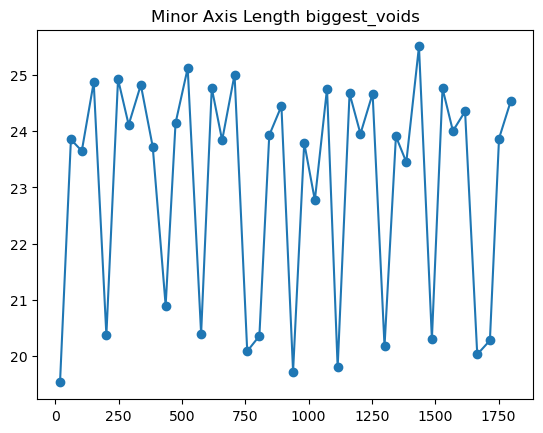

In [108]:
plt.plot(biggest_voids['Minor Axis Length [pixels]'], "o-")
plt.title('Minor Axis Length biggest_voids')
plt.show()

In [109]:
_, pval_runs = runstest_1samp(biggest_voids['Minor Axis Length [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.206


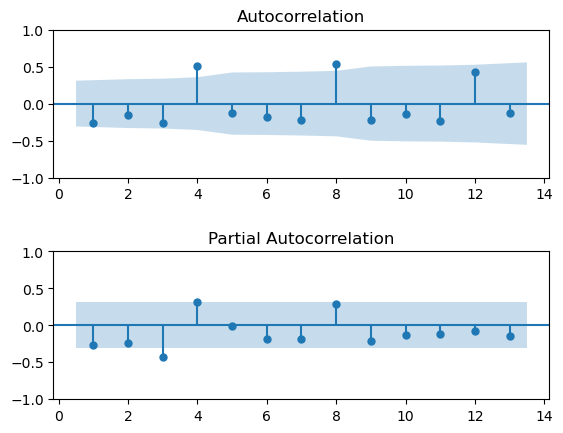

In [110]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(biggest_voids['Minor Axis Length [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(biggest_voids['Minor Axis Length [pixels]'], lags = int(len(biggest_voids)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Given that there are too many non-random variables, **PCA** is *preferred* to potentially address randomness in a reduced dimensionality, similar to the case of the parts.

<br>

### **PCA** - *biggest_voids*

First, the dataframe is "cleaned" by keeping only the numerical values. The **ID** is *eliminated* from the **biggest_voids** dataset because this variable is only a label and does not have a corresponding physical numerical value.

In [111]:
# Taking of the non-numerical variables
biggest_voids_num = biggest_voids.select_dtypes(include=[np.number])

# Dropping of the ID column
biggest_voids_num.drop('ID', axis=1, inplace=True)

biggest_voids_num.head()

c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
19           591.0             111.497         0.893                 -1.110   
62           596.0             102.912         0.743                 -1.357   
105          611.0             106.912         0.771                 -1.333   
152          649.0             109.154         0.746                 -1.358   
202          625.0             115.154         0.887                 -1.174   

     Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
19      0.943   0.534                      43.343                      19.529   
62      0.951   0.597                      35.640                      23.852   
105     0.946   0.580                      37.167                      23.648   
152     0.943   0.579                      37.313                      24.869   
202     0.937   0.519                      44.087                      20.371   

     Equivalent Diameter [pixels]  
19                         27.431  
62                         27.547  
105                        27.892  
152                        28.746  
202                        28.209

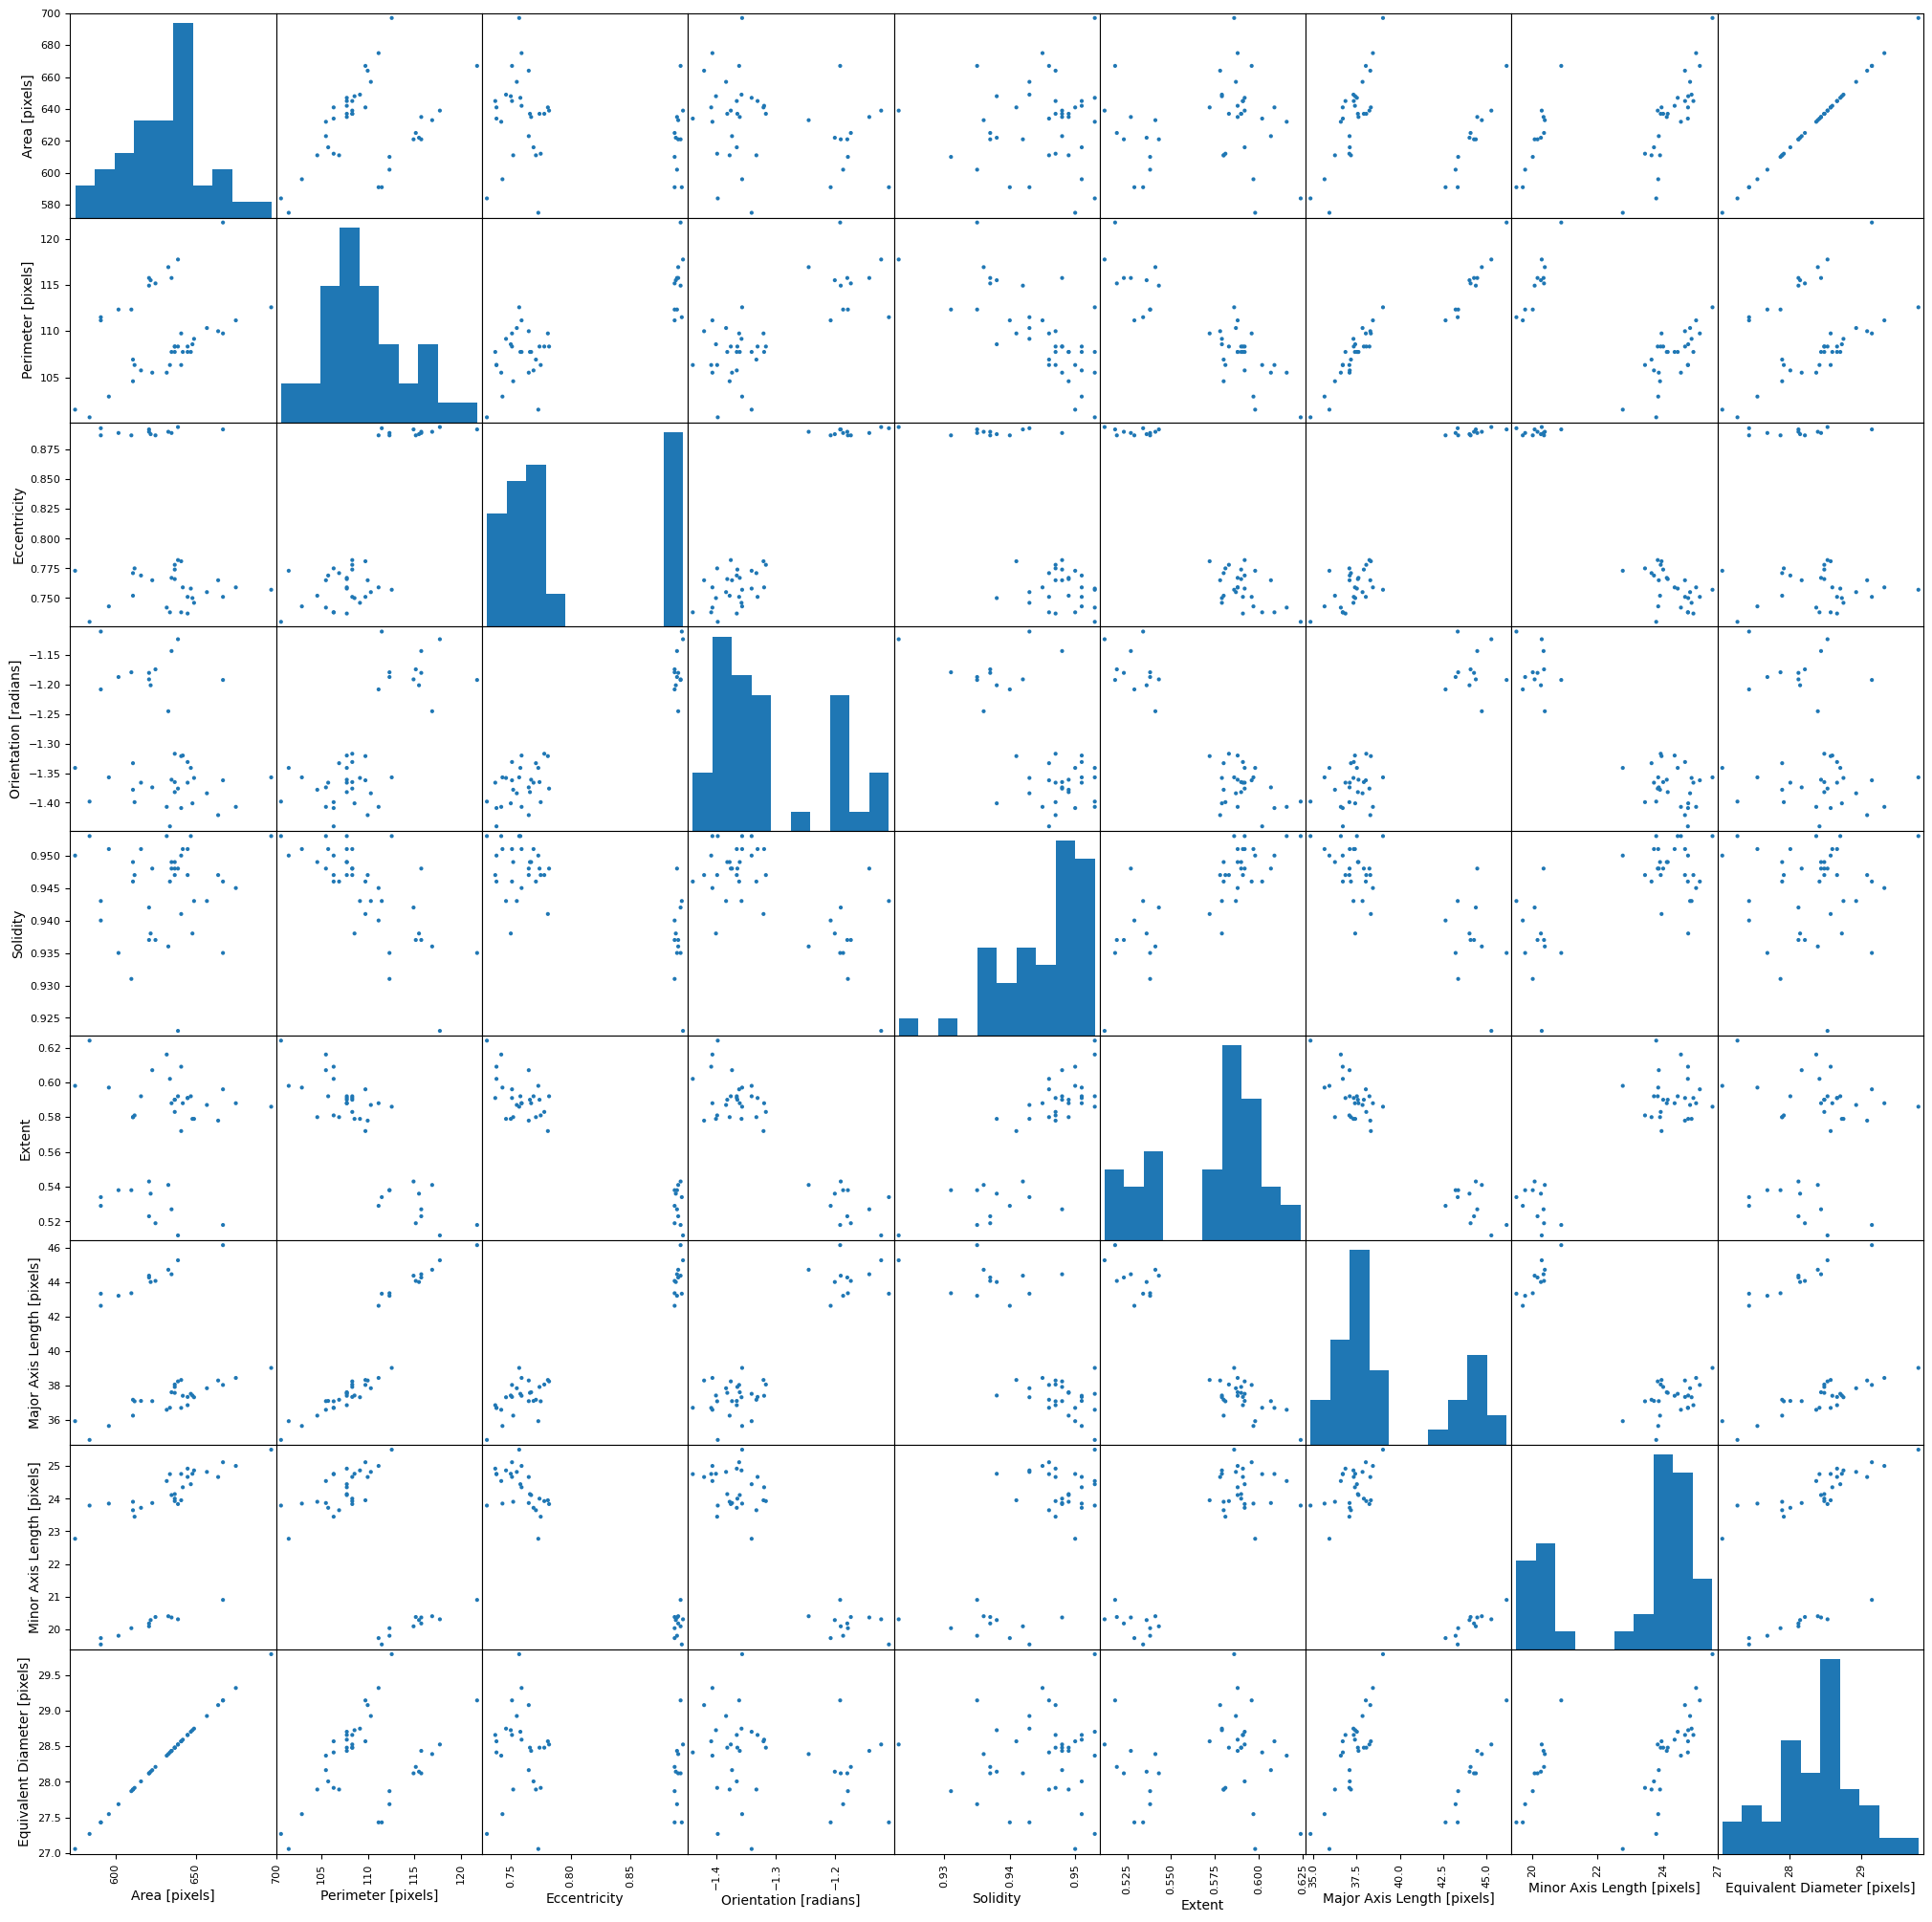

In [112]:
# Creation of the correlation plot of biggest_voids_num
pd.plotting.scatter_matrix(biggest_voids_num, alpha = 1, figsize=(25, 25))
plt.show()

In [113]:
# Computation of the correlation matrix of 'biggest_voids_num'
corr_matrix_bv = biggest_voids_num.corr()
print(corr_matrix_bv)

                              Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                        1.0000              0.3498       -0.2525   
Perimeter [pixels]                   0.3498              1.0000        0.8045   
Eccentricity                        -0.2525              0.8045        1.0000   
Orientation [radians]               -0.2719              0.7438        0.9446   
Solidity                             0.0405             -0.7315       -0.7471   
Extent                               0.1051             -0.8634       -0.9470   
Major Axis Length [pixels]          -0.0172              0.9221        0.9679   
Minor Axis Length [pixels]           0.4776             -0.6438       -0.9689   
Equivalent Diameter [pixels]         0.9999              0.3515       -0.2511   

                              Orientation [radians]  Solidity  Extent  \
Area [pixels]                               -0.2719    0.0405  0.1051   
Perimeter [pixels]                         

In [114]:
# Computation of the variance-covariance matrix of 'biggest_voids_num'
cov_matrix_bv = biggest_voids_num.cov()
print(cov_matrix_bv)

                              Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                      649.4128             40.3104       -0.4005   
Perimeter [pixels]                  40.3104             20.4487        0.2264   
Eccentricity                        -0.4005              0.2264        0.0039   
Orientation [radians]               -0.6609              0.3208        0.0056   
Solidity                             0.0070             -0.0225       -0.0003   
Extent                               0.0821             -0.1197       -0.0018   
Major Axis Length [pixels]          -1.4560             13.8505        0.2001   
Minor Axis Length [pixels]          24.2398             -5.7985       -0.1201   
Equivalent Diameter [pixels]        14.5888              0.9099       -0.0089   

                              Orientation [radians]    Solidity  Extent  \
Area [pixels]                               -0.6609  7.0051e-03  0.0821   
Perimeter [pixels]                     

<br>

Since the *variance* between the values of different variables is *very high*, **standardization** is applied.

<br>

In [115]:
# Standardization of biggest_voids_num by subtracting the mean and dividing by the standard deviation
biggest_voids_num_std = (biggest_voids_num - biggest_voids_num.mean()) / biggest_voids_num.std()

biggest_voids_num_std.describe()

Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
count     4.0000e+01          4.0000e+01    4.0000e+01             4.0000e+01   
mean     -8.9252e-16          2.8810e-15   -9.7700e-16             1.5765e-15   
std       1.0000e+00          1.0000e+00    1.0000e+00             1.0000e+00   
min      -2.2112e+00         -1.9874e+00   -1.0885e+00            -1.3353e+00   
25%      -6.4159e-01         -6.3925e-01   -7.3904e-01            -6.9583e-01   
50%       1.4323e-01         -2.6729e-01   -4.7797e-01            -4.6520e-01   
75%       5.3564e-01          5.9040e-01    1.4339e+00             1.1152e+00   
max       2.5762e+00          2.6722e+00    1.5464e+00             2.1242e+00   

         Solidity      Extent  Major Axis Length [pixels]  \
count  4.0000e+01  4.0000e+01                  4.0000e+01   
mean  -1.8430e-14  4.1689e-15                  1.0242e-15   
std    1.0000e+00  1.0000e+00                  1.0000e+00   
min   -3.1956e+00 -1.9847e+00                 -1.3628e+00   
25%   -5.8168e-01 -1.0633e+00                 -6.8026e-01   
50%    3.3870e-01  3.7999e-01                 -4.4536e-01   
75%    6.7004e-01  6.2461e-01                  1.1731e+00   
max    1.2223e+00  1.6683e+00                  2.0518e+00   

       Minor Axis Length [pixels]  Equivalent Diameter [pixels]  
count                  4.0000e+01                    4.0000e+01  
mean                  -1.9124e-15                   -3.1182e-15  
std                    1.0000e+00                    1.0000e+00  
min                   -1.7695e+00                   -2.2510e+00  
25%                   -1.3377e+00                   -6.3498e-01  
50%                    4.1915e-01                    1.5230e-01  
75%                    8.1067e-01                    5.4180e-01  
max                    1.2316e+00                    2.5207e+00

In [116]:
# Computation of the variance-covariance matrix of 'biggest_voids_num_std' to check that it is equal to the correlation matrix of 'biggest_voids_num'
cov_matrix_bv_std = biggest_voids_num_std.cov()
print(cov_matrix_bv_std)

                              Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                        1.0000              0.3498       -0.2525   
Perimeter [pixels]                   0.3498              1.0000        0.8045   
Eccentricity                        -0.2525              0.8045        1.0000   
Orientation [radians]               -0.2719              0.7438        0.9446   
Solidity                             0.0405             -0.7315       -0.7471   
Extent                               0.1051             -0.8634       -0.9470   
Major Axis Length [pixels]          -0.0172              0.9221        0.9679   
Minor Axis Length [pixels]           0.4776             -0.6438       -0.9689   
Equivalent Diameter [pixels]         0.9999              0.3515       -0.2511   

                              Orientation [radians]  Solidity  Extent  \
Area [pixels]                               -0.2719    0.0405  0.1051   
Perimeter [pixels]                         

In [117]:
# Applying the PCA on the variance-covariance matrix of 'biggest_voids_num_std'

pca_bv = PCA()
pca_bv.fit(biggest_voids_num_std)

print("Eigenvalues \n", pca_bv.explained_variance_)
print("\nEigenvectors \n", pca_bv.components_)
print("\nExplained variance ratio \n", pca_bv.explained_variance_ratio_)
print("\nCumulative explained variance ratio \n", np.cumsum(pca_bv.explained_variance_ratio_))

Eigenvalues 
 [6.1331 2.3599 0.3621 0.0816 0.0489 0.0112 0.0027 0.0004 0.0001]

Eigenvectors 
 [[-0.0798  0.3394  0.3988  0.3845 -0.3311 -0.3935  0.3936 -0.3819 -0.0791]
 [-0.6371 -0.3438  0.0408  0.0632  0.0954  0.0591 -0.1144 -0.1955 -0.6375]
 [ 0.0689  0.0991  0.1601  0.2687  0.9161  0.0046  0.1614 -0.1346  0.0643]
 [-0.0547  0.2223  0.3    -0.7811  0.0655  0.2696  0.2904 -0.2887 -0.0522]
 [-0.0693  0.0693 -0.0844 -0.3987  0.1899 -0.856  -0.1882  0.124  -0.0682]
 [-0.2539  0.7781 -0.4381  0.0653  0.0389  0.1535  0.0154  0.2264 -0.2395]
 [-0.0576  0.256   0.6959  0.048  -0.0092  0.1071 -0.5675  0.3322 -0.0226]
 [-0.1005 -0.177   0.2004 -0.0156  0.007  -0.0333  0.6026  0.7331 -0.1278]
 [ 0.7052  0.018   0.009  -0.0003 -0.0029  0.0045 -0.0255 -0.0038 -0.7083]]

Explained variance ratio 
 [0.6815 0.2622 0.0402 0.0091 0.0054 0.0012 0.0003 0.     0.    ]

Cumulative explained variance ratio 
 [0.6815 0.9437 0.9839 0.993  0.9984 0.9996 0.9999 1.     1.    ]


In [118]:
scores_bv = pca_bv.transform(biggest_voids_num_std)
# creation of a DataFrame with the scores
scores_df_bv = pd.DataFrame(scores_bv, columns = ['z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9'])

scores_df_bv.head()

z1      z2      z3      z4      z5      z6      z7      z8      z9
0  3.5481  2.1950  0.8409 -0.4380 -0.1372 -0.0160 -0.0040  0.0319  0.0081
1 -2.0251  2.4063  0.0199 -0.2506  0.1100  0.1119 -0.0611  0.0132  0.0044
2 -0.8614  1.2417 -0.2626 -0.2139  0.1867  0.1959  0.0955  0.0220  0.0009
3 -1.2488 -1.0315 -0.6297 -0.3809  0.1660  0.1218 -0.0101 -0.0088 -0.0010
4  3.7239 -0.0671  0.0723 -0.1539  0.2705 -0.0629 -0.0347  0.0272 -0.0066

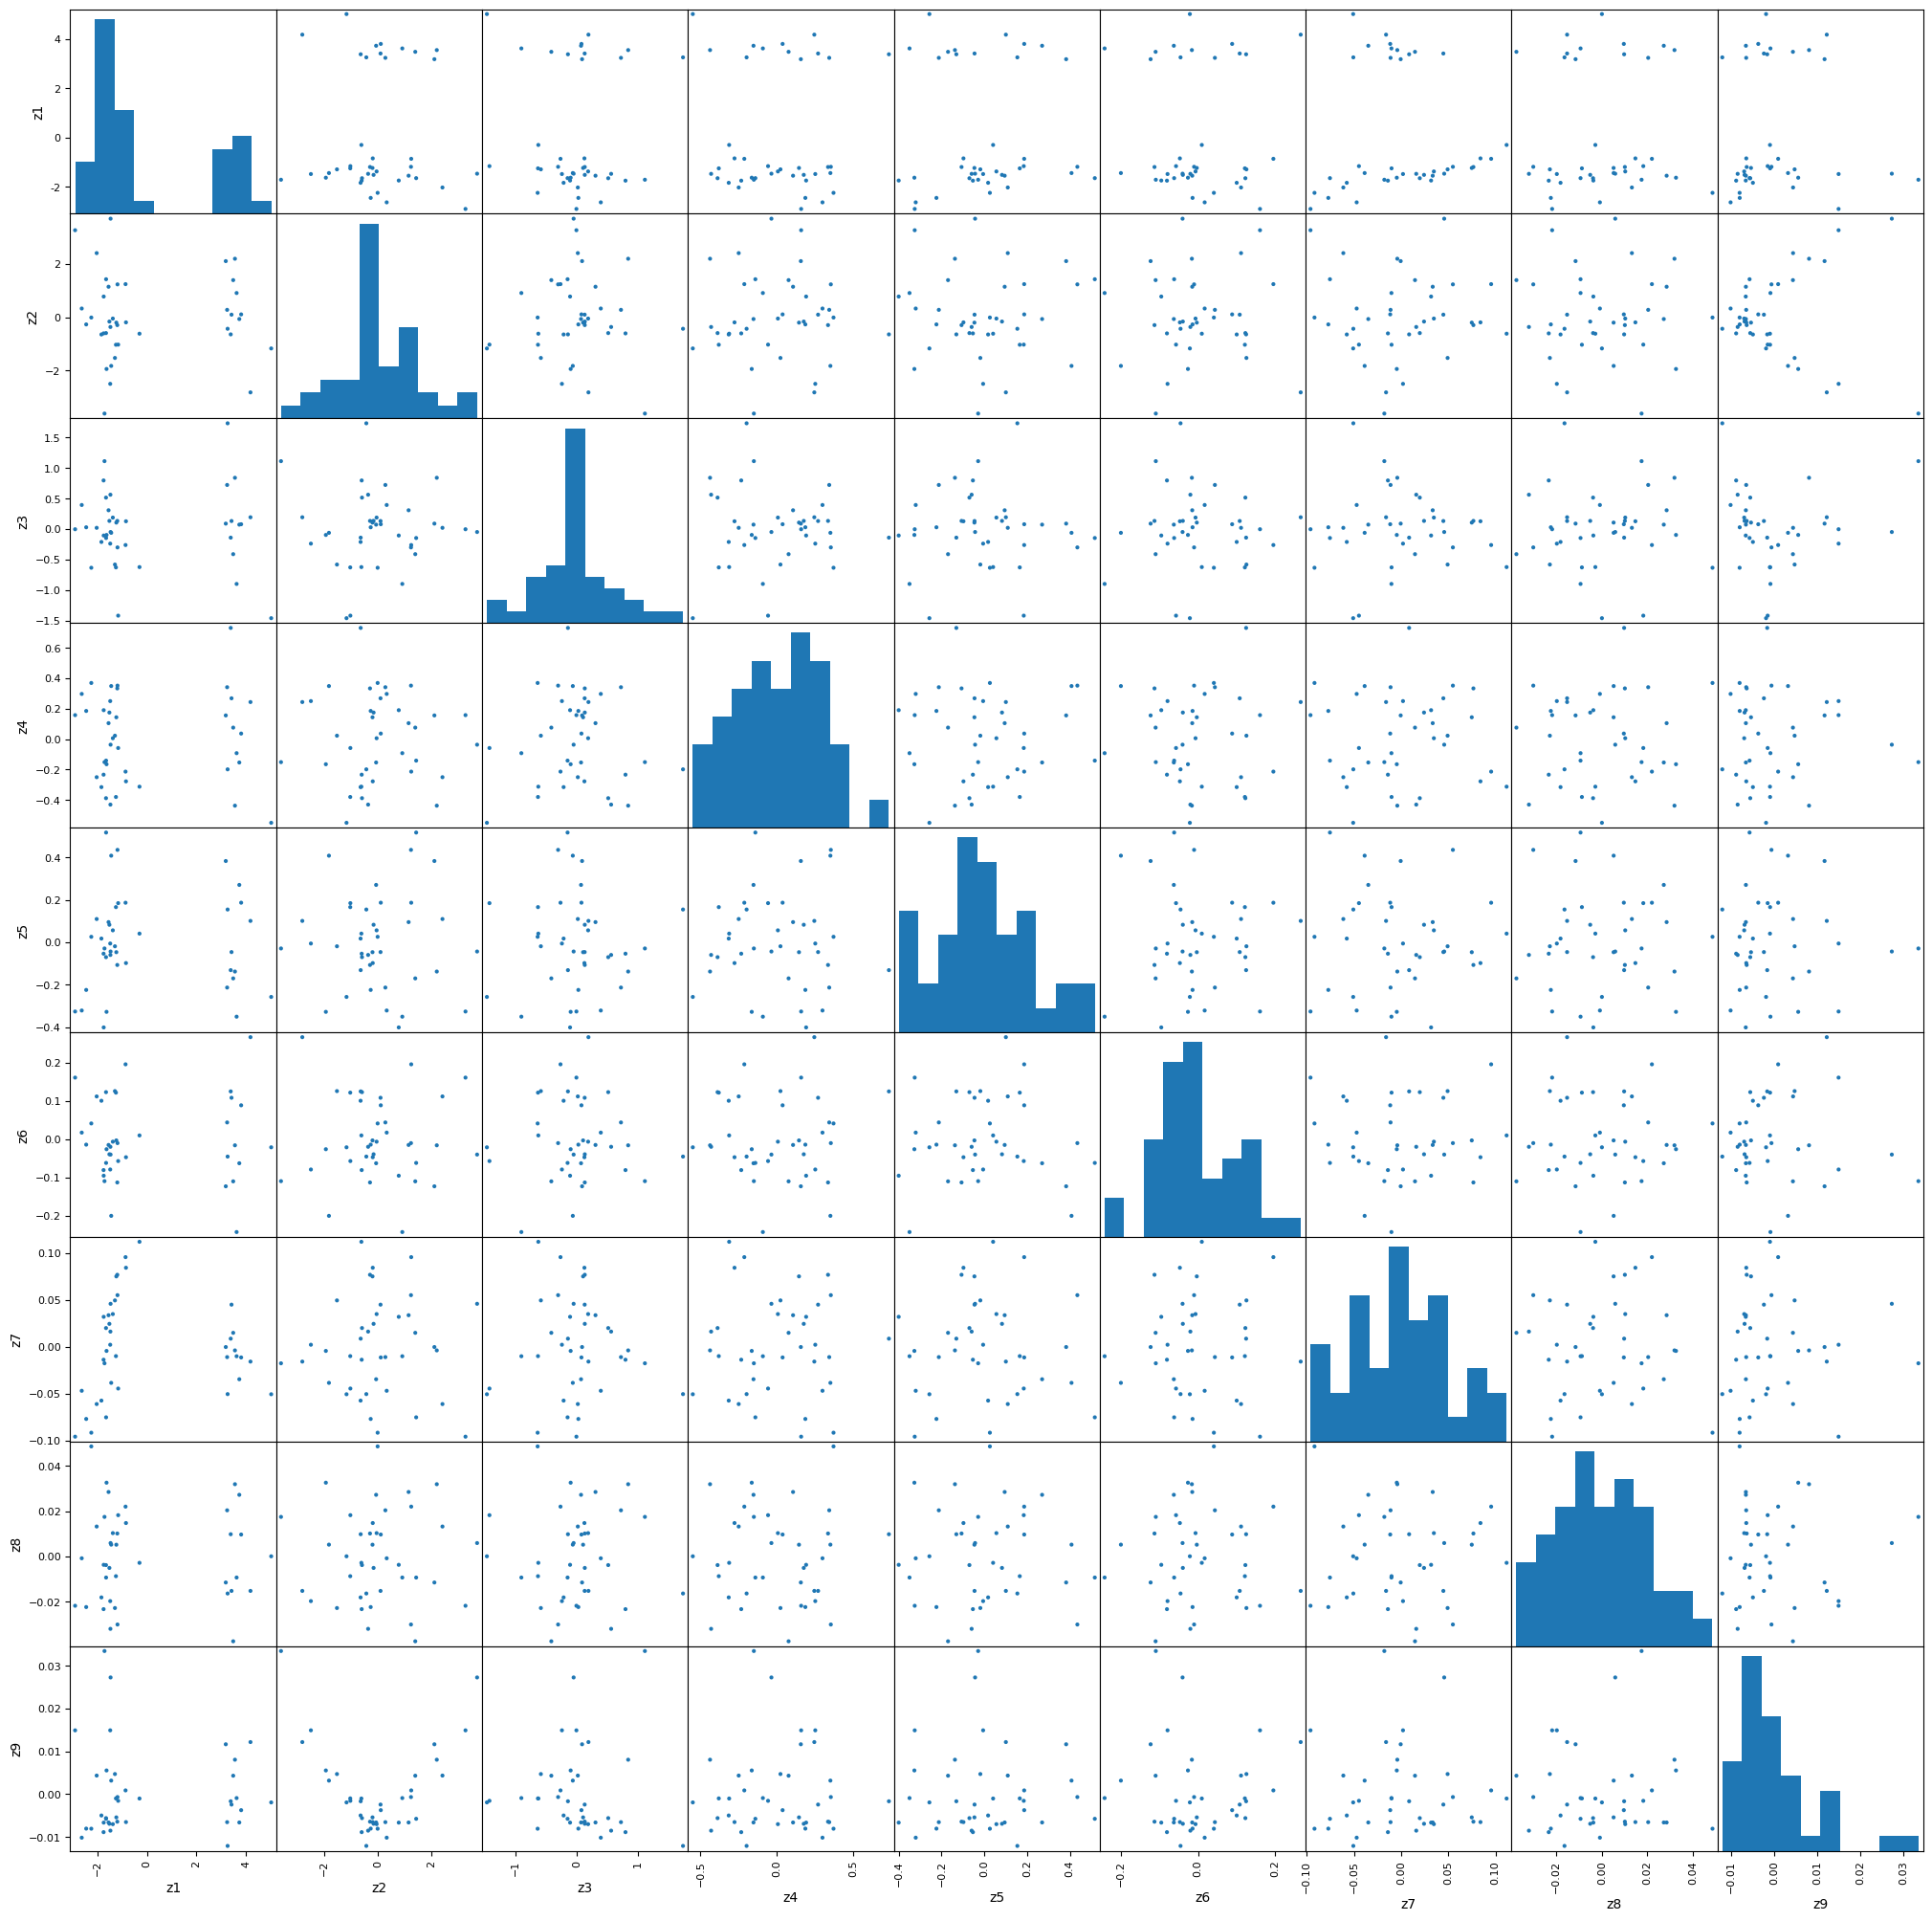

In [119]:
# Plotting of the scores in a scatter plot
pd.plotting.scatter_matrix(scores_df_bv, alpha = 1, figsize=(25, 25))
plt.show()

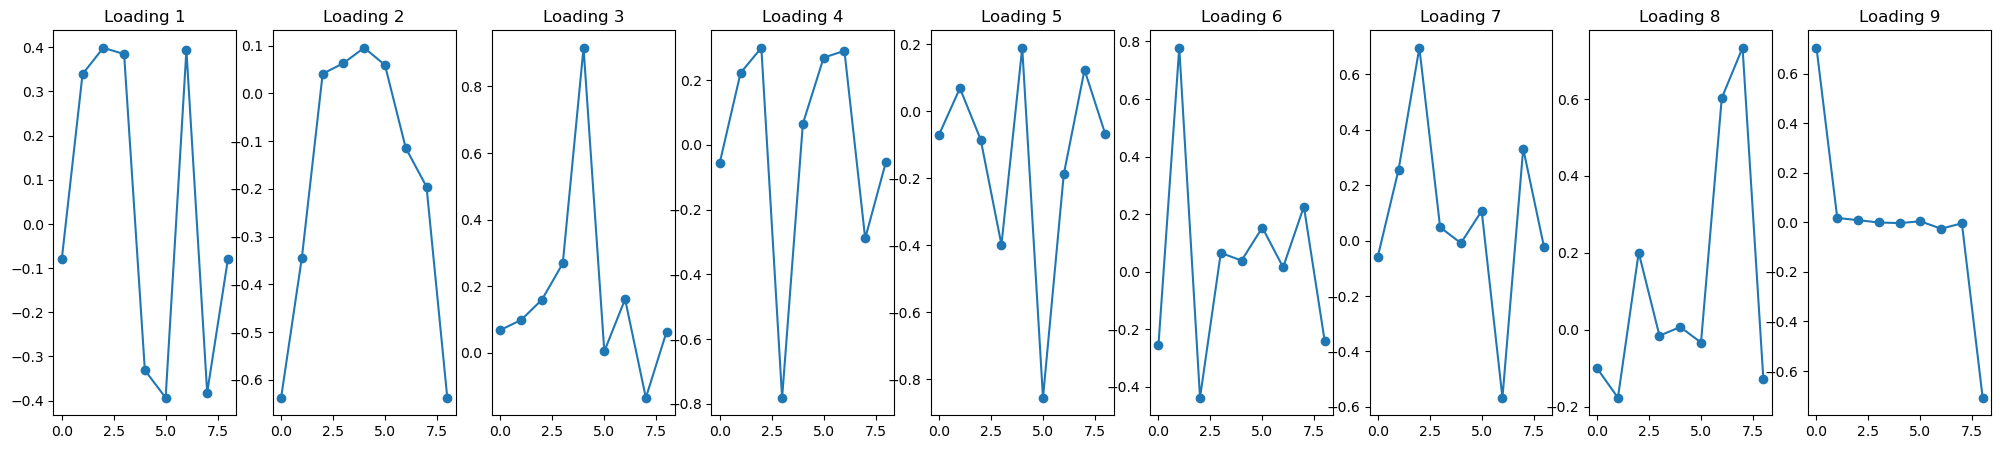

In [120]:
# Plotting of the loadings
fig, ax = plt.subplots(1, 9, figsize = (25, 5))
ax[0].plot(pca_bv.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca_bv.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca_bv.components_[2], 'o-')
ax[2].set_title('Loading 3')
ax[3].plot(pca_bv.components_[3], 'o-')
ax[3].set_title('Loading 4')
ax[4].plot(pca_bv.components_[4], 'o-')
ax[4].set_title('Loading 5')
ax[5].plot(pca_bv.components_[5], 'o-')
ax[5].set_title('Loading 6')
ax[6].plot(pca_bv.components_[6], 'o-')
ax[6].set_title('Loading 7')
ax[7].plot(pca_bv.components_[7], 'o-')
ax[7].set_title('Loading 8')
ax[8].plot(pca_bv.components_[8], 'o-')
ax[8].set_title('Loading 9')
plt.show()

Since the chosen threshold is *85%* (assumption 6), only the first **2 PCs** are taken.

<br>

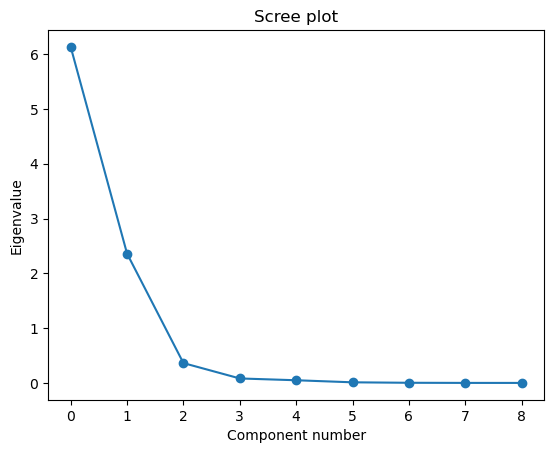

In [121]:
# Scree plot
plt.plot(pca_bv.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

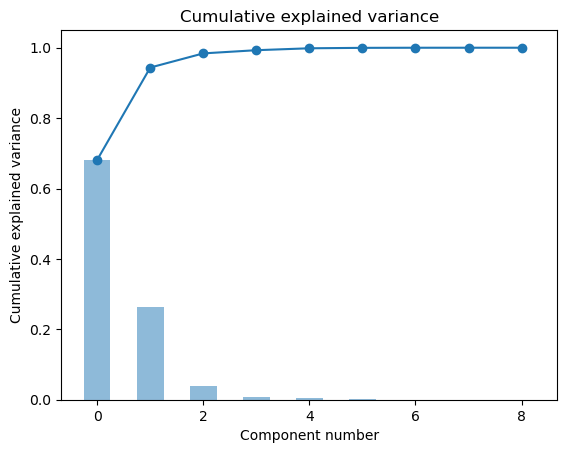

In [122]:
# Plotting of the cumulative explained variance
plt.plot(np.cumsum(pca_bv.explained_variance_ratio_), 'o-')
plt.bar(range(0, len(pca_bv.explained_variance_ratio_)), pca_bv.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')

plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.show()

<br>

### **PCs Analysis** - *biggest_voids*

<br>

- ### z1

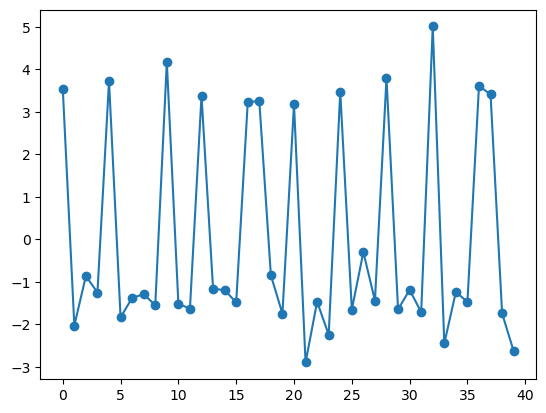

In [123]:
plt.plot(scores_df_bv['z1'], 'o-')
plt.show()

Observing the plot, there seems to be *seasonality*.

<br>

In [124]:
# runs testing to check the randomness

_, pval_runs = runstest_1samp(scores_df_bv['z1'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.399


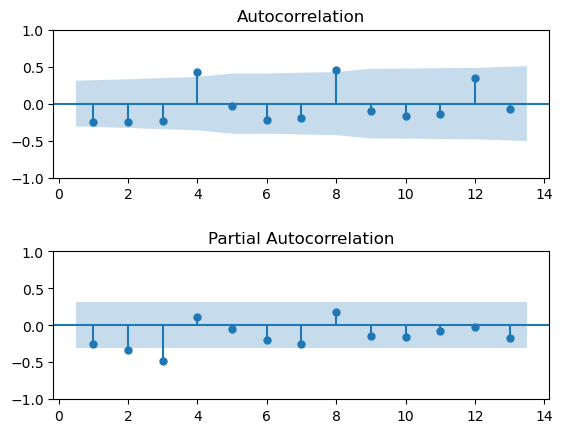

In [125]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(scores_df_bv['z1'], lags = int(len(scores_df_bv)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(scores_df_bv['z1'], lags = int(len(scores_df_bv)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Based on the tests, the assumption of independence is *rejected*.

Here, the same *approach* used for *z2* (the second PC of the parts) is *applied* to adress the issue of seasonality.

<br>

In [126]:
# Creation of 2 additional variables: 'Position' and 'Image'
scores_df_bv['Position'] = np.tile(np.arange(1, 5), int(len(scores_df_bv)/4))
scores_df_bv['Image'] = np.repeat(np.arange(1, len(scores_df_bv)/4+1), 4)

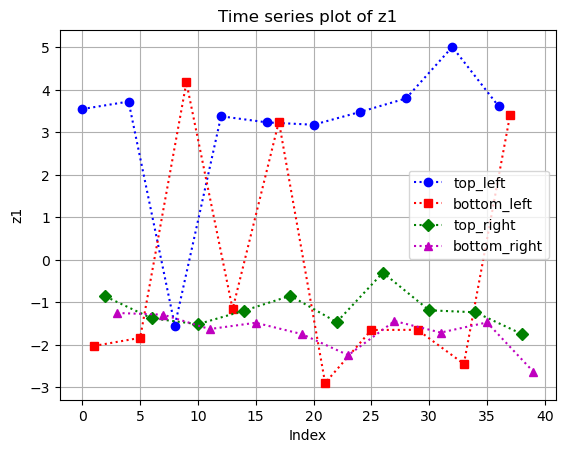

In [127]:
# Plotting of the data of 'scores_df_bv' as 4 separate batches

plt.plot(scores_df_bv['z1'][scores_df_bv['Position'] == 1], 'o:b', label = 'top_left') 
plt.plot(scores_df_bv['z1'][scores_df_bv['Position'] == 2], 's:r', label = 'bottom_left')
plt.plot(scores_df_bv['z1'][scores_df_bv['Position'] == 3], 'D:g', label = 'top_right')
plt.plot(scores_df_bv['z1'][scores_df_bv['Position'] == 4], '^:m', label = 'bottom_right')

plt.xlabel('Index')
plt.ylabel('z1')
plt.legend()
plt.title('Time series plot of z1')
plt.grid()
plt.show()

The specific behaviours observed for top_left and bottom_left raise doubts about the effectiveness of this approach.

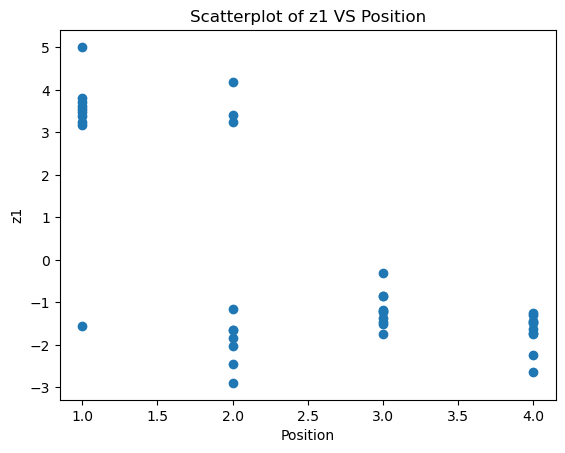

In [128]:
# Additional graph: Scatterplot of z2 VS 'Position'
plt.scatter(scores_df_bv['Position'], scores_df_bv['z1'])
plt.xlabel('Position')
plt.ylabel('z1')
plt.title('Scatterplot of z1 VS Position')
plt.show()

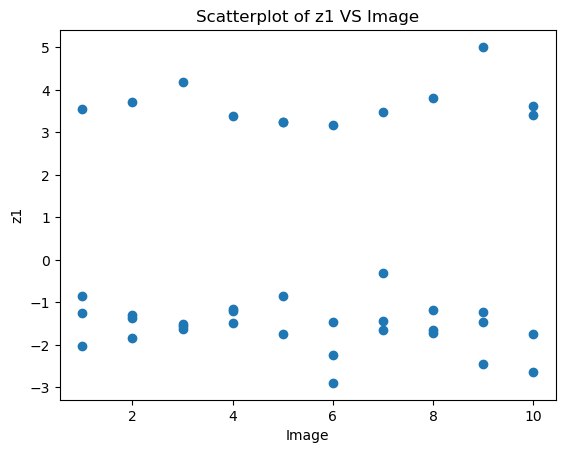

In [129]:
# Additional graph: Scatterplot of z2 VS 'Image'
plt.scatter(scores_df_bv['Image'], scores_df_bv['z1'])
plt.xlabel('Image')
plt.ylabel('z1')
plt.title('Scatterplot of z1 VS Image')
plt.show()

In [130]:
# Creation of a dummy variable 
scores_df_bv['Dummy'] = np.tile(np.array([1, 0, 0, 0]), int(len(scores_df_bv)/4))

In [131]:
# Computation of a model with a dummy
x = scores_df_bv['Dummy']
x = sm.add_constant(scores_df_bv['Dummy']) 
y = scores_df_bv['z1']
model_bv_z1 = sm.OLS(y, x).fit()

qda.summary(model_bv_z1)

REGRESSION EQUATION
-------------------
z1 =  -1.047 const + 4.189 Dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const -1.0472   0.3072  -3.4085 1.5591e-03
Dummy  4.1887   0.6145   6.8169 4.3546e-08

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.6827 0.5501     0.5383

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS   Adj MS  F-Value    P-Value
Regression  1.0 131.5884 131.5884  46.4707 4.3546e-08
     const  1.0  32.8971  32.8971  11.6177 1.5591e-03
     Dummy  1.0 131.5884 131.5884  46.4707 4.3546e-08
     Error 38.0 107.6025   2.8316      NaN        NaN
     Total 39.0 239.1910      NaN      NaN        NaN


<br>

The p-values of both variables are lower than alpha, meaning they are significant; hence, they are **retained** in the model.

To address independence and normality, the *residuals are then checked*.

<br>

Runs test p-value on the residuals = 0.146


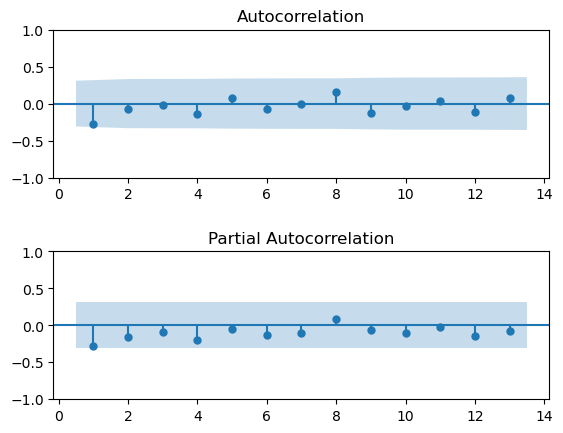

In [132]:
_, pval_runs_res = runstest_1samp(model_bv_z1.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model_bv_z1.resid, lags = int(len(scores_df_bv)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model_bv_z1.resid, lags = int(len(scores_df_bv)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

Shapiro-Wilk test p-value on the residuals = 0.000


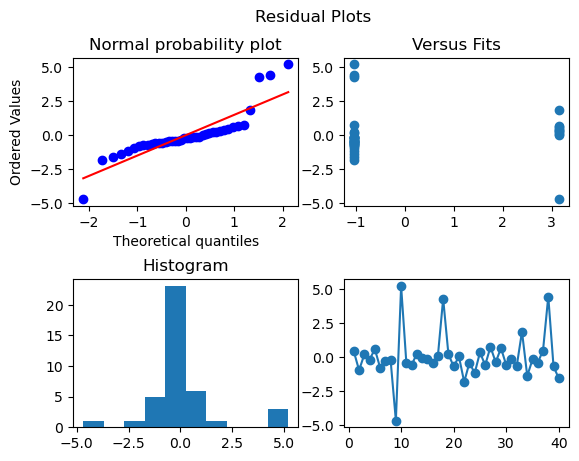

In [133]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model_bv_z1.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model_bv_z1.fittedvalues, model_bv_z1.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model_bv_z1.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model_bv_z1.resid)+1), model_bv_z1.resid, 'o-')
_, pval_SW_res = stats.shapiro(model_bv_z1.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

The tests above demonstrate the inadequacy of the tried model.

Due to the strange pattern of the bottom_left parts, the idea of implementing *another dummy* variable was considered, but this could have led to **overfitting**, given that there are only 4 positions and one was already being modeled with a dummy. These problems are likely due to *seasonality*. Therefore, *eliminating the variables that caused this seasonality was also thought of*, but it was noticed that 6 out of 9 variables would need to be removed, making *PCA useless*. Consequently, the explained approach was **abandoned**, and the focus shifted to variables found to be significant for identifying potential errors and that did not exhibit seasonality, while also considering their correlation with other variables.

**Area** and **Perimeter** were *selected*, and **normality analysis** is hence conducted.

<br>

##### FIRST variable: **Area**

p-value for Shapiro-Wilk test for the Area is: 0.754


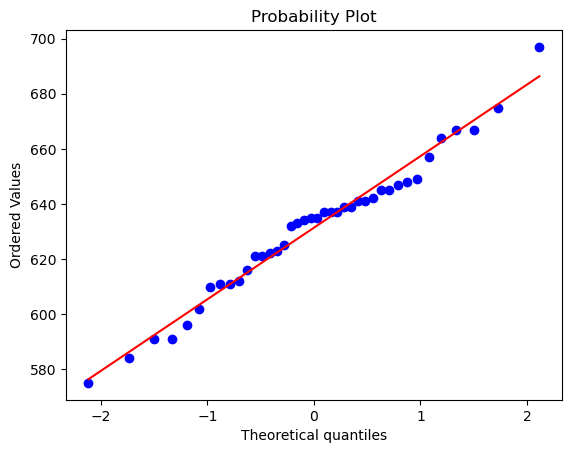

In [134]:
_, p_value = stats.shapiro(biggest_voids_num['Area [pixels]'])
print('p-value for Shapiro-Wilk test for the Area is: %.3f' % p_value)

stats.probplot(biggest_voids_num['Area [pixels]'], dist='norm', plot=plt)
plt.show()

Normality is NOT rejected.

<br>

##### SECOND variable: **Perimeter**

p-value for Shapiro-Wilk test for the Perimeter is: 0.370


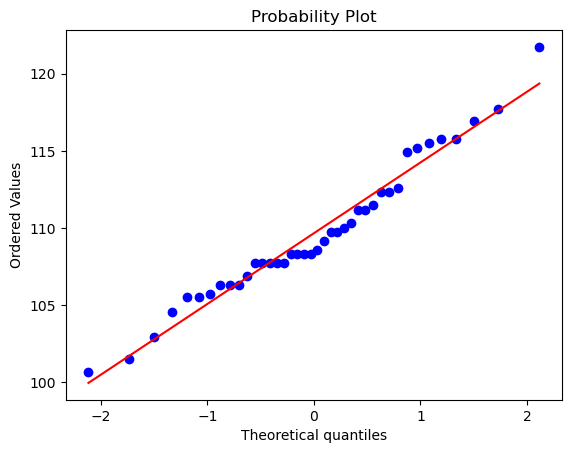

In [135]:
_, p_value = stats.shapiro(biggest_voids_num['Perimeter [pixels]'])
print('p-value for Shapiro-Wilk test for the Perimeter is: %.3f' % p_value)

stats.probplot(biggest_voids_num['Perimeter [pixels]'], dist='norm', plot=plt)
plt.show()

Normality is NOT rejected.

<br>

## <span style="color:orange"> Results

## Multivariate Control Charts

**Multivariate control charts** were chosen over *multiple univariate control charts* for several key reasons:

- <u>Interrelationship Between Variables</u>: Multivariate control charts account for the relationships between variables, which univariate charts ignore, preventing the loss of information that occurs when variables are analyzed separately. By considering the combined variability and covariance of all variables, multivariate charts provide a more comprehensive monitoring solution than univariate charts.

- <u>Handling Errors</u>: Using multiple univariate charts increases the overall false alarm rate due to the accumulation of Type I errors. Even if this issue can be corrected through the Bonferroni correction, which univariate charts require to control the family-wise error rate, it increases Type II errors and reduces detection power. Multivariate control charts make the monitoring process more reliable by maintaining a controlled overall error rate and avoiding the issues associated with the Bonferroni correction, as they directly account for the joint distribution of variables.


**Note**: According to literature, Tracy, Young, and Mason (1992), point out that if the sample size is equal to 1, the Phase 1 UCL should be based on a beta distribution. Approximations to the Phase I limits based on the F and chi-square distributions are likely to be inaccurate.

<br>

### **CC** - *parts*

- residuals of **z1** model
- residuals of **z2** model
- **z3**

<br>

In [136]:
b = 2 # Bonferroni

<span style="color:red"> This correction has been added with the submission of the second phase, following a clerical error in which the Bonferroni adjustment was not applied.

<br>

In [137]:
alpha = 0.0027/b                   # significance level
n = 1                            # sample size
m = len(model_parts_z1.resid)    # number of samples
p = 3                            # number of variables

In [138]:
residuals_z1 = model_parts_z1.resid
residuals_z2 = model_parts_z2.resid

selected_variables_1 = pd.DataFrame()
selected_variables_1['residuals_z1'] = residuals_z1
selected_variables_1['residuals_z2'] = residuals_z2
selected_variables_1['z3'] = scores_df_parts['z3']

# Create the V matrix
V = selected_variables_1.diff().dropna()

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1)

# Display the short range estimator
print("The short range estimator is: \n", S2)

The short range estimator is: 
               residuals_z1  residuals_z2      z3
residuals_z1        2.8619       -0.4735 -0.2681
residuals_z2       -0.4735        0.6710  0.3302
z3                 -0.2681        0.3302  1.0630


<br>

Applying an AR(1) model to PC z1 resulted in a vector containing **39 values**, one less than the original data. Consequently, to ensure consistent column lengths within the "selected_variables_1" dataframe, the first value from both the "model_parts_z2.resid" vector and the "scores_df_parts['z3']" vector needed to be dropped.

However, upon reviewing the newly created dataframe, it was observed that this *adjustment occurred automatically*, without requiring further intervention.

<br>

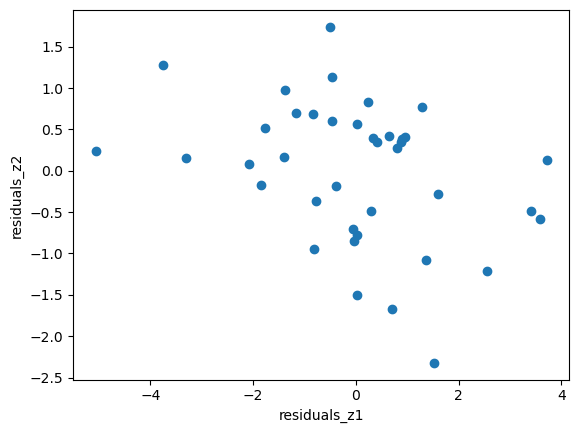

In [139]:
# Plot residuals z1 vs residuals z2
plt.scatter(selected_variables_1['residuals_z1'], selected_variables_1['residuals_z2'])
plt.xlabel('residuals_z1')
plt.ylabel('residuals_z2')
plt.show()

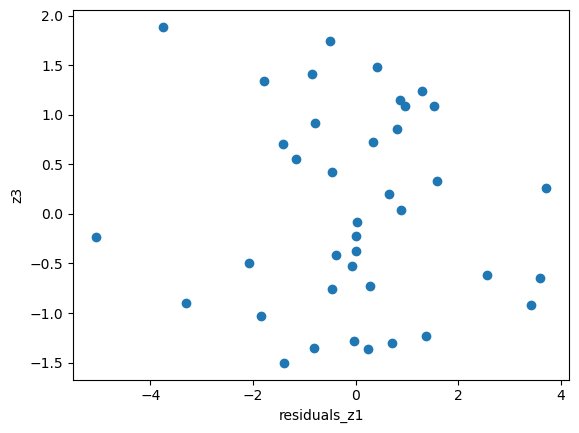

In [140]:
# Plot residuals z1 vs z3
plt.scatter(selected_variables_1['residuals_z1'], selected_variables_1['z3'])
plt.xlabel('residuals_z1')
plt.ylabel('z3')
plt.show()

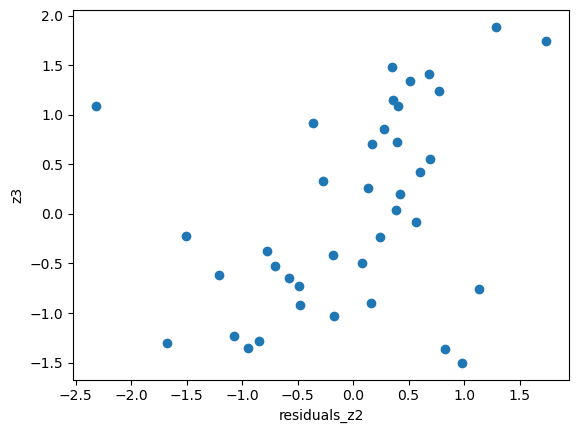

In [141]:
# Plot residuals z2 vs z3
plt.scatter(selected_variables_1['residuals_z2'], selected_variables_1['z3'])
plt.xlabel('residuals_z2')
plt.ylabel('z3')
plt.show()

It can be observed that the variables do not exhibit strong correlations with each other. This is because, through PCA, orthogonal vectors are obtained. This indicates that the new components are linearly independent and capture the main variations in the data in perpendicular directions.

Even when the data exhibits independence, it is better to use multivariate correlation coefficients. Indeed, in scenarios of perfect independence among variables, the ellipsoid representing the data simplifies into a sphere, indicating that the variances are equal in all directions. However, there are still discrepancies when comparing this spherical representation to the cube, which represents the combination of multiple univariate correlation coefficients. The sphere provides a more accurate depiction of the overall data relationships, especially because we are using more than two variables (three in this case), highlighting the importance of considering multivariate correlations even in the presence of independent variables.

Moreover, in the scatter plots above, traces of correlation can be identified, particularly in the first and third plots. This can be explained by the fact that further processing was conducted on the variables after the PCA. If the scatter plot analysis had been conducted immediately after the PCA, these behaviors would not have been detected, as the variables would have been perfectly independent.

<br>

In [142]:
# Calculate the Xbar from the data
Xbar = selected_variables_1.mean()

S2_inv = np.linalg.inv(S2)

# Calculate the Hotelling T2 statistic
data_CC_1 = selected_variables_1.copy()
data_CC_1['T2'] = np.nan
for i in range(m):
    data_CC_1['T2'].iloc[i] = n * (selected_variables_1.iloc[i] - Xbar).transpose().dot(S2_inv).dot(selected_variables_1.iloc[i] - Xbar)

# Now we can add the UCL, CL and LCL to the dataframe
data_CC_1['T2_UCL'] = ((m-1)**2)/m*stats.beta.ppf(1 - alpha, p/2, (m-p-1)/2)
data_CC_1['T2_CL'] = data_CC_1['T2'].median()
data_CC_1['T2_LCL'] = 0

# Add one column to test if the sample is out of control
data_CC_1['T2_TEST'] = np.where((data_CC_1['T2'] > data_CC_1['T2_UCL']), data_CC_1['T2'], np.nan)

# Inspect the dataset
data_CC_1.head()

residuals_z1  residuals_z2      z3      T2   T2_UCL   T2_CL  T2_LCL  \
1        1.5910       -0.2753  0.3298  1.1296  13.1939  2.1791       0   
2        0.6469        0.4244  0.2007  0.6641  13.1939  2.1791       0   
3       -0.5027        1.7418  1.7427  5.6155  13.1939  2.1791       0   
4       -1.4086        0.1671  0.7090  1.0285  13.1939  2.1791       0   
5       -0.7836       -0.3627  0.9159  1.7793  13.1939  2.1791       0   

   T2_TEST  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN

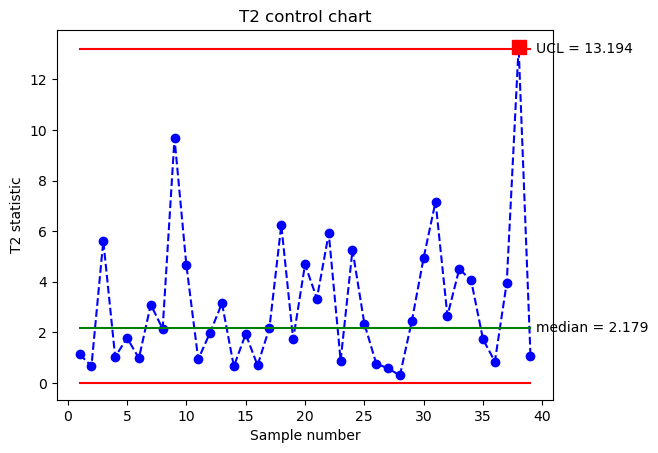

In [143]:
# Plot the T2 control chart
plt.title('T2 control chart')
plt.plot(data_CC_1['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_1['T2_UCL'], color='r')
plt.plot(data_CC_1['T2_CL'], color='g')
plt.plot(data_CC_1['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_1)+.5, data_CC_1['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC_1['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_1)+.5, data_CC_1['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC_1['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC_1['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

A first glance at the chart highlights the typical right-skewed behavior of the T² distribution. This arises from the characteristic quadratic form of the statistic, producing a distribution with a long right tail. Therefore, this behavior does not represent a cause for concern.
The chart reflects the actual in-control state of the process, with the exception of one observation that exceeds the UCL, triggering an alarm. Consequently, a search for an assignable cause was conducted. Given that all the pieces used are, by design, free of defects, the image processing phase was examined to ensure it could not be an assignable cause. This examination concluded that the alarm was not attributable to a specific cause, thus it is considered a false alarm and the chart can be considered properly designed.

<br><br>

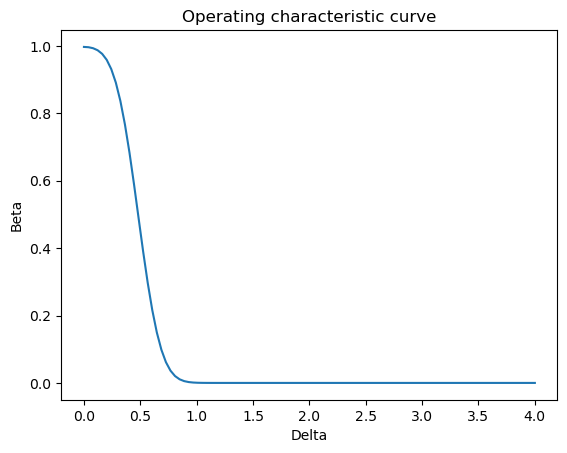

In [144]:
# Define a range of values for beta
delta = np.linspace(0, 4, 100)
# Compute the corresponding beta values
beta = stats.norm.cdf(3 - delta*np.sqrt(m)) - stats.norm.cdf(-3 - delta*np.sqrt(m))

# Plot the beta values
plt.plot(delta, beta)
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

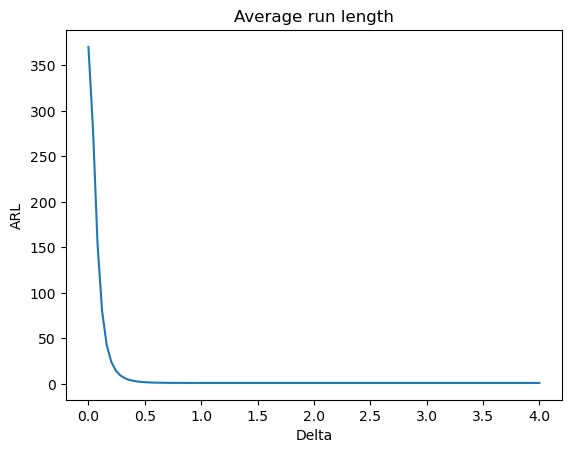

In [145]:
# Compute ARL using the previous values of beta
ARL = 1/(1-beta)

# Plot the ARL values
plt.plot(delta, ARL)
plt.xlabel('Delta')
plt.ylabel('ARL')
plt.title('Average run length')
plt.show()

<br>

### **CC** - *biggest_voids*

- **Area**
- **Perimeter**

<br>

In [146]:
alpha = 0.0027/b # significance level
n = 1            # sample size
m = len(biggest_voids)  # number of samples
p = 2          # number of variables

In [147]:
selected_variables_2 = biggest_voids[["Area [pixels]" , "Perimeter [pixels]"]]
# Create the V matrix
V = selected_variables_2.diff().dropna()

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1)

# Display the short range estimator
print("The short range estimator is: \n", S2)

The short range estimator is: 
                     Area [pixels]  Perimeter [pixels]
Area [pixels]            503.9615              7.8677
Perimeter [pixels]         7.8677             20.0094


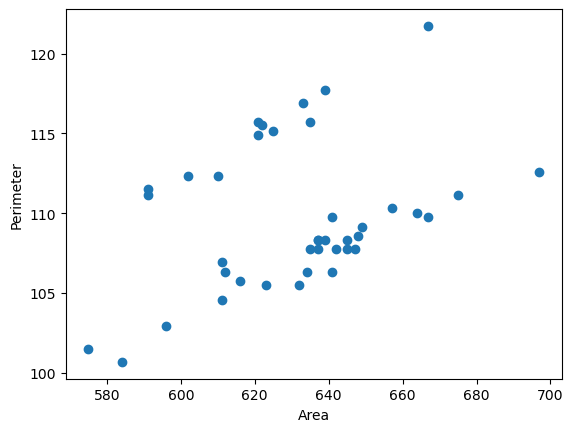

In [148]:
# Plot the data
plt.scatter(biggest_voids["Area [pixels]"], biggest_voids[ "Perimeter [pixels]"])
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

Despite already being present in the scatter matrix, the graph was plotted again for a closer look. It was observed that the variables are postive correlated, thus strengthening the choice of opting for a multivariate control chart.

Moreover, some anomalous behavior was noticed. To study this in more detail, the same graph was plotted, taking into account the position of each piece.

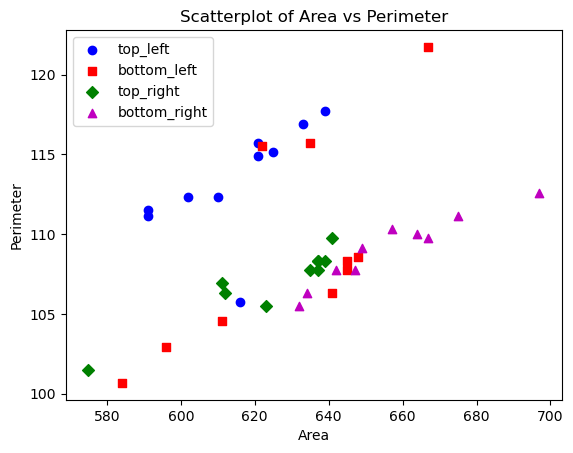

In [149]:
plt.scatter(biggest_voids["Area [pixels]"][biggest_voids['Position'] == 'top_left'], biggest_voids["Perimeter [pixels]"][biggest_voids['Position'] == 'top_left'], marker='o', color='b', label='top_left')
plt.scatter(biggest_voids["Area [pixels]"][biggest_voids['Position'] == 'bottom_left'], biggest_voids["Perimeter [pixels]"][biggest_voids['Position'] == 'bottom_left'], marker='s', color='r', label='bottom_left')
plt.scatter(biggest_voids["Area [pixels]"][biggest_voids['Position'] == 'top_right'], biggest_voids["Perimeter [pixels]"][biggest_voids['Position'] == 'top_right'], marker='D', color='g', label='top_right')
plt.scatter(biggest_voids["Area [pixels]"][biggest_voids['Position'] == 'bottom_right'], biggest_voids["Perimeter [pixels]"][biggest_voids['Position'] == 'bottom_right'], marker='^', color='m', label='bottom_right')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatterplot of Area vs Perimeter')
plt.legend()
plt.show()

It can be noted that there is a behavior similar to what was observed for z1 of the "biggest_voids". In particular, a **deviation** is observed in most values related to the top_left variable and in three values related to the bottom_left variable.

<br>

In [150]:
# Calculate the Xbar from the data
Xbar = selected_variables_2.mean()

S2_inv = np.linalg.inv(S2)

# Calculate the Hotelling T2 statistic
data_CC_2 = selected_variables_2.copy()
data_CC_2['T2'] = np.nan
for i in range(m):
    data_CC_2['T2'].iloc[i] = n * (selected_variables_2.iloc[i] - Xbar).transpose().dot(S2_inv).dot(selected_variables_2.iloc[i] - Xbar)

# Now we can add the UCL, CL and LCL to the dataframe
data_CC_2['T2_UCL'] = ((m-1)**2)/m*stats.beta.ppf(1 - alpha, p/2, (m-p-1)/2)
data_CC_2['T2_CL'] = data_CC_2['T2'].median()
data_CC_2['T2_LCL'] = 0

# Add one column to test if the sample is out of control
data_CC_2['T2_TEST'] = np.where((data_CC_2['T2'] > data_CC_2['T2_UCL']), data_CC_2['T2'], np.nan)

# Inspect the dataset
data_CC_2.head()

Area [pixels]  Perimeter [pixels]      T2   T2_UCL   T2_CL  T2_LCL  \
19           591.0             111.497  3.5376  11.4207  1.3336       0   
62           596.0             102.912  4.4078  11.4207  1.3336       0   
105          611.0             106.912  1.1178  11.4207  1.3336       0   
152          649.0             109.154  0.6486  11.4207  1.3336       0   
202          625.0             115.154  1.6552  11.4207  1.3336       0   

     T2_TEST  
19       NaN  
62       NaN  
105      NaN  
152      NaN  
202      NaN

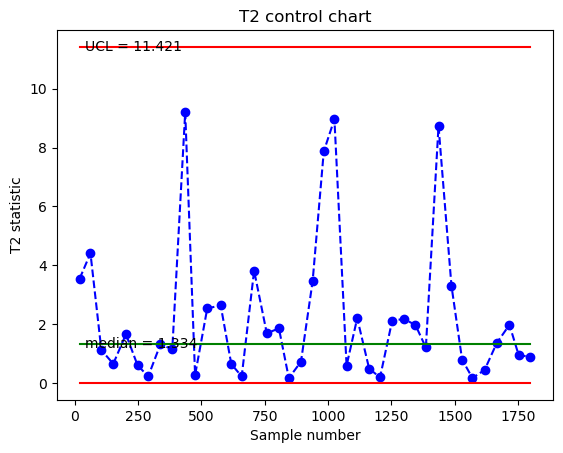

In [151]:
# Plot the T2 control chart
plt.title('T2 control chart')
plt.plot(data_CC_2['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_2['T2_UCL'], color='r')
plt.plot(data_CC_2['T2_CL'], color='g')
plt.plot(data_CC_2['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_2)+.5, data_CC_2['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC_2['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_2)+.5, data_CC_2['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC_2['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC_2['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

As previously mentioned, the **T² statistics** follow a **skewed distribution**. Therefore, the behavior shown in the graph does not indicate a critical issue. What is relevant for assessing the goodness of the defined statistical model is identifying values that exceed the UCL. Since there are no violations of the control limits, and given that the original data used to construct the control chart is considered to be in-control, it can be concluded that the developed method appears to be well-constructed.

<br><br>

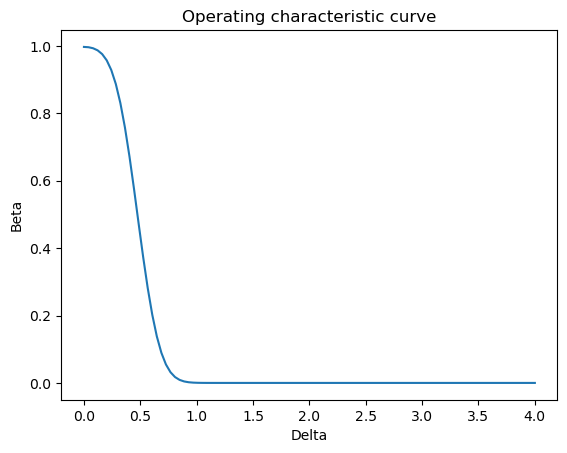

In [152]:
# Define a range of values for beta
delta = np.linspace(0, 4, 100)
# Compute the corresponding beta values
beta = stats.norm.cdf(3 - delta*np.sqrt(m)) - stats.norm.cdf(-3 - delta*np.sqrt(m))

# Plot the beta values
plt.plot(delta, beta)
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

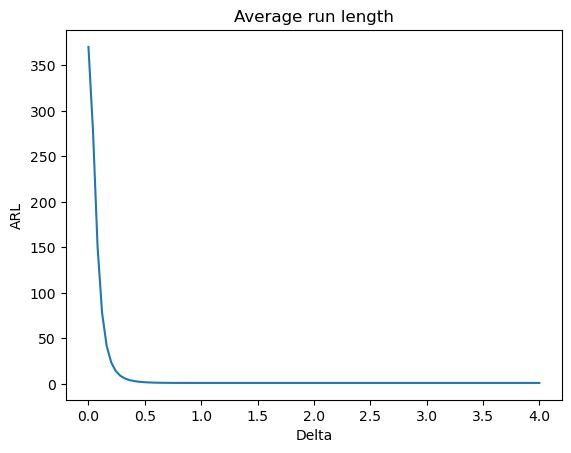

In [153]:
# Compute ARL using the previous values of beta
ARL = 1/(1-beta)

# Plot the ARL values
plt.plot(delta, ARL)
plt.xlabel('Delta')
plt.ylabel('ARL')
plt.title('Average run length')
plt.show()

<br>

<span style="color:red"> It was noticed that, for the calculation of OCC and ARL1, the normal distribution was mistakenly used instead of the distribution followed by T². To make up for such error, a more in-depth analysis was conducted to identify the correct calculation for this specific case.

<span style="color:red"> The parameters are not known and their estimation adds complexity to the computations. Examining studies among which "Champ, C. W., Jones-Farmer, L. A., & Rigdon, S. E. (2005). Properties of the T² Control Chart When Parameters Are Estimated. Technometrics, 47(4), 437-445", it is observed that ARL1 is calculated as the summation from k equals 1 to infinity of the product of k and the probability that RL is equal to k.

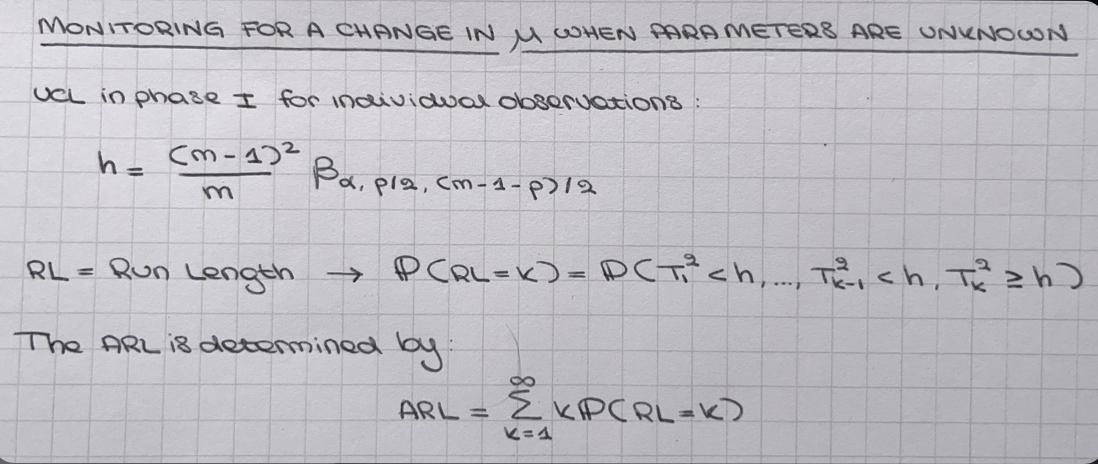

<br>

### Final considerations

As discussed, multivariate control charts offer numerous advantages in monitoring multiple variables simultaneously, especially when they are correlated. However, potential issues should be considered. Firstly, it is important to note that *temporal information is lost*. Additionally, joint control charts become difficult to interpret and present greater challenges in conducting *root cause analysis* when control limits are violated.

When deciding between the long period estimator (S1) and the short period estimator (S2) for individual observations, it is important to consider their **robustness to outliers**. One reason to consider preferring **S2** over S1 is its reduced sensitivity to outliers. S2 relies on a smaller and more recent set of observations, which makes it less affected by outliers or sudden shifts in the process. This can help ensure that the control charts more accurately reflect the current state of the process, potentially leading to more reliable detection of true out-of-control signals. In contrast, S1 uses a larger sample size and, while it generally provides stable variance-covariance estimates under normal conditions, it might be distorted by outliers. Therefore, S2 might be more suitable for individual observations to maintain a more reliable monitoring system and ensure prompt detection and correction of process issues.

Moreover, from the Operating Characteristic Curves, it can be inferred that the power of the obtained multivariate control charts is already significantly high when delta exceeds approximately 0.7 standard deviations (st_dev). Additionally, regarding the Average Run Length 0 (ARL0, used in reference with in control processes), the graph shows that it is very high for low delta values but reaches notably lower value when delta exceeds a threshold of approximately 0.3 st_dev.

<br><br>

# <span style="color:red"> Project analysis phases: **PHASE 2**

<br>

In [154]:
from sklearn.linear_model import LinearRegression

<br>

## <span style="color:orange"> Preliminary data analysis


This paragraph is divided into two subsections. First, the same method used in the 'Preliminary Data Analysis' section for Phase I is reapplied to align the available data and information before proceeding with Phase II. Additionally, a new analysis is presented to apply an alternative variant of the control chart, which may represent an improvement over the previously proposed solution. 

## Preparation of the data


The new DataFrame contains information for 40 production pieces, sorted by Image Name and comprising a total of 1813 rows. Each piece includes between 39 and 50 IDs, assigned based on the order in which the first pixel of each void is encountered from the top.

Observing the new dataset reveals that, for example, the largest void area is 2300, which is almost four times greater than the largest void area in the phase 1 dataset, which is 697. The same pattern is observed for the perimeter (337.706 vs. 121.74) and other variables. This initial analysis suggests that some parts in the new dataset might exhibit issues. This significant discrepancy in the measurements between the two datasets warrants further investigation to understand the underlying causes and potential impact on the quality of the pieces.

<br>

In [155]:
# Loading the CSV file into a DataFrame called 'pieces'
pieces_new = pd.read_csv('image_statistics_phase2.csv')
pieces_new.head()

Image name  Position Region type  \
0  2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...  top_left        part   
1  2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...  top_left        void   
2  2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...  top_left        void   
3  2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...  top_left        void   
4  2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
0   0        37885.0            4247.703         0.103                 -0.567   
1   1           69.0              35.142         0.848                 -1.274   
2   2           87.0              43.728         0.951                 -1.331   
3   3          196.0              76.355         0.965                 -1.289   
4   4          190.0              63.213         0.895                 -1.477   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
0     0.747   0.722                     279.213                     277.742   
1     0.841   0.548                      13.898                       7.361   
2     0.888   0.544                      19.849                       6.164   
3     0.879   0.412                      32.600                       8.579   
4     0.892   0.562                      24.793                      11.037   

   Equivalent Diameter [pixels]  
0                       219.629  
1                         9.373  
2                        10.525  
3                        15.797  
4                        15.554

In [156]:
# Add the new observations to the dataset
pieces2 = pd.concat([pieces, pd.DataFrame(pieces_new)], ignore_index=True)

pieces2.tail(10)

Image name      Position  \
3633  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3634  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3635  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3636  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3637  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3638  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3639  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3640  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3641  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
3642  2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   

     Region type  ID  Area [pixels]  Perimeter [pixels]  Eccentricity  \
3633        void  36          480.0              94.912         0.787   
3634        void  37            1.0               0.000         0.000   
3635        void  38           17.0              15.657         0.987   
3636        void  39          176.0              57.698         0.884   
3637        void  40           58.0              34.385         0.945   
3638        void  41           85.0              43.935         0.964   
3639        void  42          187.0              59.698         0.877   
3640        void  43          131.0              52.663         0.940   
3641        void  44            6.0               5.621         0.982   
3642        void  45           65.0              34.971         0.935   

      Orientation [radians]  Solidity  Extent  Major Axis Length [pixels]  \
3633                  1.009     0.950   0.543                      33.453   
3634                 -0.785     1.000   1.000                       0.000   
3635                  0.568     0.773   0.243                      11.569   
3636                  1.394     0.926   0.587                      23.145   
3637                 -1.153     0.841   0.403                      15.944   
3638                  1.422     0.850   0.528                      21.222   
3639                  1.448     0.949   0.599                      23.857   
3640                  1.284     0.897   0.476                      23.183   
3641                  1.044     0.750   0.400                       6.180   
3642                 -1.186     0.890   0.542                      15.772   

      Minor Axis Length [pixels]  Equivalent Diameter [pixels]  
3633                      20.628                        24.722  
3634                       0.000                         1.128  
3635                       1.859                         4.652  
3636                      10.807                        14.970  
3637                       5.218                         8.593  
3638                       5.668                        10.403  
3639                      11.469                        15.430  
3640                       7.923                        12.915  
3641                       1.169                         2.764  
3642                       5.580                         9.097

<br>

At the beginning of this second phase, efforts were made to recreate the DataFrames generated in Phase 1 to extract the same variables used for the control charts: for the parts, the residuals of the z1, z2, and z3 itself, and for the control chart on the biggest voids, the area and perimeter.

The dataset was again divided into two categories: parts and voids. From the voids dataset, information was extracted to create two new columns for the parts dataset: "Total area of voids" and "Number of voids". Additionally, information related to the largest voids was also extracted, maintaining consistency with the methodology used in Phase 1. This approach ensures that all relevant variables are captured and comparable, facilitating a thorough analysis and effective control charting.

<br>

In [157]:
# Creation of a DataFrame containing only parts
parts2 = pieces2[pieces2['Region type'] == 'part']
parts2.head()

Image name      Position  \
0    2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...      top_left   
44   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...   bottom_left   
88   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...     top_right   
135  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  bottom_right   
184  2024-03-26_14-12-22-903_MV540-H@xWyHvMbxwzDCYC...      top_left   

    Region type  ID  Area [pixels]  Perimeter [pixels]  Eccentricity  \
0          part   0        38468.0            4059.762         0.116   
44         part   0        39106.0            4086.620         0.135   
88         part   0        38293.0            4122.076         0.140   
135        part   0        38200.0            4119.247         0.140   
184        part   0        38411.0            4170.963         0.098   

     Orientation [radians]  Solidity  Extent  Major Axis Length [pixels]  \
0                   -0.943     0.765   0.697                     275.986   
44                  -1.028     0.768   0.727                     277.633   
88                   1.379     0.767   0.740                     275.509   
135                 -0.982     0.762   0.741                     277.225   
184                 -0.823     0.754   0.729                     279.109   

     Minor Axis Length [pixels]  Equivalent Diameter [pixels]  
0                       274.132                       221.312  
44                      275.098                       223.140  
88                      272.787                       220.808  
135                     274.494                       220.540  
184                     277.777                       221.148

In [158]:
# Creation of a DataFrame containing only voids
voids2 = pieces2[pieces2['Region type'] == 'void']
voids2.head()

Image name  Position Region type  \
1  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
2  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
3  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
4  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
5  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
1   1           80.0              42.142         0.950                 -1.303   
2   2           54.0              28.314         0.865                 -1.335   
3   3          183.0              61.799         0.902                 -1.413   
4   4          166.0              69.770         0.967                 -1.210   
5   5          150.0              53.456         0.890                  1.062   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
1     0.860   0.526                      18.844                       5.889   
2     0.900   0.643                      12.049                       6.051   
3     0.906   0.587                      24.715                      10.688   
4     0.869   0.357                      30.780                       7.810   
5     0.932   0.536                      21.481                       9.781   

   Equivalent Diameter [pixels]  
1                        10.093  
2                         8.292  
3                        15.264  
4                        14.538  
5                        13.820

In [159]:
# Creation of new metrics

def are_equal(pieces2, i):
  if i == 0:
    return False
  else:
    return (pieces2.loc[i, 'Image name'] == pieces2.loc[i - 1, 'Image name']) and \
           (pieces2.loc[i, 'Position'] == pieces2.loc[i - 1, 'Position'])

total_area_voids2 = []
voids_count2 = []
piece_number2 = [] # this vector will be useful in the subsequent creation of the dataframe 'biggest_voids'

sum_total_area_voids2 = voids2.loc[1, 'Area [pixels]']
voids_counter2 = 1
piece_number2.append(1)
k = 1

for i in range(2, pieces2.shape[0]):
  if are_equal(pieces2, i):
    sum_total_area_voids2 += pieces2.loc[i, 'Area [pixels]']
    voids_counter2 += 1
    piece_number2.append(k)
  else:
    total_area_voids2.append(sum_total_area_voids2)
    voids_count2.append(voids_counter2)
    sum_total_area_voids2 = 0
    voids_counter2 = 0
    k += 1

total_area_voids2.append(sum_total_area_voids2)
voids_count2.append(voids_counter2)

print(f"total_area_voids: {total_area_voids2}")
print(f"voids_count: {voids_count2}")
print(f"piece_number: {piece_number2}")

# check if the right number of values was computed; such number should be equal to the total number of pieces (40)
print(f"total_area_voids length: {len(total_area_voids2)}")
print(f"voids_count length: {len(voids_count2)}")
print(f"piece_number length: {len(piece_number2)}")

total_area_voids: [11386.0, 11364.0, 11230.0, 11666.0, 12191.0, 12348.0, 11926.0, 11807.0, 11896.0, 12969.0, 11702.0, 12157.0, 12513.0, 12534.0, 12069.0, 12355.0, 12252.0, 12175.0, 12048.0, 12038.0, 11230.0, 10948.0, 10394.0, 11015.0, 12013.0, 12536.0, 12071.0, 12196.0, 12251.0, 11938.0, 11617.0, 12692.0, 12788.0, 12492.0, 12132.0, 12087.0, 11852.0, 11972.0, 11547.0, 11568.0, 12450.0, 12431.0, 11569.0, 11905.0, 12646.0, 11932.0, 11947.0, 12154.0, 12487.0, 12615.0, 12188.0, 11853.0, 12233.0, 12994.0, 12715.0, 12767.0, 11511.0, 11986.0, 11643.0, 11420.0, 11401.0, 12100.0, 11447.0, 11720.0, 12192.0, 12317.0, 11888.0, 12934.0, 11382.0, 11773.0, 11542.0, 11860.0, 11430.0, 12706.0, 11743.0, 11656.0, 11540.0, 11901.0, 11492.0, 11469.0]
voids_count: [43, 43, 46, 48, 44, 43, 47, 47, 42, 45, 47, 45, 46, 42, 47, 47, 43, 45, 47, 45, 42, 42, 46, 42, 43, 45, 47, 46, 43, 41, 47, 48, 44, 41, 47, 45, 44, 42, 46, 46, 44, 42, 50, 47, 39, 41, 47, 46, 43, 45, 47, 43, 44, 43, 43, 48, 43, 44, 46, 45, 41, 42,

In [160]:
parts_mod2 = parts2

parts_mod2['Number of voids'] = voids_count2
parts_mod2['Total area of voids'] = total_area_voids2

parts_mod2.head()

c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Image name      Position  \
0    2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...      top_left   
44   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...   bottom_left   
88   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...     top_right   
135  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  bottom_right   
184  2024-03-26_14-12-22-903_MV540-H@xWyHvMbxwzDCYC...      top_left   

    Region type  ID  Area [pixels]  Perimeter [pixels]  Eccentricity  \
0          part   0        38468.0            4059.762         0.116   
44         part   0        39106.0            4086.620         0.135   
88         part   0        38293.0            4122.076         0.140   
135        part   0        38200.0            4119.247         0.140   
184        part   0        38411.0            4170.963         0.098   

     Orientation [radians]  Solidity  Extent  Major Axis Length [pixels]  \
0                   -0.943     0.765   0.697                     275.986   
44                  -1.028     0.768   0.727                     277.633   
88                   1.379     0.767   0.740                     275.509   
135                 -0.982     0.762   0.741                     277.225   
184                 -0.823     0.754   0.729                     279.109   

     Minor Axis Length [pixels]  Equivalent Diameter [pixels]  \
0                       274.132                       221.312   
44                      275.098                       223.140   
88                      272.787                       220.808   
135                     274.494                       220.540   
184                     277.777                       221.148   

     Number of voids  Total area of voids  
0                 43              11386.0  
44                43              11364.0  
88                46              11230.0  
135               48              11666.0  
184               44              12191.0

In [161]:
voids_copy2 = voids2
voids_copy2.head()

Image name  Position Region type  \
1  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
2  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
3  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
4  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
5  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
1   1           80.0              42.142         0.950                 -1.303   
2   2           54.0              28.314         0.865                 -1.335   
3   3          183.0              61.799         0.902                 -1.413   
4   4          166.0              69.770         0.967                 -1.210   
5   5          150.0              53.456         0.890                  1.062   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
1     0.860   0.526                      18.844                       5.889   
2     0.900   0.643                      12.049                       6.051   
3     0.906   0.587                      24.715                      10.688   
4     0.869   0.357                      30.780                       7.810   
5     0.932   0.536                      21.481                       9.781   

   Equivalent Diameter [pixels]  
1                        10.093  
2                         8.292  
3                        15.264  
4                        14.538  
5                        13.820

In [162]:
voids_copy2['Piece number'] = piece_number2
voids_copy2.head()

c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Image name  Position Region type  \
1  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
2  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
3  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
4  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   
5  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  top_left        void   

   ID  Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
1   1           80.0              42.142         0.950                 -1.303   
2   2           54.0              28.314         0.865                 -1.335   
3   3          183.0              61.799         0.902                 -1.413   
4   4          166.0              69.770         0.967                 -1.210   
5   5          150.0              53.456         0.890                  1.062   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
1     0.860   0.526                      18.844                       5.889   
2     0.900   0.643                      12.049                       6.051   
3     0.906   0.587                      24.715                      10.688   
4     0.869   0.357                      30.780                       7.810   
5     0.932   0.536                      21.481                       9.781   

   Equivalent Diameter [pixels]  Piece number  
1                        10.093             1  
2                         8.292             1  
3                        15.264             1  
4                        14.538             1  
5                        13.820             1

In [163]:
specific_rows2 = []

for i in range(1, len(parts2)+1):
    support_matrix2 = voids_copy2[voids_copy2['Piece number'] == i]
    max_area2 = support_matrix2["Area [pixels]"].max()
    void_row2 = support_matrix2["Area [pixels]"].idxmax()

    specific_rows2.append(void_row2)

    print(f"Piece number {i}: ")
    print(f"Max area: {max_area2}")
    print(f"The void is in the row: {void_row2}")
    print("\n")

print(f"The rows are: {specific_rows2}")

Piece number 1: 
Max area: 591.0
The void is in the row: 19


Piece number 2: 
Max area: 596.0
The void is in the row: 62


Piece number 3: 
Max area: 611.0
The void is in the row: 105


Piece number 4: 
Max area: 649.0
The void is in the row: 152


Piece number 5: 
Max area: 625.0
The void is in the row: 202


Piece number 6: 
Max area: 645.0
The void is in the row: 248


Piece number 7: 
Max area: 635.0
The void is in the row: 290


Piece number 8: 
Max area: 657.0
The void is in the row: 338


Piece number 9: 
Max area: 616.0
The void is in the row: 385


Piece number 10: 
Max area: 667.0
The void is in the row: 436


Piece number 11: 
Max area: 637.0
The void is in the row: 475


Piece number 12: 
Max area: 667.0
The void is in the row: 523


Piece number 13: 
Max area: 633.0
The void is in the row: 576


Piece number 14: 
Max area: 648.0
The void is in the row: 618


Piece number 15: 
Max area: 639.0
The void is in the row: 659


Piece number 16: 
Max area: 675.0
The void is in th

In [164]:
# Creation of the DataFrame 'biggest_voids'
biggest_voids2 = pieces2.iloc[specific_rows2]

biggest_voids2.head()

Image name      Position  \
19   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...      top_left   
62   2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...   bottom_left   
105  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...     top_right   
152  2024-03-26_14-19-54-164_MV540-H@xWyHvMbxwzDCYC...  bottom_right   
202  2024-03-26_14-12-22-903_MV540-H@xWyHvMbxwzDCYC...      top_left   

    Region type  ID  Area [pixels]  Perimeter [pixels]  Eccentricity  \
19         void  19          591.0             111.497         0.893   
62         void  18          596.0             102.912         0.743   
105        void  17          611.0             106.912         0.771   
152        void  17          649.0             109.154         0.746   
202        void  18          625.0             115.154         0.887   

     Orientation [radians]  Solidity  Extent  Major Axis Length [pixels]  \
19                  -1.110     0.943   0.534                      43.343   
62                  -1.357     0.951   0.597                      35.640   
105                 -1.333     0.946   0.580                      37.167   
152                 -1.358     0.943   0.579                      37.313   
202                 -1.174     0.937   0.519                      44.087   

     Minor Axis Length [pixels]  Equivalent Diameter [pixels]  
19                       19.529                        27.431  
62                       23.852                        27.547  
105                      23.648                        27.892  
152                      24.869                        28.746  
202                      20.371                        28.209

<br>

### **PCs** - *parts_mod*

In this section, the goal is to determine z3 and the residuals of z1 and z2 by applying the same models used in Phase 1. Specifically, an AR(1) model is employed for z1, while a linear regression model with an added dummy variable is used for z2 to account for the unusual behavior observed in pieces located in the top-right position. This ensures that the analysis remains robust and comparable across both phases, allowing for accurate identification of any anomalies or patterns in the dataset.

In [165]:
# elimination of non-numerical columns
parts_mod_num2 = parts_mod2.select_dtypes(include=[np.number])

# elimination of the column ID
parts_mod_num2.drop('ID', axis=1, inplace=True)

c:\Users\stesi\anaconda3\envs\qda\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Note: Standardization was performed using the mean and standard deviation of the original DataFrame combined with the new pieces.

In [166]:
# Standardization of parts_mod_num by subtracting the mean and dividing by the standard deviation
parts_mod_num_std2 = (parts_mod_num2 - parts_mod_num.mean()) / parts_mod_num.std()

parts_mod_num_std2.describe()

Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
count        80.0000             80.0000       80.0000                80.0000   
mean          0.2900              0.0425        0.1606                -0.1430   
std           1.1099              0.9404        1.0931                 0.8457   
min          -2.2933             -2.6515       -2.4615                -1.3335   
25%          -0.4751             -0.5526       -0.2419                -0.5913   
50%           0.1347              0.1120        0.1934                -0.2502   
75%           1.1431              0.8004        0.7358                -0.0851   
max           2.2093              2.0650        4.7324                 2.5423   

       Solidity   Extent  Major Axis Length [pixels]  \
count   80.0000  80.0000                     80.0000   
mean     0.0103   0.0590                      0.4356   
std      0.9982   1.0226                      1.0888   
min     -2.1473  -2.1820                     -2.3679   
25%     -0.7055  -0.6033                     -0.3175   
50%      0.1184   0.1797                      0.5857   
75%      0.7364   0.8471                      1.0892   
max      2.8991   1.7199                      3.8327   

       Minor Axis Length [pixels]  Equivalent Diameter [pixels]  \
count                     80.0000                       80.0000   
mean                       0.2534                        0.2891   
std                        1.0508                        1.1087   
min                       -3.5838                       -2.3077   
25%                       -0.0191                       -0.4730   
50%                        0.2506                        0.1379   
75%                        0.8941                        1.1421   
max                        3.5141                        2.1975   

       Number of voids  Total area of voids  
count          80.0000              80.0000  
mean           -0.0898               0.0465  
std             1.0669               0.9428  
min            -2.7423              -2.9285  
25%            -0.8263              -0.6480  
50%             0.1317               0.0195  
75%             1.0897               0.6010  
max             2.5267               1.9676

In [167]:
scores_parts2 = pca_parts.transform(parts_mod_num_std2)
scores_df_parts2 = pd.DataFrame(scores_parts2, columns = ['z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11'])

scores_df_parts2.head()

z1      z2      z3      z4      z5      z6      z7      z8      z9  \
0  2.3102 -0.3122 -1.4846  0.6968  0.9563 -0.5869  0.0715 -0.0818 -0.0776   
1  3.1131 -1.0232  0.3298 -0.6640 -0.1264  0.0205 -0.3583 -0.0840  0.0760   
2  2.6980  2.6681  0.2007  1.9759 -1.0288 -0.5347 -0.2534 -0.0540 -0.0350   
3  1.2749  0.9939  1.7427  0.9923  1.1696 -0.2299  0.2556 -0.0003 -0.0113   
4 -0.5686 -0.5808  0.7090 -1.2323 -0.3113 -0.4494  0.2973 -0.0554  0.0246   

      z10     z11  
0  0.0242 -0.0020  
1  0.0356  0.0034  
2 -0.0327 -0.0034  
3  0.0282 -0.0037  
4 -0.0177  0.0004

The scores were calculated by applying the same PCA, and it was confirmed that the values for the first 40 rows matched those from Phase 1.

<br>

- ### z1

In [168]:
# Overwrite of the model_parts_z1 taking out the constant
scores_df_parts2['z1_lag1'] = scores_df_parts2['z1'].shift(1)

x = scores_df_parts2['z1_lag1'][1:40]
y = scores_df_parts2['z1'][1:40]
model_parts_z1_2 = sm.OLS(y, x).fit()
qda.summary(model_parts_z1_2)

REGRESSION EQUATION
-------------------
z1 =  + 0.659 z1_lag1

COEFFICIENTS
------------
   Term   Coef  SE Coef  T-Value    P-Value
z1_lag1 0.6589   0.1214   5.4273 3.4726e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.8299 0.4367     0.4218

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS  Adj MS  F-Value    P-Value
Regression  1.0  98.6505 98.6505  29.4551 3.4726e-06
   z1_lag1  1.0  98.6505 98.6505  29.4551 3.4726e-06
     Error 38.0 127.2688  3.3492      NaN        NaN
     Total 39.0 225.9192     NaN      NaN        NaN


For z1, the same AR(1) model from Phase 1 was utilized to determine the coefficient that multiplies z1_lag1. This coefficient was then applied to z1_lag1 for all 80 rows. The residuals for z1 were found by subtracting the fitted values from the actual z1 values, ensuring consistency in the analysis.

In [169]:
coeff_model_parts_z1_2 = model_parts_z1_2.params
print("Coefficients of the model:", coeff_model_parts_z1_2['z1_lag1'])

Coefficients of the model: 0.6588642259633057


In [170]:
scores_df_parts2['z1_2'] = scores_df_parts2['z1_lag1'] * coeff_model_parts_z1_2['z1_lag1']

In [171]:
scores_df_parts2['residuals_z1_2'] = scores_df_parts2['z1'] - scores_df_parts2['z1_2']

<br>

- ### z2

In [172]:
# Creation of 2 variables: 'Position' and 'Image'
scores_df_parts2['Position'] = np.tile(np.arange(1, 5), int(len(scores_df_parts2)/4))
scores_df_parts2['Image'] = np.repeat(np.arange(1, len(scores_df_parts2)/4+1), 4)

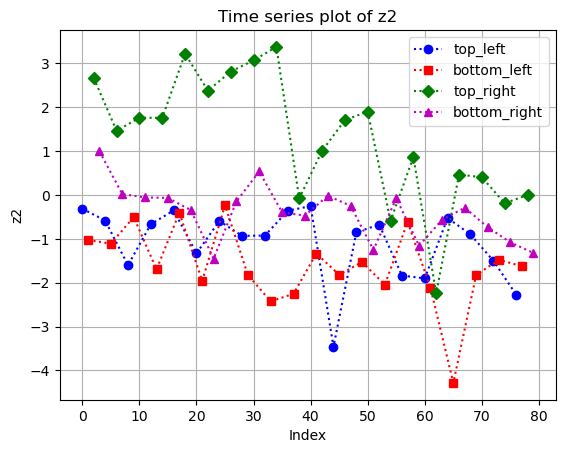

In [173]:
# Plotting the data as 4 separate batches
plt.plot(scores_df_parts2['z2'][scores_df_parts2['Position'] == 1], 'o:b', label = 'top_left') 
plt.plot(scores_df_parts2['z2'][scores_df_parts2['Position'] == 2], 's:r', label = 'bottom_left')
plt.plot(scores_df_parts2['z2'][scores_df_parts2['Position'] == 3], 'D:g', label = 'top_right')
plt.plot(scores_df_parts2['z2'][scores_df_parts2['Position'] == 4], '^:m', label = 'bottom_right')

plt.xlabel('Index')
plt.ylabel('z2')
plt.legend()
plt.title('Time series plot of z2')
plt.grid()
plt.show()

In [174]:
# Creation of a dummy variable
scores_df_parts2['Dummy'] = np.tile(np.array([0, 0, 1, 0]), int(len(scores_df_parts2)/4))

In [175]:
# Recomputation of the model that apllies to the second pc (z2) of the parts of the original dataframe
x = scores_df_parts['Dummy']
x = sm.add_constant(scores_df_parts['Dummy']) 
y = scores_df_parts['z2']
model_parts_z2_2 = sm.OLS(y, x).fit()

qda.summary(model_parts_z2_2)

REGRESSION EQUATION
-------------------
z2 =  -0.748 const + 2.992 Dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const -0.7479   0.1575  -4.7481 2.9068e-05
Dummy  2.9916   0.3150   9.4962 1.4077e-11

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.8628 0.7035     0.6957

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  1.0 67.1233 67.1233  90.1780 1.4077e-11
     const  1.0 16.7808 16.7808  22.5445 2.9068e-05
     Dummy  1.0 67.1233 67.1233  90.1780 1.4077e-11
     Error 38.0 28.2850  0.7443      NaN        NaN
     Total 39.0 95.4083     NaN      NaN        NaN


For z2, the same linear regression model from Phase 1, which includes a constant and a dummy variable, was used. The coefficients obtained from this model were applied to the constant and the dummy variable across all 80 rows. Residuals for z2 were computed by subtracting the fitted values from the actual z2 values, maintaining the robustness of the model application.

In [176]:
coeff_model_parts_z2_2 = model_parts_z2_2.params
print("Constant of the model: ", coeff_model_parts_z2_2['const'])
print("Coefficient of the dummy variable: ", coeff_model_parts_z2_2['Dummy'])

Constant of the model:  -0.7479044135679691
Coefficient of the dummy variable:  2.9916176542718773


In [177]:
scores_df_parts2['z2_2'] = coeff_model_parts_z2_2['const'] + coeff_model_parts_z2_2['Dummy'] * scores_df_parts2['Dummy']

In [178]:
scores_df_parts2['residuals_z2_2'] = scores_df_parts2['z2'] - scores_df_parts2['z2_2']

<br>

- ### z3, Area and Perimeter of Biggest Voids

For z3, Area and perimeter of the biggest voids, no additional model was applied because they were already determined to be independent and normally distributed. Therefore, they are directly used in the multivariate control charts.

## **Alternative**: Single Multivariate Control Chart - Data preparation

In [179]:
alpha = 0.0027                   # significance level
n = 1                            # sample size
m = len(model_parts_z1.resid)    # number of samples
p = 5

In [180]:
selected_variables_all = pd.DataFrame()
selected_variables_all['residuals_z1'] = residuals_z1
selected_variables_all['residuals_z2'] = residuals_z2
selected_variables_all['z3'] = scores_df_parts['z3']
selected_variables_all['Area_bv'] = biggest_voids['Area [pixels]'].reset_index(drop=True)
selected_variables_all['Perimeter_bv'] = biggest_voids['Perimeter [pixels]'].reset_index(drop=True)

# Create the V matrix
V = selected_variables_all.diff().dropna()

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1)

# Display the short range estimator
print("The short range estimator is: \n", S2)

The short range estimator is: 
               residuals_z1  residuals_z2       z3   Area_bv  Perimeter_bv
residuals_z1        2.8619       -0.4735  -0.2681  -17.5434       -4.2883
residuals_z2       -0.4735        0.6710   0.3302    6.5047        1.0178
z3                 -0.2681        0.3302   1.0630   15.9937        0.4691
Area_bv           -17.5434        6.5047  15.9937  516.8947        8.6396
Perimeter_bv       -4.2883        1.0178   0.4691    8.6396       19.5662


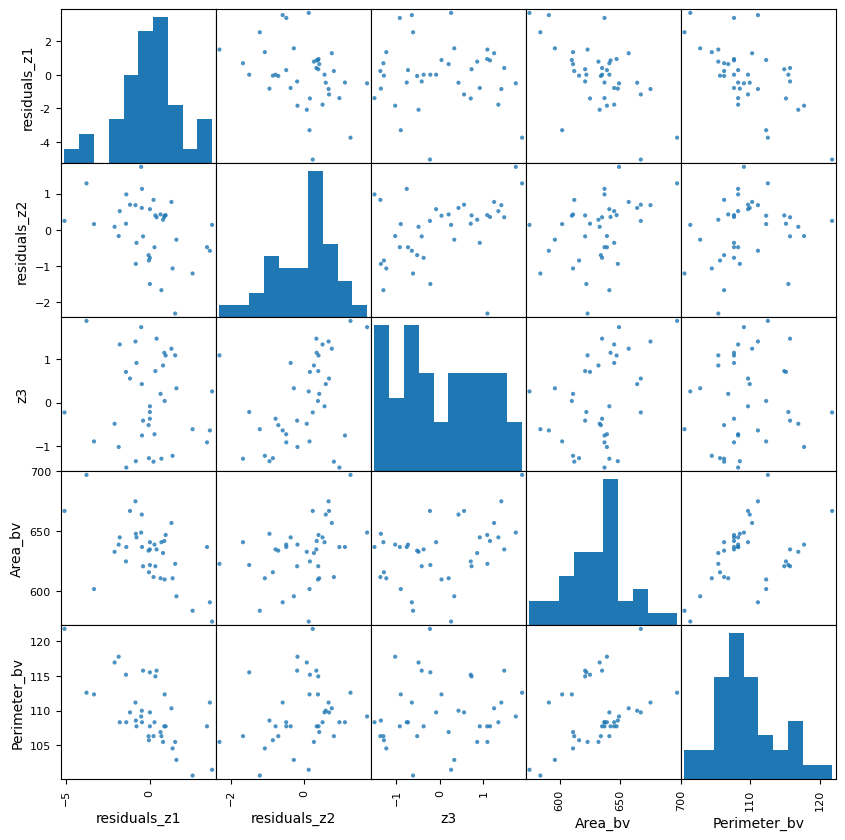

In [181]:
pd.plotting.scatter_matrix(selected_variables_all, alpha = 0.8, figsize=(10, 10))
plt.show()

In [182]:
print(selected_variables_all.corr())

              residuals_z1  residuals_z2      z3  Area_bv  Perimeter_bv
residuals_z1        1.0000       -0.3492 -0.0707  -0.5870       -0.6220
residuals_z2       -0.3492        1.0000  0.4070   0.3871        0.2370
z3                 -0.0707        0.4070  1.0000   0.3978        0.1009
Area_bv            -0.5870        0.3871  0.3978   1.0000        0.3803
Perimeter_bv       -0.6220        0.2370  0.1009   0.3803        1.0000


In [183]:
# Calculate the Xbar from the data
Xbar = selected_variables_all.mean()

S2_inv = np.linalg.inv(S2)

# Calculate the Hotelling T2 statistic
data_CC_all = selected_variables_all.copy()
data_CC_all['T2'] = np.nan
for i in range(m):
    data_CC_all['T2'].iloc[i] = n * (selected_variables_all.iloc[i] - Xbar).transpose().dot(S2_inv).dot(selected_variables_all.iloc[i] - Xbar)

# Now we can add the UCL, CL and LCL to the dataframe
data_CC_all['T2_UCL'] = ((m-1)**2)/m*stats.beta.ppf(1 - alpha, p/2, (m-p-1)/2)
data_CC_all['T2_CL'] = data_CC_all['T2'].median()
data_CC_all['T2_LCL'] = 0

# Add one column to test if the sample is out of control
data_CC_all['T2_TEST'] = np.where((data_CC_all['T2'] > data_CC_all['T2_UCL']), data_CC_all['T2'], np.nan)

# Inspect the dataset
data_CC_all.head()

residuals_z1  residuals_z2      z3  Area_bv  Perimeter_bv       T2  \
1        1.5910       -0.2753  0.3298    596.0       102.912  10.6195   
2        0.6469        0.4244  0.2007    611.0       106.912   3.7946   
3       -0.5027        1.7418  1.7427    649.0       109.154   6.5941   
4       -1.4086        0.1671  0.7090    625.0       115.154   3.8447   
5       -0.7836       -0.3627  0.9159    645.0       107.740   2.6258   

    T2_UCL   T2_CL  T2_LCL  T2_TEST  
1  15.2122  5.2035       0      NaN  
2  15.2122  5.2035       0      NaN  
3  15.2122  5.2035       0      NaN  
4  15.2122  5.2035       0      NaN  
5  15.2122  5.2035       0      NaN

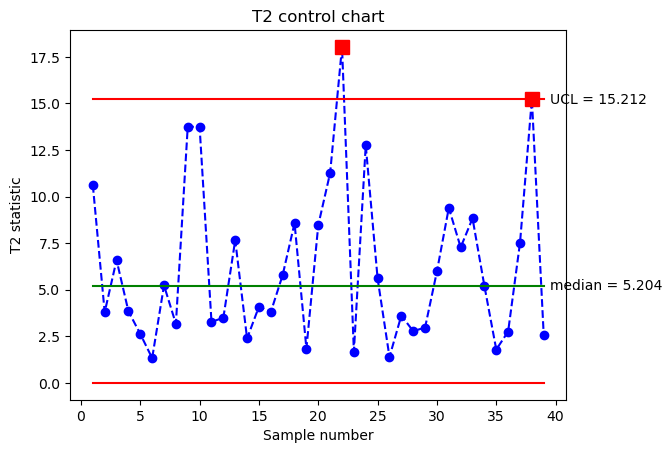

In [184]:
# Plot the T2 control chart
plt.title('T2 control chart')
plt.plot(data_CC_all['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_all['T2_UCL'], color='r')
plt.plot(data_CC_all['T2_CL'], color='g')
plt.plot(data_CC_all['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_all)+.5, data_CC_all['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC_all['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_all)+.5, data_CC_all['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC_all['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC_all['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

In [185]:
# Find the index of the T2_TEST column different from NaN
OOC_idx = np.where(data_CC_all['T2_TEST'].notnull())[0]
OOC_obs = OOC_idx + 1
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))
print('The OOC point is the observation number: {}'.format(OOC_obs))

The index of the OOC point is: [21 37]
The OOC point is the observation number: [22 38]


An evaluation of the observations that triggered an alarm concluded that the cause cannot be attributed to the imaging process. Consequently, the calibration phase can be considered complete, and the testing phase can proceed.

<br>

## <span style="color:orange"> Test of your proposed approach on new data

## Multivariate Control Charts

### **CC** - *parts*

- residuals of **z1** model
- residuals of **z2** model
- **z3**

<br>

In [186]:
b = 2 # Bonferroni

In [187]:
alpha = 0.0027/b                 # significance level
n = 1                            # sample size
m = len(model_parts_z1.resid)    # number of samples
p = 3                            # number of variables

In [188]:
selected_variables_1_2 = pd.DataFrame()
selected_variables_1_2['residuals_z1'] = scores_df_parts2['residuals_z1_2'].dropna() # drop the first row since it contains a nan value (due to the AR model)
selected_variables_1_2['residuals_z2'] = scores_df_parts2['residuals_z2_2']
selected_variables_1_2['z3'] = scores_df_parts2['z3']

# Create the V matrix
V = selected_variables_1.diff().dropna()

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1)

# Display the short range estimator
print("The short range estimator is: \n", S2)

The short range estimator is: 
               residuals_z1  residuals_z2      z3
residuals_z1        2.8619       -0.4735 -0.2681
residuals_z2       -0.4735        0.6710  0.3302
z3                 -0.2681        0.3302  1.0630


In [189]:
# Calculate the Xbar from the original data
Xbar = selected_variables_1.mean()

S2_inv = np.linalg.inv(S2)

# Calculate the Hotelling T2 statistic
data_CC_1_2 = selected_variables_1_2.copy()

m2 = len(data_CC_1_2)

data_CC_1_2['T2'] = np.nan
for i in range(m2):
    data_CC_1_2['T2'].iloc[i] = n * (selected_variables_1_2.iloc[i] - Xbar).transpose().dot(S2_inv).dot(selected_variables_1_2.iloc[i] - Xbar)

# Now we can add the UCL, CL and LCL to the dataframe
data_CC_1_2['T2_UCL'] = (p*(m+1)*(m-1))/((m**2)-(m*p))*stats.f.ppf(1-alpha, p, m-p)
data_CC_1_2['T2_CL'] = data_CC_1['T2'].median()
data_CC_1_2['T2_LCL'] = 0

# Add one column to test if the sample is out of control
data_CC_1_2['T2_TEST'] = np.where((data_CC_1_2['T2'] > data_CC_1_2['T2_UCL']), data_CC_1_2['T2'], np.nan)

# Inspect the dataset
data_CC_1_2.head()

residuals_z1  residuals_z2      z3      T2   T2_UCL   T2_CL  T2_LCL  \
1        1.5910       -0.2753  0.3298  1.1296  20.8498  2.1791       0   
2        0.6469        0.4244  0.2007  0.6641  20.8498  2.1791       0   
3       -0.5027        1.7418  1.7427  5.6155  20.8498  2.1791       0   
4       -1.4086        0.1671  0.7090  1.0285  20.8498  2.1791       0   
5       -0.7836       -0.3627  0.9159  1.7793  20.8498  2.1791       0   

   T2_TEST  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN

<br>

Being in the testing phase, the F distribution was used for calculating the UCL of the multivariate control charts instead of the beta distribution.

<br>

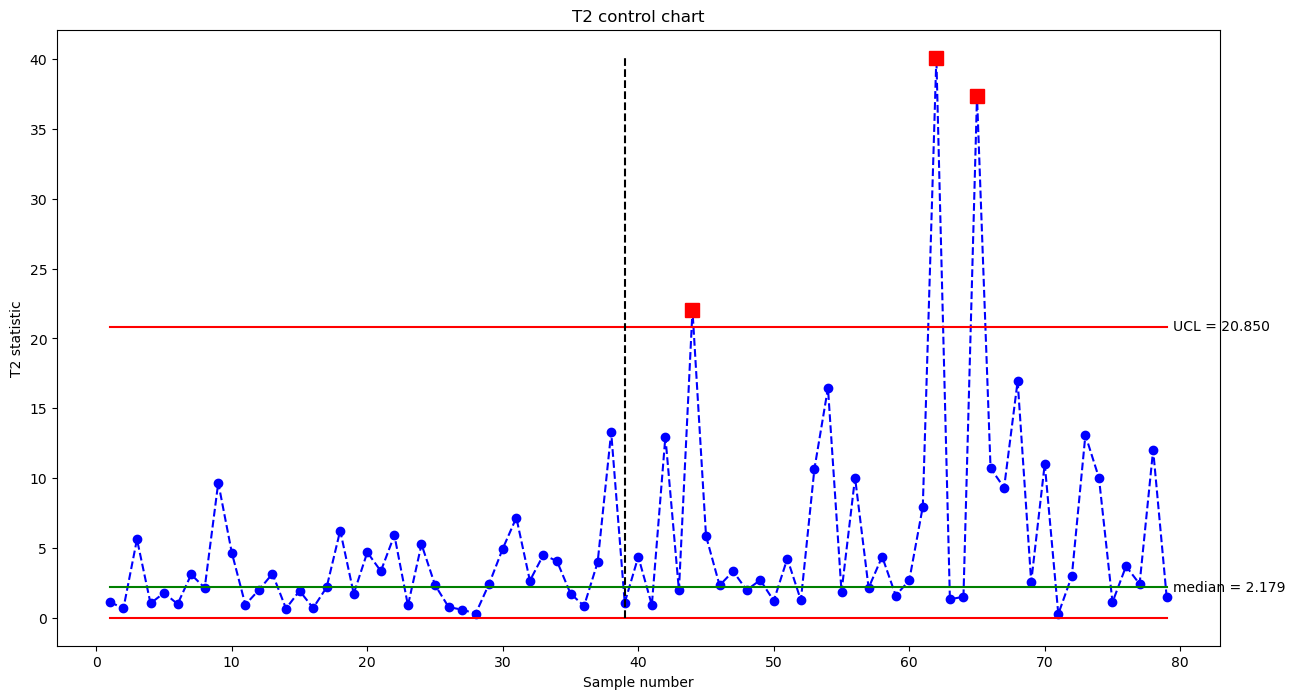

In [190]:
# Plot the T2 control chart
plt.rcParams['figure.figsize'] = [15, 8]

plt.title('T2 control chart')
plt.plot(data_CC_1_2['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_1_2['T2_UCL'], color='r')
plt.plot(data_CC_1_2['T2_CL'], color='g')
plt.plot(data_CC_1_2['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_1_2)+.5, data_CC_1_2['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC_1_2['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_1_2)+.5, data_CC_1_2['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC_1_2['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC_1_2['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)

plt.vlines(len(data_CC_1), 0, np.max(data_CC_1_2['T2']), color='black', linestyles='dashed')

plt.show()

In [191]:
# Find the index of the T2_TEST column different from NaN
OOC_idx = np.where(data_CC_1_2['T2_TEST'].notnull())[0]
OOC_obs = OOC_idx + 1
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))
print('The OOC point is the observation number: {}'.format(OOC_obs))

The index of the OOC point is: [43 61 64]
The OOC point is the observation number: [44 62 65]


<br>

The above Multivariate control chart, identifies a total of 3 out-of-control (OOC) points out of 79 examined observations. A thorough visual analysis is conducted below to understand the nature of these points, which can be categorized into:

- Correctly identified defective pieces;
- False alarms.

<br>

##### FIRST OOC Point: **44**

- 2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2o.bmp;
- top_left
- part
    - Detected defect: fusion of two adjacent voids.

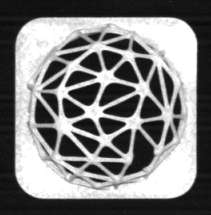

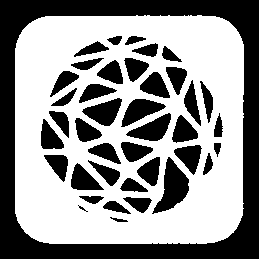

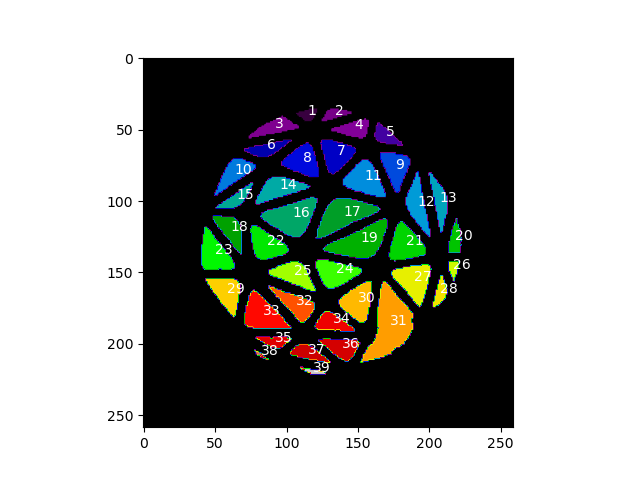

<br>

##### SECOND OOC Point: **62**

- 2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2g.bmp;
- top_right
- part
    - Detected defect: breakage of the external contour of the piece.

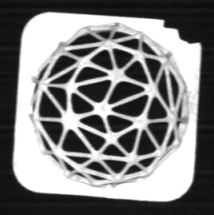

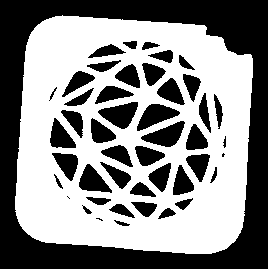

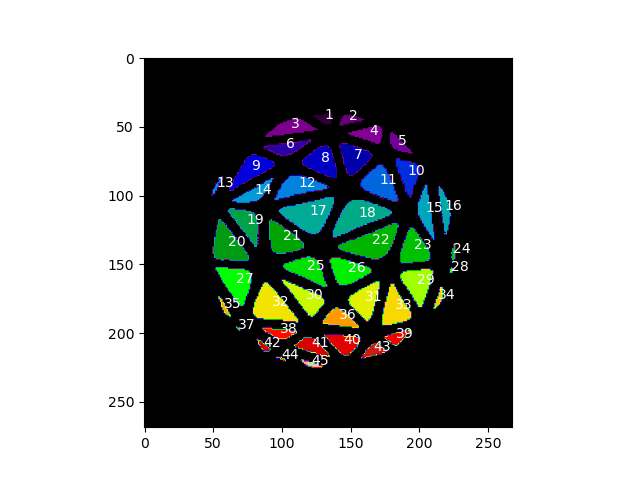

<br>

##### THIRD OOC Point: **65**

- 2024-05-22_17-15-03-265_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2m.bmp;
- bottom_left
- part
    - Detected defect: breakage of the external contour of the piece.

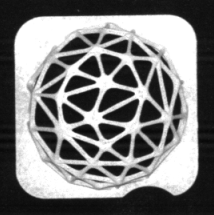

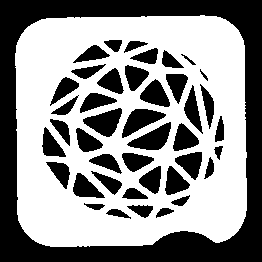

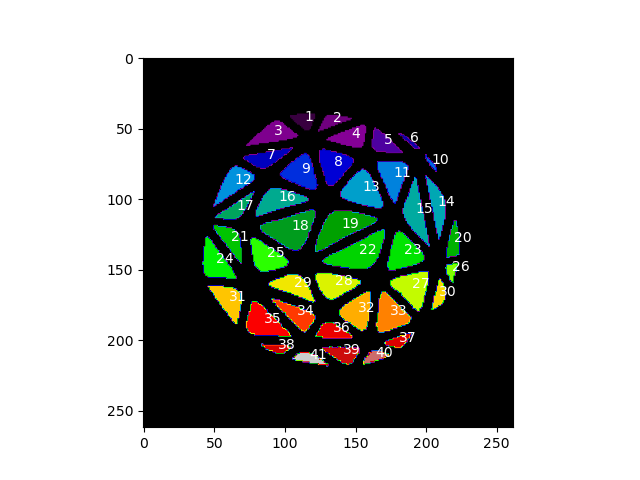

<br>

### **CC** - *biggest_voids*

- **Area**
- **Perimeter**

<br>

In [192]:
b = 2

In [193]:
alpha = 0.0027/b # significance level
n = 1          # sample size
m = len(biggest_voids)  # number of samples
p = 2          # number of variables

In [194]:
selected_variables_2_2 = biggest_voids2[["Area [pixels]" , "Perimeter [pixels]"]]
# Create the V matrix
V = selected_variables_2.diff().dropna()

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1)

# Display the short range estimator
print("The short range estimator is: \n", S2)

The short range estimator is: 
                     Area [pixels]  Perimeter [pixels]
Area [pixels]            503.9615              7.8677
Perimeter [pixels]         7.8677             20.0094


In [195]:
# Calculate the Xbar from the data
Xbar = selected_variables_2.mean()

S2_inv = np.linalg.inv(S2)

# Calculate the Hotelling T2 statistic
data_CC_2_2 = selected_variables_2_2.copy()

m2 = len(data_CC_2_2)

data_CC_2_2['T2'] = np.nan

for i in range(m2):
    data_CC_2_2['T2'].iloc[i] = n * (selected_variables_2_2.iloc[i] - Xbar).transpose().dot(S2_inv).dot(selected_variables_2_2.iloc[i] - Xbar)

# Now we can add the UCL, CL and LCL to the dataframe
data_CC_2_2['T2_UCL'] = (p*(m+1)*(m-1))/((m**2)-(m*p))*stats.f.ppf(1-alpha, p, m-p)
data_CC_2_2['T2_CL'] = data_CC_2['T2'].median()
data_CC_2_2['T2_LCL'] = 0

# Add one column to test if the sample is out of control
data_CC_2_2['T2_TEST'] = np.where((data_CC_2_2['T2'] > data_CC_2_2['T2_UCL']), data_CC_2_2['T2'], np.nan)

# Inspect the dataset
data_CC_2_2.head()

Area [pixels]  Perimeter [pixels]      T2   T2_UCL   T2_CL  T2_LCL  \
19           591.0             111.497  3.5376  16.6259  1.3336       0   
62           596.0             102.912  4.4078  16.6259  1.3336       0   
105          611.0             106.912  1.1178  16.6259  1.3336       0   
152          649.0             109.154  0.6486  16.6259  1.3336       0   
202          625.0             115.154  1.6552  16.6259  1.3336       0   

     T2_TEST  
19       NaN  
62       NaN  
105      NaN  
152      NaN  
202      NaN

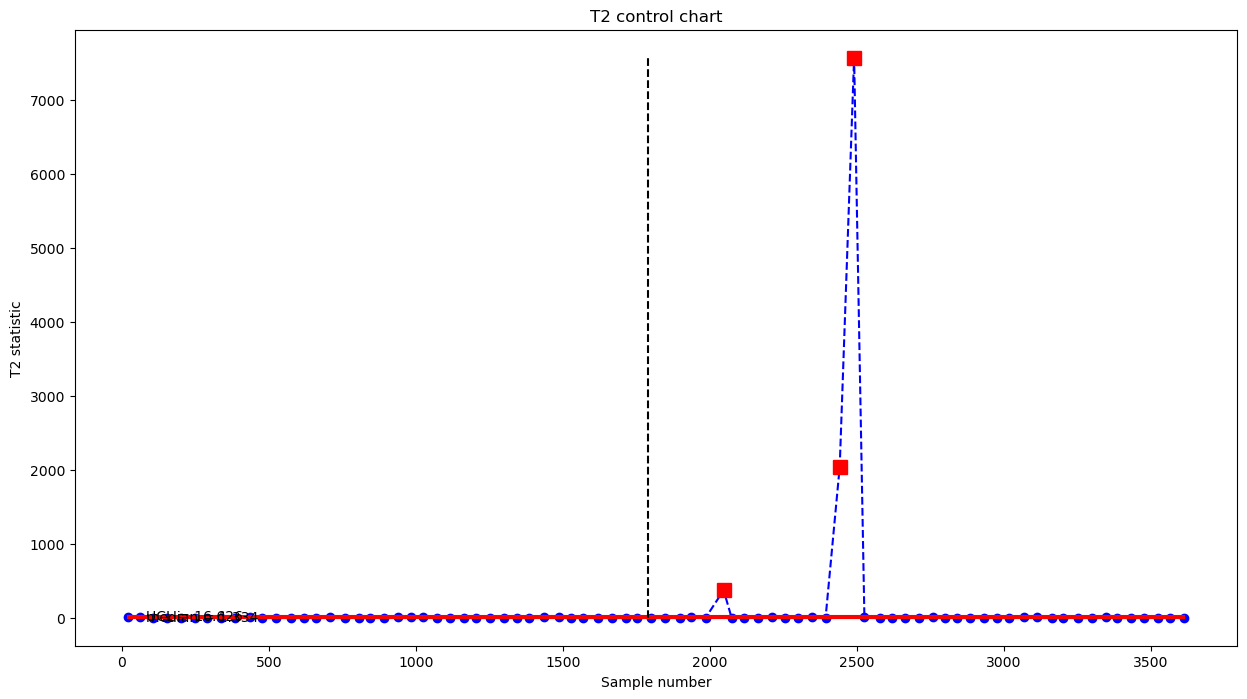

In [196]:
# Plot the T2 control chart
plt.rcParams['figure.figsize'] = [15, 8]

plt.title('T2 control chart')
plt.plot(data_CC_2_2['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_2_2['T2_UCL'], color='r')
plt.plot(data_CC_2_2['T2_CL'], color='g')
plt.plot(data_CC_2_2['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_2_2)+.5, data_CC_2_2['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC_2_2['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_2_2)+.5, data_CC_2_2['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC_2_2['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC_2_2['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)

plt.vlines(len(voids), 0, np.max(data_CC_2_2['T2']), color='black', linestyles='dashed')

plt.show()

<br>

Due to scale issues, the graph above does not provide a clear visualization of the process, particularly regarding the behavior of the data falling within the control limits. To address this problem, the control chart is replotted by the area between the two control limits.

<br>

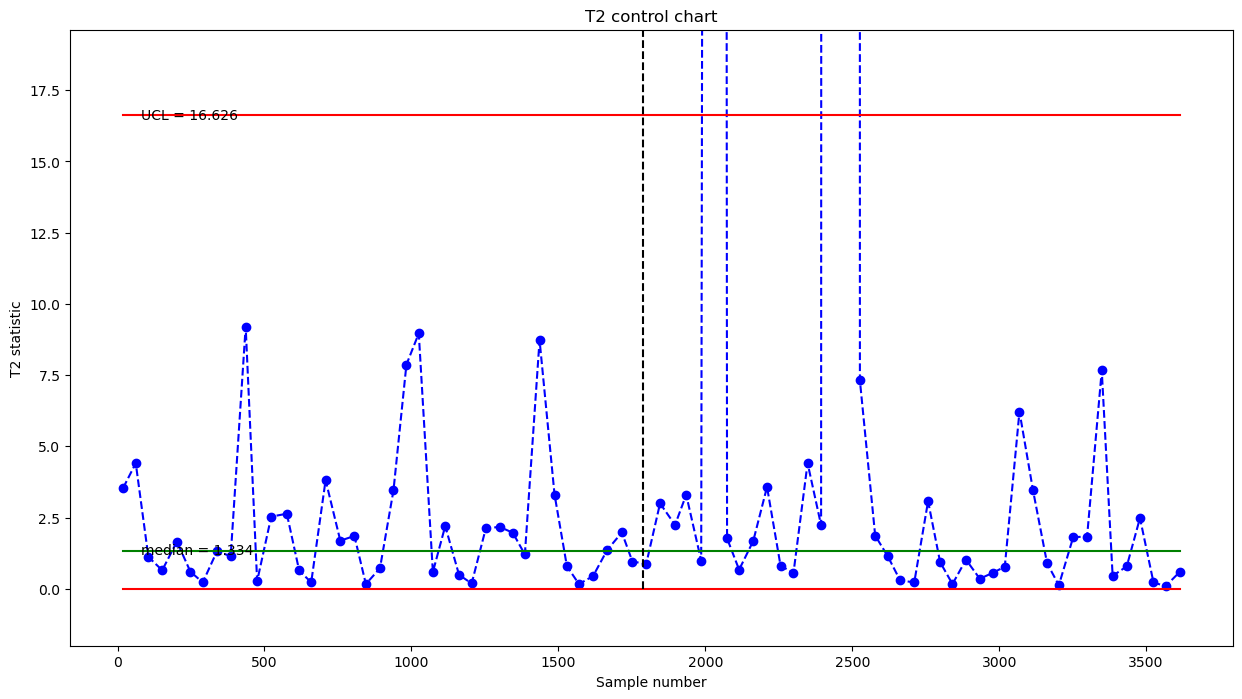

In [197]:
# y limits
y_limit = data_CC_2_2['T2_UCL'].iloc[0]+3
plt.ylim(-2, y_limit)

# Plot the T2 control chart
plt.rcParams['figure.figsize'] = [15, 8]

plt.title('T2 control chart')
plt.plot(data_CC_2_2['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_2_2['T2_UCL'], color='r')
plt.plot(data_CC_2_2['T2_CL'], color='g')
plt.plot(data_CC_2_2['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')

# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_2_2)+.5, data_CC_2_2['T2_UCL'].iloc[0], 
         'UCL = {:.3f}'.format(data_CC_2_2['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_2_2)+.5, data_CC_2_2['T2_CL'].iloc[0], 
         'median = {:.3f}'.format(data_CC_2_2['T2_CL'].iloc[0]), verticalalignment='center')

# highlight the points that violate the alarm rules
plt.plot(data_CC_2_2['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10) #b

plt.vlines(len(voids), 0, np.max(data_CC_2_2['T2']), color='black', linestyles='dashed')

plt.show()

In [198]:
# Find the index of the T2_TEST column different from NaN
OOC_idx = np.where(data_CC_2_2['T2_TEST'].notnull())[0]

# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [44 53 54]


<br>

One of the detected defects was already identified by the control chart on the parts (observation 44), supporting the validity of our code. Specifically, thanks to this, it is possible to detect two additional defects:

<br>

##### FOURTH OOC Point: **53**

- 2024-05-22_17-17-37-754_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2r.bmp;
- bottom_left
- void
    - Detected defect: fusion of two adjacent voids.

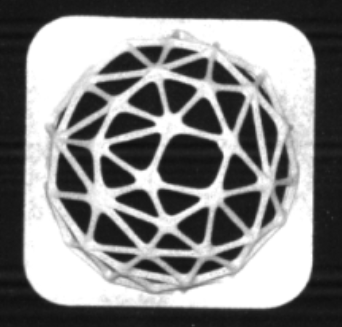

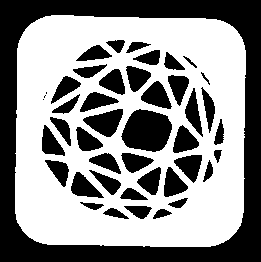

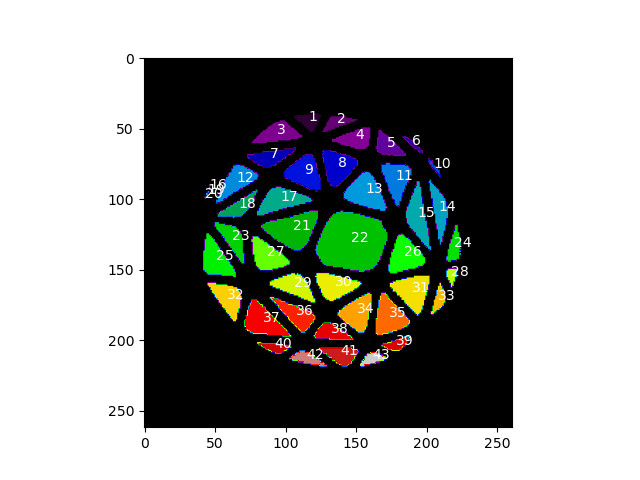

<br>

##### FIFTH OOC Point: **54**

- 2024-05-22_17-17-37-754_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2r.bmp;
- top_right
- void
    - Detected defect: fusion of multiple adjacent voids.

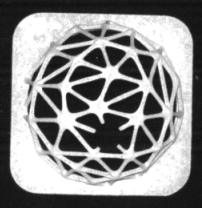

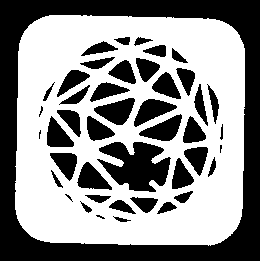

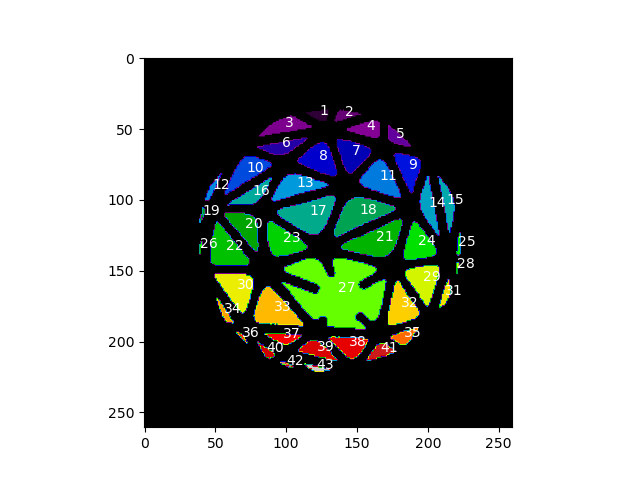

<br>

<br>

## **Alternative**: Single Multivariate Control Chart

In [199]:
alpha = 0.0027                   # significance level
n = 1                            # sample size
m = len(model_parts_z1.resid)    # number of samples
p = 5  

In [200]:
selected_variables_all_2 = pd.DataFrame()
selected_variables_all_2['residuals_z1'] = scores_df_parts2['residuals_z1_2'].dropna()
selected_variables_all_2['residuals_z2'] = scores_df_parts2['residuals_z2_2']
selected_variables_all_2['z3'] = scores_df_parts2['z3']
selected_variables_all_2['Area_bv'] = biggest_voids2["Area [pixels]"].reset_index(drop=True)
selected_variables_all_2['Perimeter_bv'] = biggest_voids2["Perimeter [pixels]"].reset_index(drop=True)

# Create the V matrix
V = selected_variables_all.diff().dropna()

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1)

# Display the short range estimator
print("The short range estimator is: \n", S2)

The short range estimator is: 
               residuals_z1  residuals_z2       z3   Area_bv  Perimeter_bv
residuals_z1        2.8619       -0.4735  -0.2681  -17.5434       -4.2883
residuals_z2       -0.4735        0.6710   0.3302    6.5047        1.0178
z3                 -0.2681        0.3302   1.0630   15.9937        0.4691
Area_bv           -17.5434        6.5047  15.9937  516.8947        8.6396
Perimeter_bv       -4.2883        1.0178   0.4691    8.6396       19.5662


In [201]:
# Calculate the Xbar from the original data
Xbar = selected_variables_all.mean()

S2_inv = np.linalg.inv(S2)

# Calculate the Hotelling T2 statistic
data_CC_all_2 = selected_variables_all_2.copy()

m2 = len(data_CC_all_2)

data_CC_all_2['T2'] = np.nan
for i in range(m2):
    data_CC_all_2['T2'].iloc[i] = n * (selected_variables_all_2.iloc[i] - Xbar).transpose().dot(S2_inv).dot(selected_variables_all_2.iloc[i] - Xbar)

# Now we can add the UCL, CL and LCL to the dataframe
data_CC_all_2['T2_UCL'] = (p*(m+1)*(m-1))/((m**2)-(m*p))*stats.f.ppf(1-alpha, p, m-p)
data_CC_all_2['T2_CL'] = data_CC_all['T2'].median()
data_CC_all_2['T2_LCL'] = 0

# Add one column to test if the sample is out of control
data_CC_all_2['T2_TEST'] = np.where((data_CC_all_2['T2'] > data_CC_all_2['T2_UCL']), data_CC_all_2['T2'], np.nan)

# Inspect the dataset
data_CC_all_2.head()

residuals_z1  residuals_z2      z3  Area_bv  Perimeter_bv       T2  \
1        1.5910       -0.2753  0.3298    596.0       102.912  10.6195   
2        0.6469        0.4244  0.2007    611.0       106.912   3.7946   
3       -0.5027        1.7418  1.7427    649.0       109.154   6.5941   
4       -1.4086        0.1671  0.7090    625.0       115.154   3.8447   
5       -0.7836       -0.3627  0.9159    645.0       107.740   2.6258   

    T2_UCL   T2_CL  T2_LCL  T2_TEST  
1  26.1963  5.2035       0      NaN  
2  26.1963  5.2035       0      NaN  
3  26.1963  5.2035       0      NaN  
4  26.1963  5.2035       0      NaN  
5  26.1963  5.2035       0      NaN

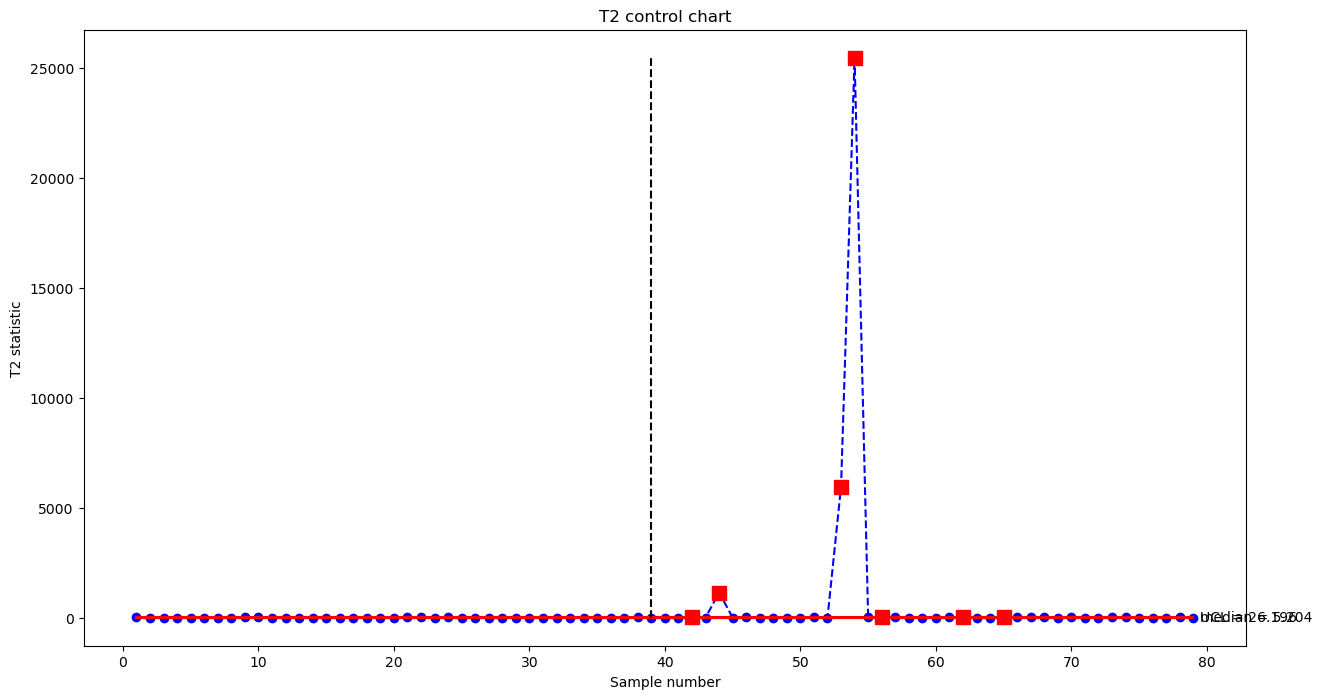

In [202]:
plt.title('T2 control chart')
plt.plot(data_CC_all_2['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_all_2['T2_UCL'], color='r')
plt.plot(data_CC_all_2['T2_CL'], color='g')
plt.plot(data_CC_all_2['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_all_2)+.5, data_CC_all_2['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC_all_2['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_all_2)+.5, data_CC_all_2['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC_all_2['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC_all_2['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)

plt.vlines(len(data_CC_all), 0, np.max(data_CC_all_2['T2']), color='black', linestyles='dashed')

plt.show()

<br>

The same visualization problem encountered earlier is present. It is resolved by proceeding in the same manner.

<br>

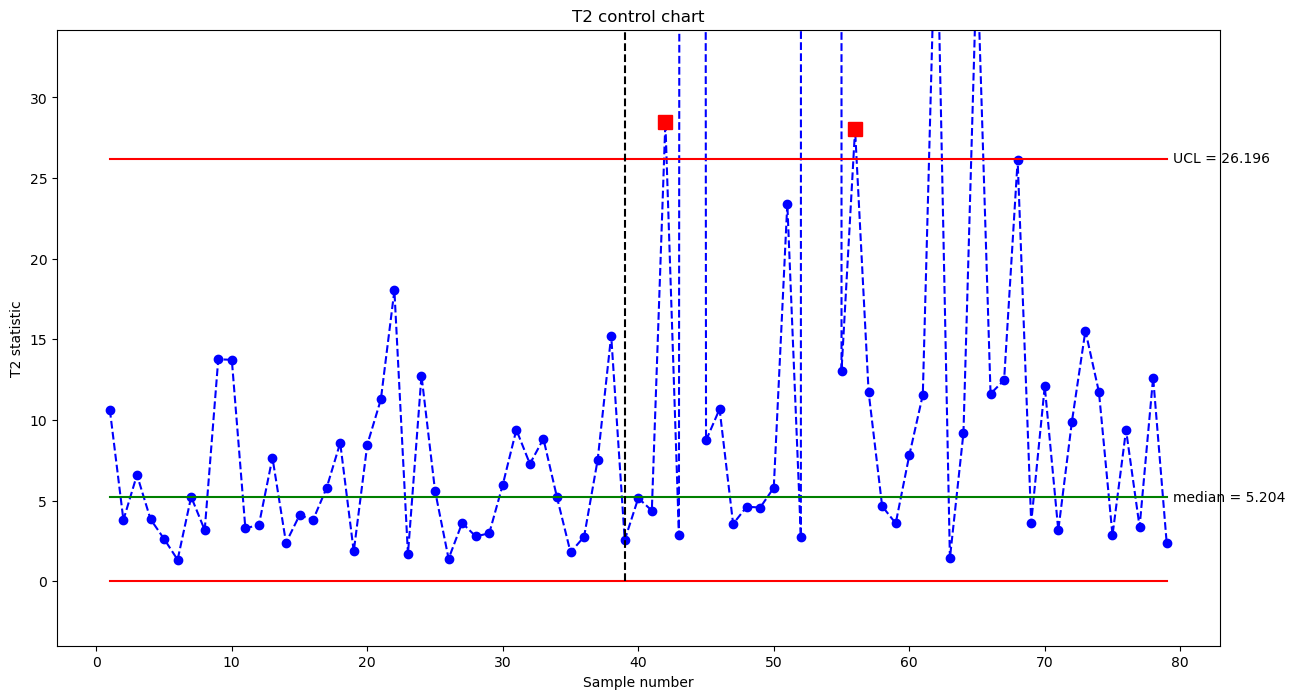

In [203]:
# y limits
y_limit = data_CC_all_2['T2_UCL'].iloc[0]+8
plt.ylim([-4, y_limit])

# Plot the T2 control chart
plt.rcParams['figure.figsize'] = [15, 8]

plt.title('T2 control chart')
plt.plot(data_CC_all_2['T2'], color='b', linestyle='--', marker='o')
plt.plot(data_CC_all_2['T2_UCL'], color='r')
plt.plot(data_CC_all_2['T2_CL'], color='g')
plt.plot(data_CC_all_2['T2_LCL'], color='r')
plt.ylabel('T2 statistic')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_CC_all_2)+.5, data_CC_all_2['T2_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_CC_all_2['T2_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_CC_all_2)+.5, data_CC_all_2['T2_CL'].iloc[0], 'median = {:.3f}'.format(data_CC_all_2['T2_CL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_CC_all_2['T2_TEST'], linestyle='none', marker='s', color='r', markersize=10)

plt.vlines(len(data_CC_all), 0, np.max(data_CC_all_2['T2']), color='black', linestyles='dashed')

plt.show()

In [204]:
# Find the index of the T2_TEST column different from NaN
OOC_idx = np.where(data_CC_all_2['T2_TEST'].notnull())[0]
OOC_obs = OOC_idx + 1
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))
print('The OOC point is the observation number: {}'.format(OOC_obs))

The index of the OOC point is: [41 43 52 53 55 61 64]
The OOC point is the observation number: [42 44 53 54 56 62 65]


<br>

As noted from the control chart above, using a single control chart yields different results compared to employing two. Specifically, simultaneously using all five analyzed variables leads to correctly identifying 6 of the 9 defects present in the proposed pieces, while also generating a false alarm. Therefore, in addition to the 5 defective pieces already detected with the previous approach (namely observations 44, 53, 54, 62, and 65), this method identifies one new defect and one false alarm. 

<br>

##### SIXTH OOC Point: **42**

- 2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUIvQPhvsAA24.bmp;
- top_right
- part
    - Detected defect: distorted and thickened link between two voids.

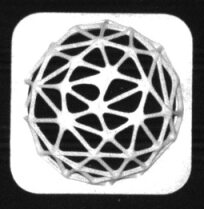

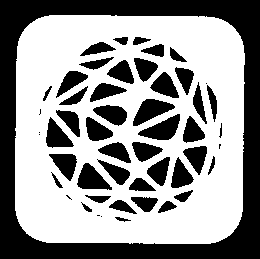

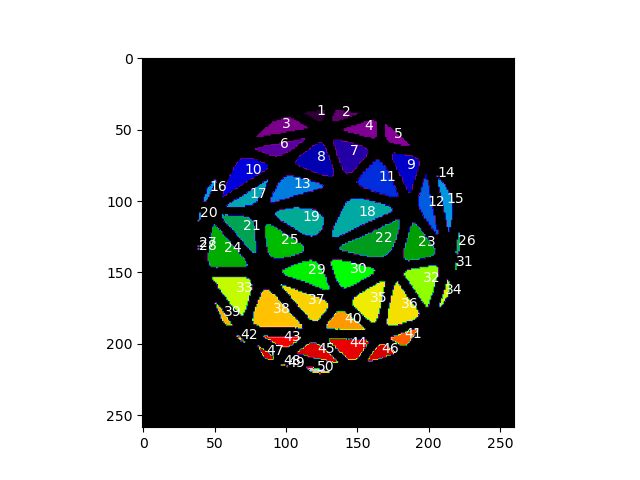

<br>

##### FALSE ALARM Point: **56**

- 2024-05-22_17-18-03-827_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2s.bmp;
- top_left

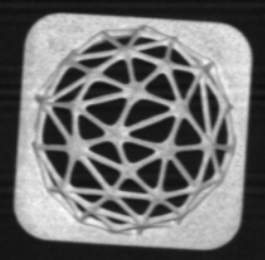

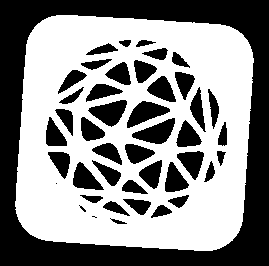

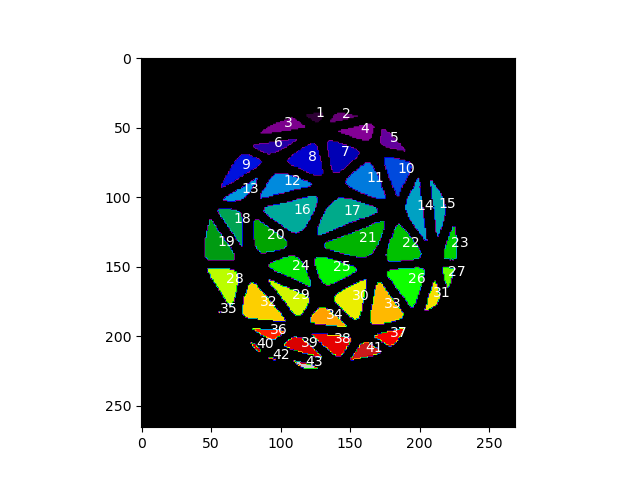

<br>

Furthermore, in the control chart above it is observed that there are two observations approaching the upper control limit. A detailed analysis was conducted to determine the corresponding pieces, revealing that one of them (observation 51) corresponds to a defective piece, with the defect being a thickened link between two voids.

<br>

<br>

## <span style="color:orange"> Discussion

#### *COMPARISON BETWEEN THE TWO ALTERNATIVES*

The report presents two different alternatives for control charts, each with specific advantages and disadvantages. Specifically, the following cases are considered: 

Case A – Two different multivariate control charts: one analyzing parts enriched with variables related to voids, and another considering specific attributes of only the largest voids 

Case B – A single multivariate control chart encompassing all variables used in case A 

 

From a purely theoretical perspective, case B appears to be more advantageous due to its ability to avoid the use of the Bonferroni correction, which negatively impacts the detection power of control charts. 

On the other hand, considering potential production errors, opting for case A offers easier and more immediate interpretation in the event of an alarm in the control chart related to the largest voids. In such a case, the alarm could be attributed to void fusion, that is the failure to deposit the necessary material required to outline the voids as per design specifications. 

 

The trade-off between detection power and interpretability, combined with the results obtained from the two alternatives, does not allow for an unequivocal determination of the superior or inferior quality of a specific version. In case A, a total of 5 alarms are generated, all corresponding to actual errors, whereas option B identifies 6 errors but also results in one false alarm. 

The first system, by not generating false alarms, is preferable in contexts where the costs associated with false alarms are high. The second system detects one more error than the first, which is advantageous if detecting all possible errors is crucial and if the cost of a false alarm is acceptable. 

In summary, reaching an absolute conclusion is not straightforward. The choice between the two models will depend on the specific priorities of the context in which they are applied.  

<br>

##### **NON-DETECTED** DEFECTIVE PIECES

- 2024-05-22_17-15-03-265_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2m.bmp;
- top_right

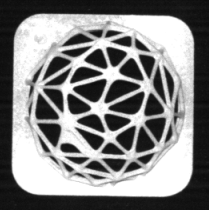

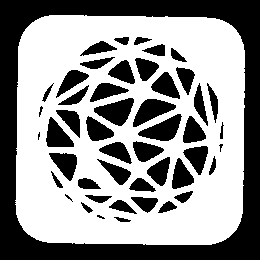

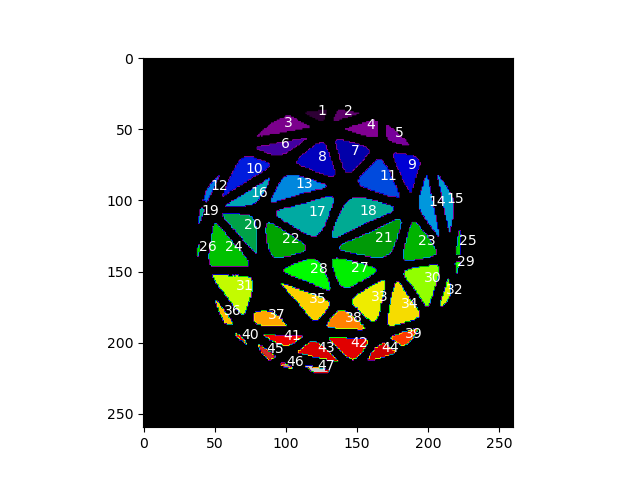

- 2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUIvQPhvsAA2i.bmp;
- top_left

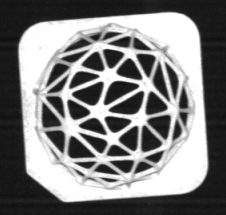

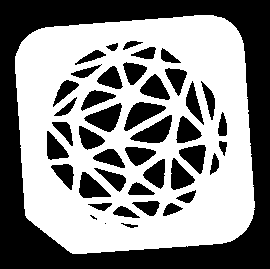

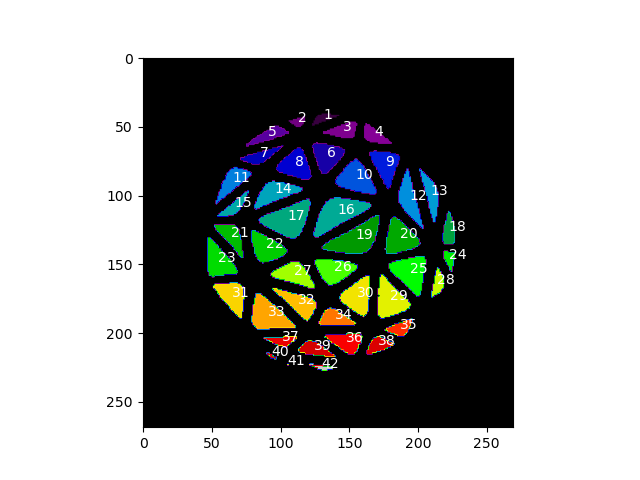

- 2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUIvQPhvsAA23.bmp;
- bottom_right

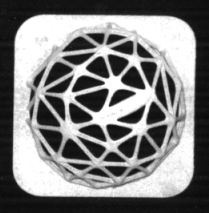

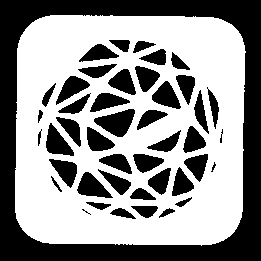

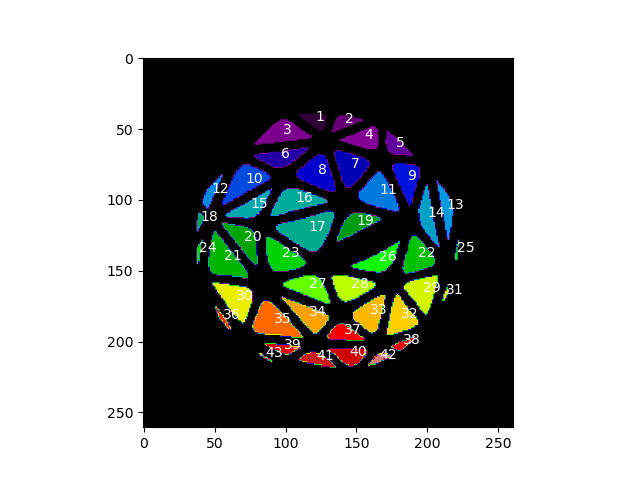

<br>

<br>

#### *POSSIBLE FURTHER IMPROVEMENTS*

The constructed monitoring tools identify 6 defects out of a total of 9 production errors, indicating partial inaccuracy. To achieve improvements, some changes can be considered. 

 

Alternative Dataframe 'parts' 

This solution involves adding two additional variables within the 'parts' dataframe, along with the already included ones that summarize the most relevant information about the voids. Specifically, it refers to the area and perimeter of the largest void in each piece. 

This choice is preferable in terms of parsimony, as it is important to find a relatively straightforward statistical tool without compromising the achievement of the intended objective. 

However, there is a potential downside. Considering the possible errors that the production process under analysis might encounter, and focusing particularly on the issue of void fusion located in the central part of the piece, certain characteristics of the largest voids become evidently significant. Since the original parts used for the design phase of the monitoring tool fall within the category of in-control products, applying PCA on this new dataframe might lead to the loss of valuable information. 

Thus, it is not unequivocally clear that this solution would represent an improvement. 

 

Keep the Area as a Separate Variable in Multivariate Analysis 

Following a qualitative study of the errors that the system failed to detect, the significance of the Area variable related to parts has been highlighted. Such failures typically concerns either the thickening of internal connections or the chipping at the periphery of the piece. These variations are not sufficiently significant to be captured by the proposed system. Therefore, it is suggested to isolate the area value to assign it greater weight. Principal Component Analysis should then be performed on the other variables in the dataframe, excluding both the Area and the Equivalent Diameter. This is crucial since these variables are almost perfectly correlated, with a correlation coefficient close to unity. 

Such an approach supports a specific interpretation of the case, which might not lead to improvements in applications beyond the analyzed context.